Calling  some important libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Calling dataset

In [2]:
file_path = "/content/SCBdataset.xlsx"
df = pd.read_excel(file_path)
df.head(10)

sample   Notch length (a) (mm)  Radius of SCB (R) (mm)  \
0        1                  15.18                   38.50   
1        2                  17.10                   41.75   
2        3                  15.25                   40.10   
3        4                  15.60                   40.30   
4        5                  15.10                   39.30   
5        6                  14.26                   38.60   
6        7                  15.05                   38.80   
7        8                  15.30                   38.60   
8        9                  14.00                   38.60   
9       10                  15.10                   38.90   

   Thickness of SCB (B) (mm)  Distance between two rollers(S)(mm)  \
0                      19.24                                   50   
1                      19.45                                   50   
2                      20.30                                   50   
3                      18.75                                   50   
4                      19.05                                   50   
5                      19.30                                   50   
6                      18.40                                   50   
7                      19.00                                   50   
8                      19.20                                   50   
9                      18.80                                   50   

    Dimensionless geometric factor (α)  Dimensionless crack length factor (β)  \
0                             0.649351                               0.394286   
1                             0.598802                               0.409581   
2                             0.623441                               0.380299   
3                             0.620347                               0.387097   
4                             0.636132                               0.384224   
5                             0.647668                               0.369430   
6                             0.644330                               0.387887   
7                             0.647668                               0.396373   
8                             0.647668                               0.362694   
9                             0.642674                               0.388175   

   Loading rate (mm/min)  maximum loading pressure of SCB (Pmax) (N)  \
0                   0.05                                    1467.093   
1                   0.05                                    2037.619   
2                   0.05                                    1901.687   
3                   0.05                                    1920.471   
4                   0.05                                    1530.754   
5                   0.05                                    1631.552   
6                   0.05                                    1329.069   
7                   0.05                                    1717.152   
8                   0.05                                    1856.152   
9                   0.05                                    1717.872   

   Dimensionless stress intensity factor (λ)  \
0                                   4.122666   
1                                   3.807840   
2                                   3.811790   
3                                   3.830635   
4                                   3.942216   
5                                   3.941915   
6                                   4.035174   
7                                   4.123886   
8                                   3.901720   
9                                   4.023413   

   fracture toughness factor (K_IC) (Mpa.m^0.5)  
0                                      0.891335  
1                                      1.107028  
2                                      0.974311  
3                                      1.077381  
4                                      0.877570  
5                                      0.913394  
6      

In [3]:
# Remove extra spaces from columns names
df.columns = df.columns.str.strip()
# delete the sample column
if "sample" in df.columns:
  df = df.drop(columns =["sample"])

In [4]:
df.describe()

Notch length (a) (mm)  Radius of SCB (R) (mm)  \
count             300.000000              300.000000   
mean               15.375767               39.314867   
std                 0.801506                0.932726   
min                14.000000               38.410000   
25%                15.050000               38.657500   
50%                15.180000               38.920000   
75%                15.632500               40.100000   
max                17.190000               41.770000   

       Thickness of SCB (B) (mm)  Distance between two rollers(S)(mm)  \
count                 300.000000                           300.000000   
mean                   19.183133                            45.406667   
std                     0.429299                             2.709075   
min                    18.400000                            40.000000   
25%                    18.890000                            44.000000   
50%                    19.210000                            46.000000   
75%                    19.350000                            47.000000   
max                    20.380000                            50.000000   

       Dimensionless geometric factor (α)  \
count                          300.000000   
mean                             0.577747   
std                              0.036338   
min                              0.479386   
25%                              0.547435   
50%                              0.581997   
75%                              0.606101   
max                              0.649351   

       Dimensionless crack length factor (β)  Loading rate (mm/min)  \
count                             300.000000             300.000000   
mean                                0.391033               0.529550   
std                                 0.016702               1.413842   
min                                 0.362413               0.005000   
25%                                 0.382995               0.050000   
50%                                 0.388960               0.050000   
75%                                 0.397668               0.050000   
max                                 0.430909               5.000000   

       maximum loading pressure of SCB (Pmax) (N)  \
count                                  300.000000   
mean                                  1895.722843   
std                                    226.739935   
min                                   1329.069000   
25%                                   1754.169500   
50%                                   1880.763000   
75%                                   2013.580250   
max                                   2824.754000   

       Dimensionless stress intensity factor (λ)  \
count                                 300.000000   
mean                                    3.507313   
std                                     0.315394   
min                                     2.547310   
25%                                     3.294283   
50%                                     3.515269   
75%                                     3.743766   
max                                     4.196595   

       fracture toughness factor (K_IC) (Mpa.m^0.5)  
count                                    300.000000  
mean                                       0.963893  
std                                        0.103598  
min                                        0.635767  
25%                                        0.939677  
50%                                        0.976198  
75%                                        1.007665  
max                                        1.254927

Pair plot

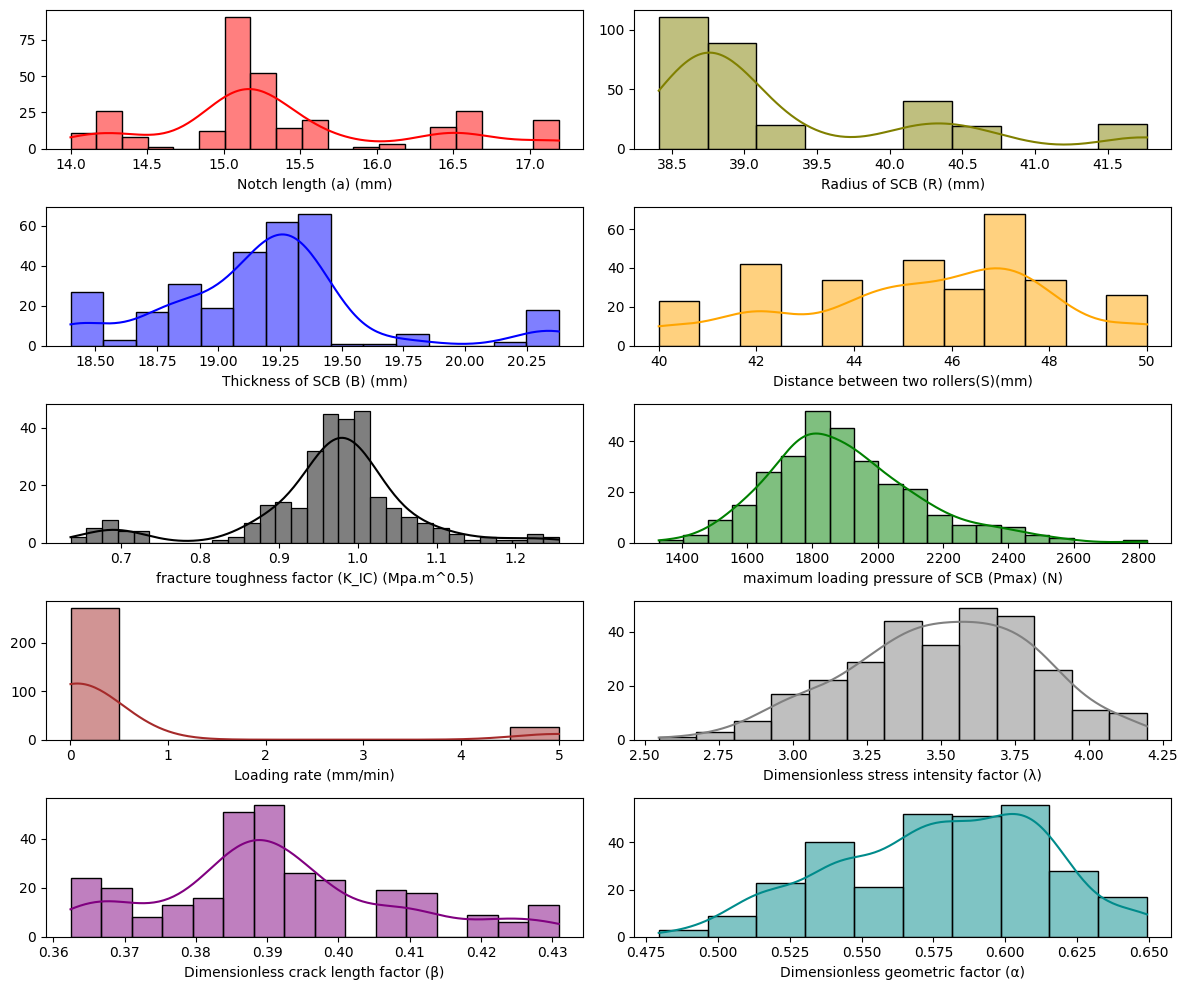

In [5]:
# Remove extra spaces from columns names
df.columns = df.columns.str.strip()


target_columns =["Notch length (a) (mm)",
                        "Radius of SCB (R) (mm)",
                        "Thickness of SCB (B) (mm)",
                        "Distance between two rollers(S)(mm)",
                        "fracture toughness factor (K_IC) (Mpa.m^0.5)",
                        "maximum loading pressure of SCB (Pmax) (N)",
                        "Loading rate (mm/min)",
                        "Dimensionless stress intensity factor (λ)",
                        "Dimensionless crack length factor (β)",
                        "Dimensionless geometric factor (α)"
 ]

# create subplots
fig, axes =plt.subplots(5,2, figsize=(12,10))
colors =["red", "olive", "blue","orange", "black", "green", "brown","gray","purple","darkcyan"]

# Drawing scatter plots
for ax, col, color in zip(axes.flatten(), target_columns, colors):
  sns.histplot(df[col], color=color, kde=True, ax=ax)
  ax.set_xlabel(col)
  ax.set_ylabel('')
plt.tight_layout()
plt.show()

Box plot


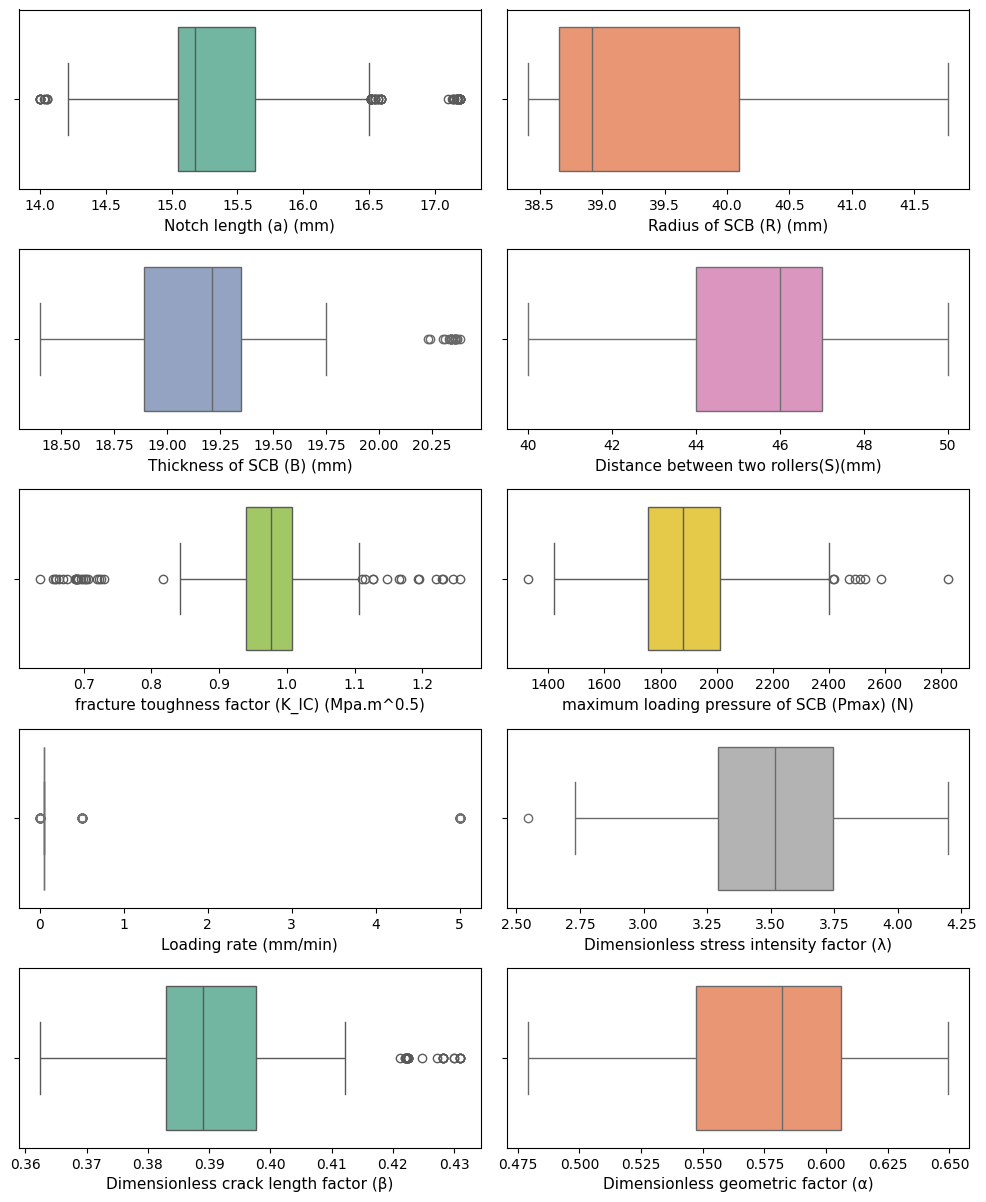

In [6]:
columns_with_outliers =["Notch length (a) (mm)",
                        "Radius of SCB (R) (mm)",
                        "Thickness of SCB (B) (mm)",
                        "Distance between two rollers(S)(mm)",
                        "fracture toughness factor (K_IC) (Mpa.m^0.5)",
                        "maximum loading pressure of SCB (Pmax) (N)",
                        "Loading rate (mm/min)",
                        "Dimensionless stress intensity factor (λ)",
                        "Dimensionless crack length factor (β)",
                        "Dimensionless geometric factor (α)"
 ]

n_cols=2
n_rows = -(-len(columns_with_outliers)// n_cols)

fig, axes= plt.subplots( n_rows, n_cols,  figsize=(10,2.5* n_rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(columns_with_outliers))


for i, col in enumerate( columns_with_outliers):
  sns.boxplot(x=df[col], ax=axes[i], color=colors[i])
  axes[i].set_title("")
  axes[i].set_xlabel(col, fontsize=11)

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])


plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

numbsr of outliers

In [7]:
import numpy as np

for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()

    if outliers_count > 0:
        print(f"\nOutliers count for column '{column}': {outliers_count}")
    else:
        print(f"\nNo outliers found for column '{column}'0")


Outliers count for column 'Notch length (a) (mm)': 57

No outliers found for column 'Radius of SCB (R) (mm)'0

Outliers count for column 'Thickness of SCB (B) (mm)': 20

No outliers found for column 'Distance between two rollers(S)(mm)'0

No outliers found for column 'Dimensionless geometric factor (α)'0

Outliers count for column 'Dimensionless crack length factor (β)': 28

Outliers count for column 'Loading rate (mm/min)': 75

Outliers count for column 'maximum loading pressure of SCB (Pmax) (N)': 9

Outliers count for column 'Dimensionless stress intensity factor (λ)': 1

Outliers count for column 'fracture toughness factor (K_IC) (Mpa.m^0.5)': 38


Caping laboratory features

 Notch length (a) (mm): 57 Corrected outlier data (lower_bound =14.176, upper_bound =16.506)


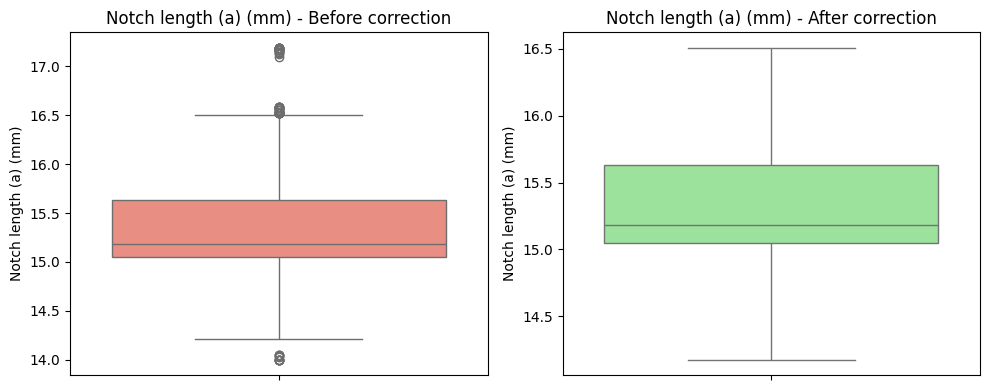

 Radius of SCB (R) (mm): No outlier data 


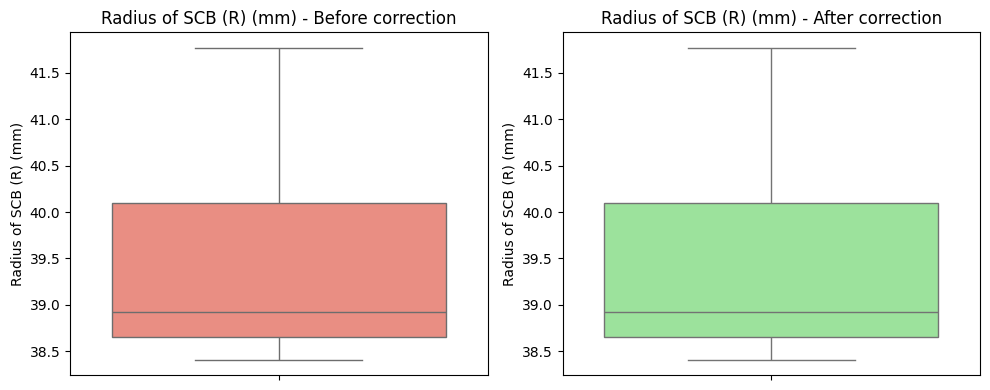

 Thickness of SCB (B) (mm): 20 Corrected outlier data (lower_bound =18.200, upper_bound =20.040)


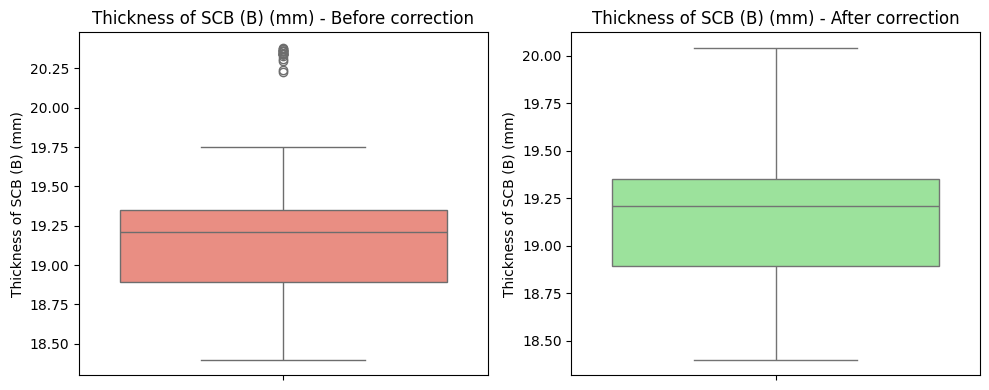

 Distance between two rollers(S)(mm): No outlier data 


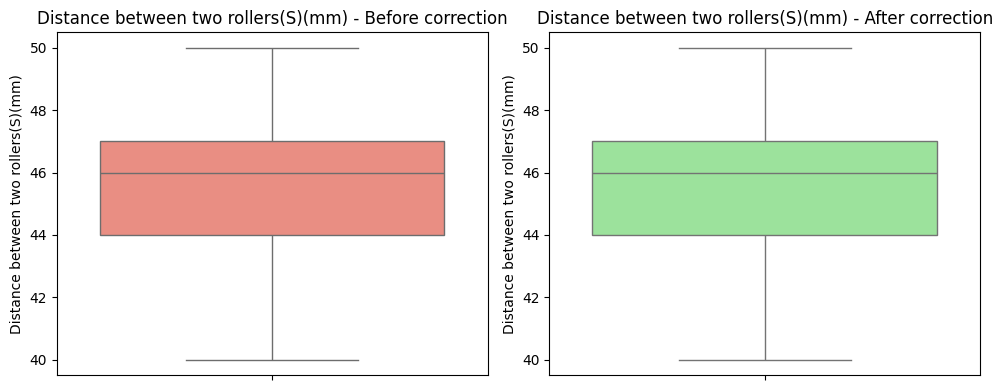

 Dimensionless geometric factor (α): No outlier data 


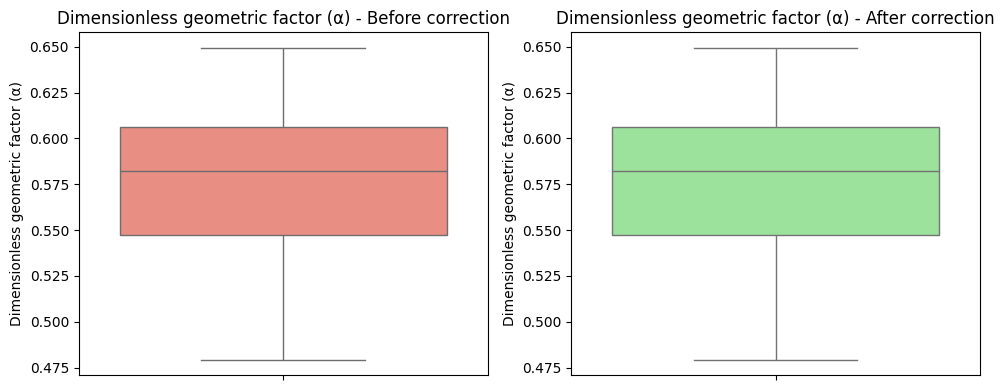

 Dimensionless crack length factor (β): 28 Corrected outlier data (lower_bound =0.361, upper_bound =0.420)


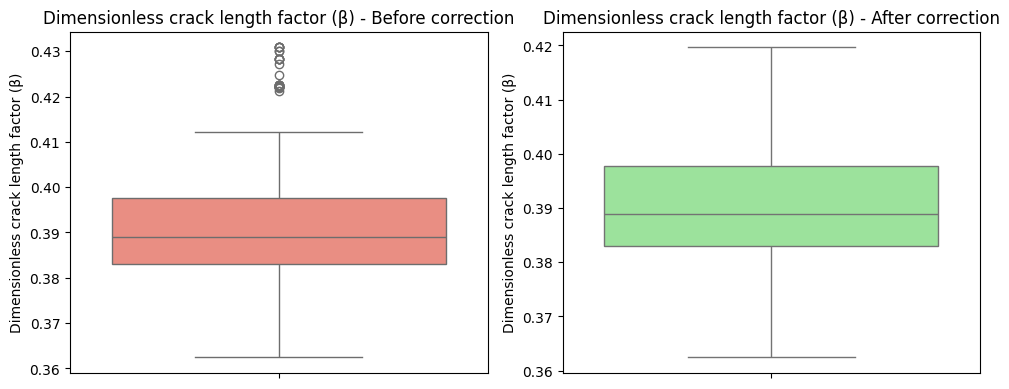

 Dimensionless stress intensity factor (λ): 1 Corrected outlier data (lower_bound =2.620, upper_bound =4.418)


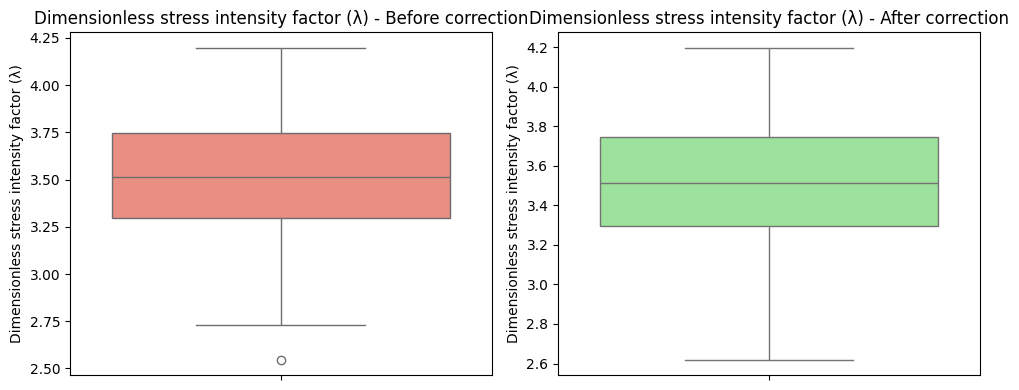

In [8]:
# Smart function to correct outliers by drawing a graph
def smart_cap_outliers_with_plot(df, show_plots=True, exclude_cols=None):
    df_capped = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # If there are any columns to exclude, remove them.
    if exclude_cols is not None:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        num_lower_outliers = (df[col] < lower_bound).sum()
        num_upper_outliers = (df[col] > upper_bound).sum()

        # If there are outliers, correction should be made.
        if num_lower_outliers > 0 or num_upper_outliers > 0:
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
            print(f" {col}: {num_lower_outliers + num_upper_outliers} Corrected outlier data "
                  f"(lower_bound ={lower_bound:.3f}, upper_bound ={upper_bound:.3f})")
        else:
            print(f" {col}: No outlier data ")

        # Show boxplot before and after correction
        if show_plots:
            fig, axes = plt.subplots(1, 2, figsize=(10, 4))
            sns.boxplot(y=df[col], ax=axes[0], color='salmon')
            sns.boxplot(y=df_capped[col], ax=axes[1], color='lightgreen')
            axes[0].set_title(f"{col} - Before correction")
            axes[1].set_title(f"{col} - After correction")
            plt.tight_layout()
            plt.show()

    return df_capped

df_c = smart_cap_outliers_with_plot(df, exclude_cols=['Loading rate (mm/min)',
                                                      'maximum loading pressure of SCB (Pmax) (N)',
                                                      "fracture toughness factor (K_IC) (Mpa.m^0.5)"])


Pearson and Spearman plot

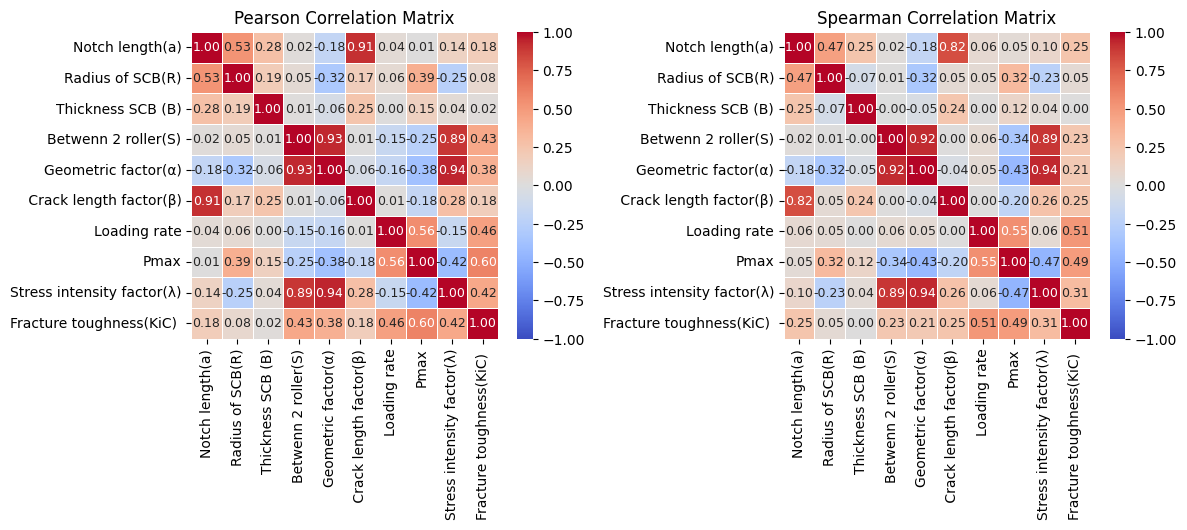

In [9]:
# Custom labels for columns and rows
labels = ['Notch length(a)',
          'Radius of SCB(R)',
          'Thickness SCB (B)',
          'Betwenn 2 roller(S)',
          'Geometric factor(α)',
          ' Crack length factor(β)',
          'Loading rate',
          'Pmax',
          'Stress intensity factor(λ)',
          'Fracture toughness(KiC) '
]

# Calculating correlation matrices
pearson_corr = df_c.corr(method='pearson')
spearman_corr = df_c.corr(method='spearman')

# Draw a shape with the proper aspect ratio for accurate alignment
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Pearson
sns.heatmap(
    pearson_corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap='coolwarm',
    square=True,
    xticklabels=labels,
    yticklabels=labels,
    vmin=-1,
    vmax=1,
    ax=axes[0],
    cbar=True,
    annot_kws={"size": 9}
)
axes[0].set_title('Pearson Correlation Matrix', fontsize=12)
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].tick_params(axis='y', labelrotation=0)

# Spearman
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap='coolwarm',
    square=True,
    xticklabels=labels,
    yticklabels=labels,
    vmin=-1,
    vmax=1,
    ax=axes[1],
    cbar=True,
    annot_kws={"size": 9}
)
axes[1].set_title('Spearman Correlation Matrix', fontsize=12)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.savefig("correlation_matrix_tight.png", dpi=300, bbox_inches='tight')
plt.show()

Remove unnecessary features

In [10]:
# Remove unnecessary features from df_c
# Remove extra spaces from column names
df_c.columns = df_c.columns.str.strip()

# List of columns to be removed
columns_to_drop = [
    "Dimensionless stress intensity factor (λ)",
    "Dimensionless crack length factor (β)",
    "Dimensionless geometric factor (α)"
    ]

# Remove spaces from the column list
columns_to_drop = [col.strip() for col in columns_to_drop]

# Check which columns actually exist in df_c
existing_columns = df_c.columns.tolist()
columns_to_drop_in_df = [col for col in columns_to_drop if col in existing_columns]

print("Columns to drop (that exist in df_c):", columns_to_drop_in_df)
print("All existing columns in df_c:", df_c.columns.tolist())

# # Delete existing columns
df_c = df_c.drop(columns=columns_to_drop_in_df, errors='ignore')

print(" Columns after dropping unnecessary features:", df_c.shape)
print(" Remaining columns:", df_c.columns.tolist())


Columns to drop (that exist in df_c): ['Dimensionless stress intensity factor (λ)', 'Dimensionless crack length factor (β)', 'Dimensionless geometric factor (α)']
All existing columns in df_c: ['Notch length (a) (mm)', 'Radius of SCB (R) (mm)', 'Thickness of SCB (B) (mm)', 'Distance between two rollers(S)(mm)', 'Dimensionless geometric factor (α)', 'Dimensionless crack length factor (β)', 'Loading rate (mm/min)', 'maximum loading pressure of SCB (Pmax) (N)', 'Dimensionless stress intensity factor (λ)', 'fracture toughness factor (K_IC) (Mpa.m^0.5)']
 Columns after dropping unnecessary features: (300, 7)
 Remaining columns: ['Notch length (a) (mm)', 'Radius of SCB (R) (mm)', 'Thickness of SCB (B) (mm)', 'Distance between two rollers(S)(mm)', 'Loading rate (mm/min)', 'maximum loading pressure of SCB (Pmax) (N)', 'fracture toughness factor (K_IC) (Mpa.m^0.5)']


Separate features and target

In [11]:
# Split first
from sklearn.model_selection import train_test_split
# 1. Separate features and target
X = df_c.drop(columns=["maximum loading pressure of SCB (Pmax) (N)"], axis=1).values  # Features
y = df_c["maximum loading pressure of SCB (Pmax) (N)"].values.reshape(-1, 1)          # Target (reshaped to 2D)

# Step 1: Separate test data (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print(f"temp:{len(X_temp)}, Test: {len(X_test)}")

temp:270, Test: 30


SVR model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  1.Network search (GridSearchCV)

# Base model
svr = SVR()

# Hyperparameter search space
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.5, 1.0]
}

# Scale X_temp and y_temp for GridSearchCV
# These scalers will be used for GridSearchCV only.
# For KFold cross-validation, new scalers will be fitted inside each fold.
X_scaler_grid = StandardScaler()
y_scaler_grid = StandardScaler()

X_temp_scaled_for_grid = X_scaler_grid.fit_transform(X_temp)
y_temp_scaled_for_grid = y_scaler_grid.fit_transform(y_temp)

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # 5-fold cross-validation during grid search
    n_jobs=-1,
    verbose=1
)

print(" Running Grid Search ...")
grid_search.fit(X_temp_scaled_for_grid, y_temp_scaled_for_grid.ravel()) # Use scaled temp data for grid search

best_params = grid_search.best_params_
print("\n Best Parameters Found:")
for k, v in best_params.items():
    print(f"   {k}: {v}")
print(f"Best CV MSE = {-grid_search.best_score_:.4f}")

# Final model with the best parameters (from grid search, not yet trained on all X_temp)
best_svr = grid_search.best_estimator_

# 2. Cross-Validation (5-Fold) using best_svr


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {"train": [], "val": []}

print("\n Running 5-Fold Cross Validation with best SVR parameters...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    X_tr, X_val = X_temp[train_idx], X_temp[val_idx]
    y_tr, y_val = y_temp[train_idx], y_temp[val_idx]

    #  Separate normalization in each fold to prevent data leakage
    X_scaler_fold = StandardScaler()
    y_scaler_fold = StandardScaler()

    X_tr_scaled = X_scaler_fold.fit_transform(X_tr)
    y_tr_scaled = y_scaler_fold.fit_transform(y_tr)
    X_val_scaled = X_scaler_fold.transform(X_val)
    y_val_scaled = y_scaler_fold.transform(y_val)

    # Make a copy of best_svr to train on each fold,
    # otherwise, it gets continually refitted
    model_fold = SVR(**best_params) # Re-initialize with best params for each fold

    # Model training
    model_fold.fit(X_tr_scaled, y_tr_scaled.ravel())

    # Train and Val prediction
    y_tr_pred_scaled = model_fold.predict(X_tr_scaled)
    y_val_pred_scaled = model_fold.predict(X_val_scaled)

    y_tr_pred = y_scaler_fold.inverse_transform(y_tr_pred_scaled.reshape(-1, 1))
    y_val_pred = y_scaler_fold.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
    y_tr_true = y_scaler_fold.inverse_transform(y_tr_scaled)
    y_val_true = y_scaler_fold.inverse_transform(y_val_scaled)



   # Metrics
    train_r2 = r2_score(y_tr_true, y_tr_pred)
    val_r2 = r2_score(y_val_true, y_val_pred)

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

    cv_results["train"].append(train_r2)
    cv_results["val"].append(val_r2)

    print(f"\n Mean Train R²: {np.mean(cv_results['train']):.4f}")
    print(f" Mean Val   R²: {np.mean(cv_results['val']):.4f}")

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

#  3. Final training on the entire Train+Val (X_temp, y_temp) and evaluation on Test (X_test, y_test)


# Fit scalers on the entire training+validation set (X_temp, y_temp)
final_X_scaler = StandardScaler()
final_y_scaler = StandardScaler()

X_final_train_scaled = final_X_scaler.fit_transform(X_temp)
y_final_train_scaled = final_y_scaler.fit_transform(y_temp)

# Transform the test set using the scalers fitted on X_temp and y_temp
X_test_scaled = final_X_scaler.transform(X_test)
y_test_scaled = final_y_scaler.transform(y_test)

# Train the final model using best parameters on the full training+validation data
final_svr_model = SVR(**best_params)
final_svr_model.fit(X_final_train_scaled, y_final_train_scaled.ravel())

metrics = {}

# Evaluate on the final training set (X_temp)
y_pred_final_train_scaled = final_svr_model.predict(X_final_train_scaled)
y_pred_final_train = final_y_scaler.inverse_transform(y_pred_final_train_scaled.reshape(-1, 1))
y_true_final_train = final_y_scaler.inverse_transform(y_final_train_scaled)

mse_final_train = mean_squared_error(y_true_final_train, y_pred_final_train)
mae_final_train = mean_absolute_error(y_true_final_train, y_pred_final_train)
rmse_final_train = np.sqrt(mse_final_train)
r2_final_train = r2_score(y_true_final_train, y_pred_final_train)
metrics["Final Train"] = (mse_final_train, mae_final_train, rmse_final_train, r2_final_train)

print(f"\n Final Train Performance (on all X_temp):")
print(f"   MSE  = {mse_final_train:.4f}")
print(f"   MAE  = {mae_final_train:.4f}")
print(f"   RMSE = {rmse_final_train:.4f}")
print(f"   R²   = {r2_final_train:.4f}")

# Evaluate on the final validation set(X_temp)
y_pred_final_validation_scaled = final_svr_model.predict(X_val_scaled)
y_pred_final_validation = final_y_scaler.inverse_transform(y_pred_final_validation_scaled.reshape(-1, 1))
y_true_final_validation = final_y_scaler.inverse_transform(y_val_scaled)

mse_final_validation = mean_squared_error(y_true_final_validation, y_pred_final_validation)
mae_final_validation = mean_absolute_error(y_true_final_validation, y_pred_final_validation)
rmse_final_validation = np.sqrt(mse_final_validation)
r2_final_validation = r2_score(y_true_final_validation, y_pred_final_validation)
metrics["Final Validation"] = (mse_final_validation, mae_final_validation, rmse_final_validation, r2_final_validation)

print(f"\n Final Validation Performance (on all X_temp):")
print(f"   MSE  = {mse_final_validation:.4f}")
print(f"   MAE  = {mae_final_validation:.4f}")
print(f"   RMSE = {rmse_final_validation:.4f}")
print(f"   R2   = {r2_final_validation:.4f}")

# Evaluate on the test set (X_test)
y_pred_test_scaled = final_svr_model.predict(X_test_scaled)
y_pred_test = final_y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
y_true_test = final_y_scaler.inverse_transform(y_test_scaled)

mse_test = mean_squared_error(y_true_test, y_pred_test)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true_test, y_pred_test)
metrics["Test"] = (mse_test, mae_test, rmse_test, r2_test)

print(f"\n Test Performance:")
print(f"   MSE  = {mse_test:.4f}")
print(f"   MAE  = {mae_test:.4f}")
print(f"   RMSE = {rmse_test:.4f}")
print(f"   R²   = {r2_test:.4f}")

 Running Grid Search ...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

 Best Parameters Found:
   C: 10
   epsilon: 0.01
   gamma: 0.01
   kernel: rbf
Best CV MSE = 0.0062

 Running 5-Fold Cross Validation with best SVR parameters...
 Fold 1: Train R²=0.9949, Val R²=0.9864

 Mean Train R²: 0.9949
 Mean Val   R²: 0.9864
 Fold 1: Train R²=0.9949, Val R²=0.9864
 Fold 2: Train R²=0.9950, Val R²=0.9925

 Mean Train R²: 0.9949
 Mean Val   R²: 0.9895
 Fold 2: Train R²=0.9950, Val R²=0.9925
 Fold 3: Train R²=0.9957, Val R²=0.9968

 Mean Train R²: 0.9952
 Mean Val   R²: 0.9919
 Fold 3: Train R²=0.9957, Val R²=0.9968
 Fold 4: Train R²=0.9968, Val R²=0.9927

 Mean Train R²: 0.9956
 Mean Val   R²: 0.9921
 Fold 4: Train R²=0.9968, Val R²=0.9927
 Fold 5: Train R²=0.9955, Val R²=0.9901

 Mean Train R²: 0.9956
 Mean Val   R²: 0.9917
 Fold 5: Train R²=0.9955, Val R²=0.9901

 Final Train Performance (on all X_temp):
   MSE  = 207.2329
   MAE  = 7.6903
   RMSE = 14.3956
   R²   = 0.9958


Actual vs Predicted and Residuals SVR

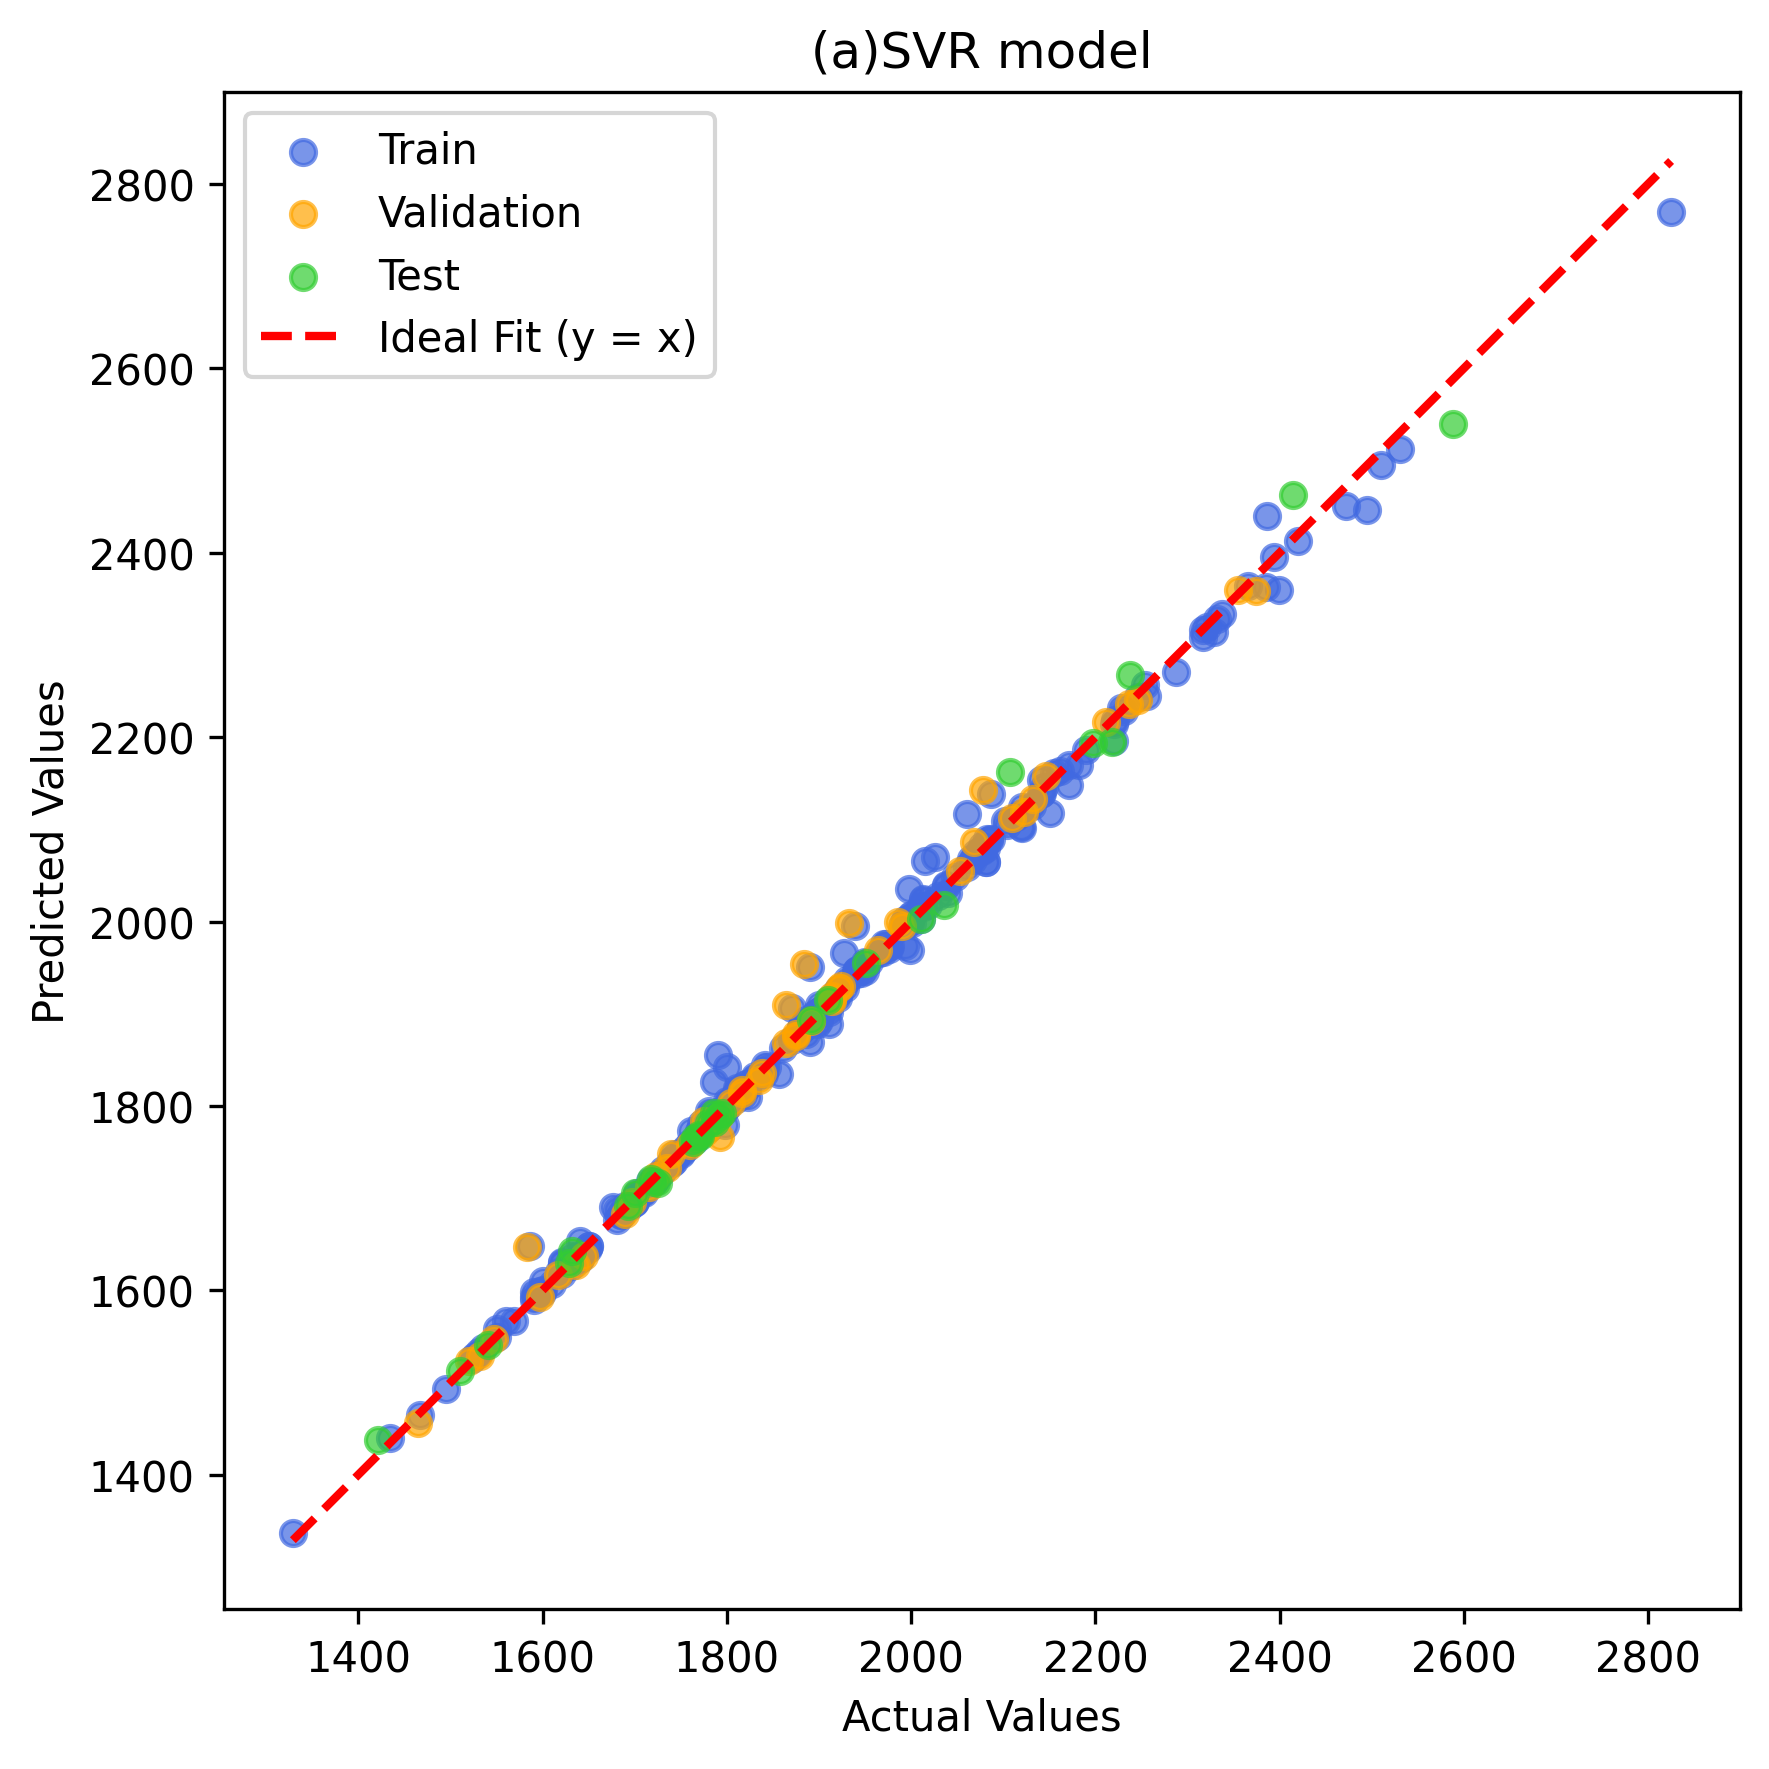

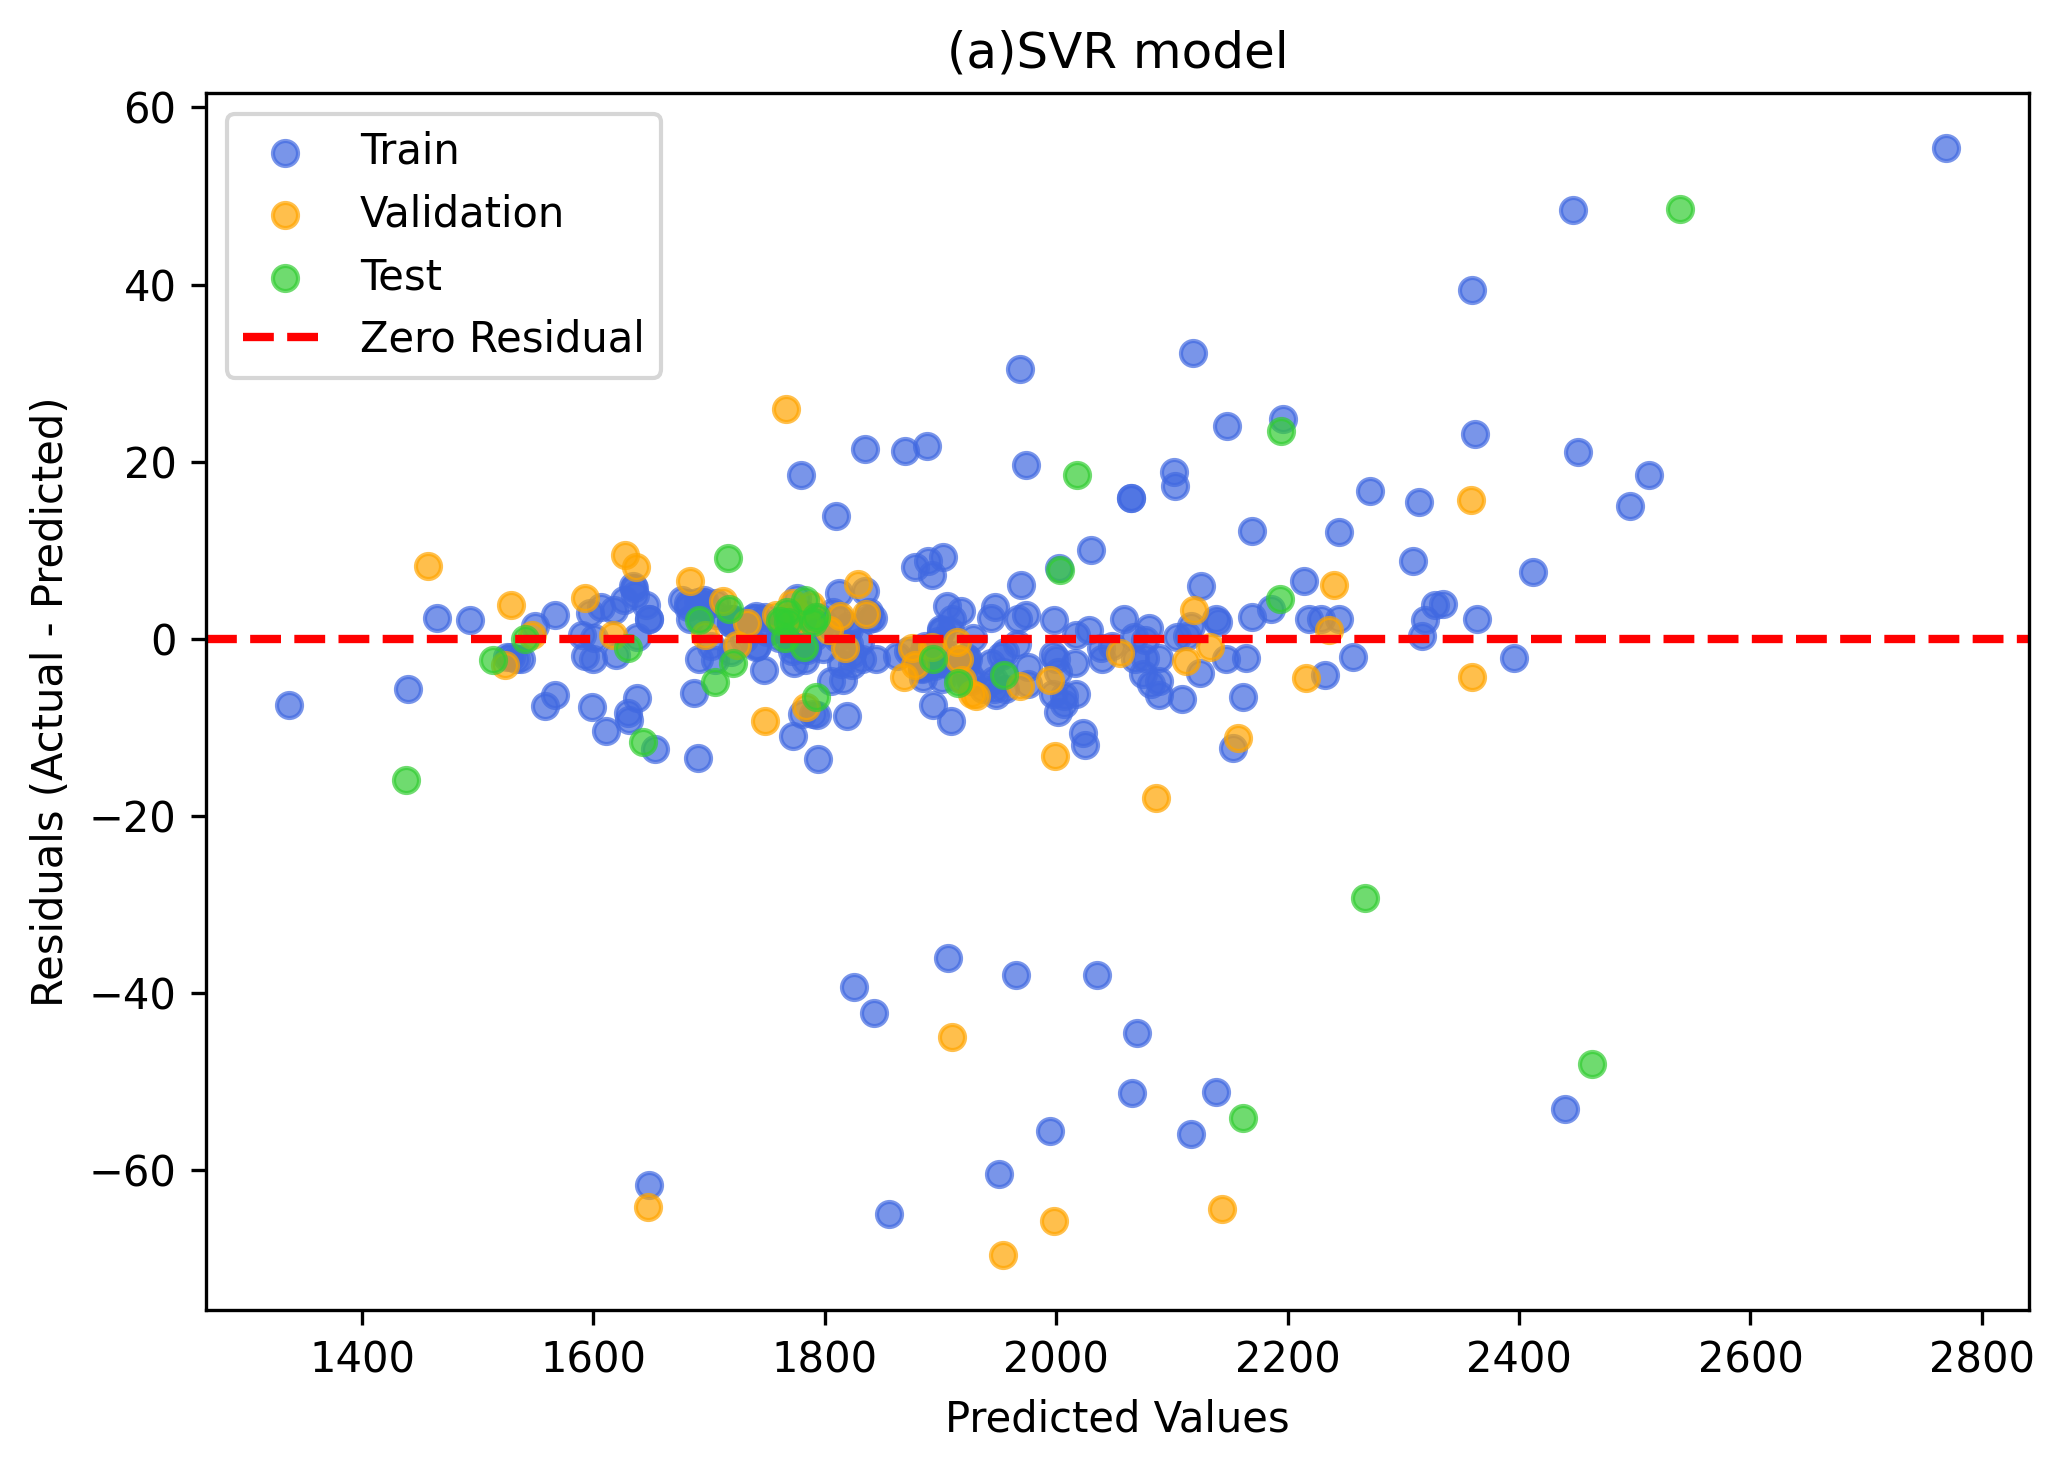

In [ ]:
# Actual vs Predicted (Train / Val / Test)

def plot_combined_predictions(y_true_train, y_pred_train,
                              y_true_val, y_pred_val,
                              y_true_test, y_pred_test):
    # Convert to 1D array
    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    plt.figure(figsize=(6,6),dpi=300)
    plt.scatter(y_true_train, y_pred_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_true_val,   y_pred_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_true_test,  y_pred_test,  color='limegreen', alpha=0.7, label='Test')

    # Ideal line y = x
    all_true = np.concatenate([y_true_train, y_true_val, y_true_test])
    plt.plot([all_true.min(), all_true.max()],
             [all_true.min(), all_true.max()], 'r--', lw=2, label='Ideal Fit (y = x)')

    plt.title("(a)SVR model")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



# Residuals (Train / Val / Test)

def plot_combined_residuals(y_true_train, y_pred_train,
                            y_true_val, y_pred_val,
                            y_true_test, y_pred_test):
    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    residuals_train = y_true_train - y_pred_train
    residuals_val   = y_true_val   - y_pred_val
    residuals_test  = y_true_test  - y_pred_test

    plt.figure(figsize=(7,5),dpi=300)
    plt.scatter(y_pred_train, residuals_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_pred_val,   residuals_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_pred_test,  residuals_test,  color='limegreen', alpha=0.7, label='Test')

    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')
    plt.title("(a)SVR model")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_combined_predictions(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

plot_combined_residuals(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)


GPR model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF, Matern, RationalQuadratic, WhiteKernel,
    ConstantKernel, DotProduct)

#  1. Network search(GridSearchCV)

# Base model
gpr = GaussianProcessRegressor()
kernel_options = [
    ConstantKernel(1.0) * RBF(length_scale=5.0) + WhiteKernel(noise_level=5.0),
    ConstantKernel(1.0) * Matern(length_scale=5.0, nu=1.5) + WhiteKernel(noise_level=5.0),
]

param_grid = {
    'kernel': kernel_options,
    'alpha': [ 1e-1],
    'n_restarts_optimizer': [ 3,5],
    'normalize_y': [True, False]
}

# Scale X_temp and y_temp for GridSearchCV
# These scalers will be used for GridSearchCV only.
# For KFold cross-validation, new scalers will be fitted inside each fold.
X_scaler_grid = StandardScaler()
y_scaler_grid = StandardScaler()

X_temp_scaled_for_grid = X_scaler_grid.fit_transform(X_temp)
y_temp_scaled_for_grid = y_scaler_grid.fit_transform(y_temp)

grid_search = GridSearchCV(
    estimator=gpr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # 5-fold cross-validation during grid search
    n_jobs=-1,
    verbose=1
)

print(" Running Grid Search ...")
grid_search.fit(X_temp_scaled_for_grid, y_temp_scaled_for_grid.ravel()) # Use scaled temp data for grid search

best_params = grid_search.best_params_
print("\n Best Parameters Found:")
for k, v in best_params.items():
    print(f"   {k}: {v}")
print(f"Best CV MSE = {-grid_search.best_score_:.4f}")

# Final model with the best parameters (from grid search, not yet trained on all X_temp)
best_gpr = grid_search.best_estimator_

# 2. Cross-Validation (5-Fold) using best_gpr

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {"train": [], "val": []}

print("\n Running 5-Fold Cross Validation with best SVR parameters...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    X_tr, X_val = X_temp[train_idx], X_temp[val_idx]
    y_tr, y_val = y_temp[train_idx], y_temp[val_idx]

    # Separate normalization in each fold to prevent data leakage
    X_scaler_fold = StandardScaler()
    y_scaler_fold = StandardScaler()

    X_tr_scaled = X_scaler_fold.fit_transform(X_tr)
    y_tr_scaled = y_scaler_fold.fit_transform(y_tr)
    X_val_scaled = X_scaler_fold.transform(X_val)
    y_val_scaled = y_scaler_fold.transform(y_val)

    # Make a copy of best_svr to train on each fold,
    # otherwise, it gets continually refitted
    model_fold = GaussianProcessRegressor(**best_params) # Re-initialize with best params for each fold
    # Model training
    model_fold.fit(X_tr_scaled, y_tr_scaled.ravel())

    # Train and Val prediction
    y_tr_pred_scaled = model_fold.predict(X_tr_scaled)
    y_val_pred_scaled = model_fold.predict(X_val_scaled)

    y_tr_pred = y_scaler_fold.inverse_transform(y_tr_pred_scaled.reshape(-1, 1))
    y_val_pred = y_scaler_fold.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
    y_tr_true = y_scaler_fold.inverse_transform(y_tr_scaled)
    y_val_true = y_scaler_fold.inverse_transform(y_val_scaled)



    # Metrics
    train_r2 = r2_score(y_tr_true, y_tr_pred)
    val_r2 = r2_score(y_val_true, y_val_pred)

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

    cv_results["train"].append(train_r2)
    cv_results["val"].append(val_r2)

    print(f"\n Mean Train R²: {np.mean(cv_results['train']):.4f}")
    print(f" Mean Val   R²: {np.mean(cv_results['val']):.4f}")

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

#  3. Final training on the entire Train+Val (X_temp, y_temp) and evaluation on Test (X_test, y_test)


# Fit scalers on the entire training+validation set (X_temp, y_temp)
final_X_scaler = StandardScaler()
final_y_scaler = StandardScaler()

X_final_train_scaled = final_X_scaler.fit_transform(X_temp)
y_final_train_scaled = final_y_scaler.fit_transform(y_temp)

# Transform the test set using the scalers fitted on X_temp and y_temp
X_test_scaled = final_X_scaler.transform(X_test)
y_test_scaled = final_y_scaler.transform(y_test)

# Train the final model using best parameters on the full training+validation data
final_gpr_model = GaussianProcessRegressor(**best_params)
final_gpr_model.fit(X_final_train_scaled, y_final_train_scaled.ravel())

metrics = {}

# Evaluate on the final training set (X_temp)
y_pred_final_train_scaled = final_gpr_model.predict(X_final_train_scaled)
y_pred_final_train = final_y_scaler.inverse_transform(y_pred_final_train_scaled.reshape(-1, 1))
y_true_final_train = final_y_scaler.inverse_transform(y_final_train_scaled)

mse_final_train = mean_squared_error(y_true_final_train, y_pred_final_train)
mae_final_train = mean_absolute_error(y_true_final_train, y_pred_final_train)
rmse_final_train = np.sqrt(mse_final_train)
r2_final_train = r2_score(y_true_final_train, y_pred_final_train)
metrics["Final Train"] = (mse_final_train, mae_final_train, rmse_final_train, r2_final_train)

print(f"\n Final Train Performance (on all X_temp):")
print(f"   MSE  = {mse_final_train:.4f}")
print(f"   MAE  = {mae_final_train:.4f}")
print(f"   RMSE = {rmse_final_train:.4f}")
print(f"   R²   = {r2_final_train:.4f}")

# Evaluate on the final validation set(X_temp)
y_pred_final_validation_scaled = final_gpr_model.predict(X_val_scaled)
y_pred_final_validation = final_y_scaler.inverse_transform(y_pred_final_validation_scaled.reshape(-1, 1))
y_true_final_validation = final_y_scaler.inverse_transform(y_val_scaled)

mse_final_validation = mean_squared_error(y_true_final_validation, y_pred_final_validation)
mae_final_validation = mean_absolute_error(y_true_final_validation, y_pred_final_validation)
rmse_final_validation = np.sqrt(mse_final_validation)
r2_final_validation = r2_score(y_true_final_validation, y_pred_final_validation)
metrics["Final Validation"] = (mse_final_validation, mae_final_validation, rmse_final_validation, r2_final_validation)

print(f"\n Final Validation Performance (on all X_temp):")
print(f"   MSE  = {mse_final_validation:.4f}")
print(f"   MAE  = {mae_final_validation:.4f}")
print(f"   RMSE = {rmse_final_validation:.4f}")
print(f"   R2   = {r2_final_validation:.4f}")

# Evaluate on the test set (X_test)
y_pred_test_scaled = final_gpr_model.predict(X_test_scaled)
y_pred_test = final_y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
y_true_test = final_y_scaler.inverse_transform(y_test_scaled)

mse_test = mean_squared_error(y_true_test, y_pred_test)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true_test, y_pred_test)
metrics["Test"] = (mse_test, mae_test, rmse_test, r2_test)

print(f"\n Test Performance:")
print(f"   MSE  = {mse_test:.4f}")
print(f"   MAE  = {mae_test:.4f}")
print(f"   RMSE = {rmse_test:.4f}")
print(f"   R²   = {r2_test:.4f}")

 Running Grid Search ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



 Best Parameters Found:
   alpha: 0.1
   kernel: 1**2 * RBF(length_scale=5) + WhiteKernel(noise_level=5)
   n_restarts_optimizer: 5
   normalize_y: True
Best CV MSE = 0.0093

 Running 5-Fold Cross Validation with best SVR parameters...


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 Fold 1: Train R²=0.9917, Val R²=0.9837

 Mean Train R²: 0.9917
 Mean Val   R²: 0.9837
 Fold 1: Train R²=0.9917, Val R²=0.9837


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 Fold 2: Train R²=0.9925, Val R²=0.9939

 Mean Train R²: 0.9921
 Mean Val   R²: 0.9888
 Fold 2: Train R²=0.9925, Val R²=0.9939


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 Fold 3: Train R²=0.9925, Val R²=0.9916

 Mean Train R²: 0.9923
 Mean Val   R²: 0.9898
 Fold 3: Train R²=0.9925, Val R²=0.9916


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 Fold 4: Train R²=0.9929, Val R²=0.9869

 Mean Train R²: 0.9924
 Mean Val   R²: 0.9891
 Fold 4: Train R²=0.9929, Val R²=0.9869


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 Fold 5: Train R²=0.9925, Val R²=0.9906

 Mean Train R²: 0.9924
 Mean Val   R²: 0.9894
 Fold 5: Train R²=0.9925, Val R²=0.9906

 Final Train Performance (on all X_temp):
   MSE  = 325.1375
   MAE  = 13.3837
   RMSE = 18.0316
   R²   = 0.9934

 Final Validation Performance (on all X_temp):
   MSE  = 373.8347
   MAE  = 13.3245
   RMSE = 19.3348
   R2   = 0.9914

 Test Performance:
   MSE  = 305.5068
   MAE  = 12.0161
   RMSE = 17.4788
   R²   = 0.9955


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Actual vs Predicted and Residuals plot

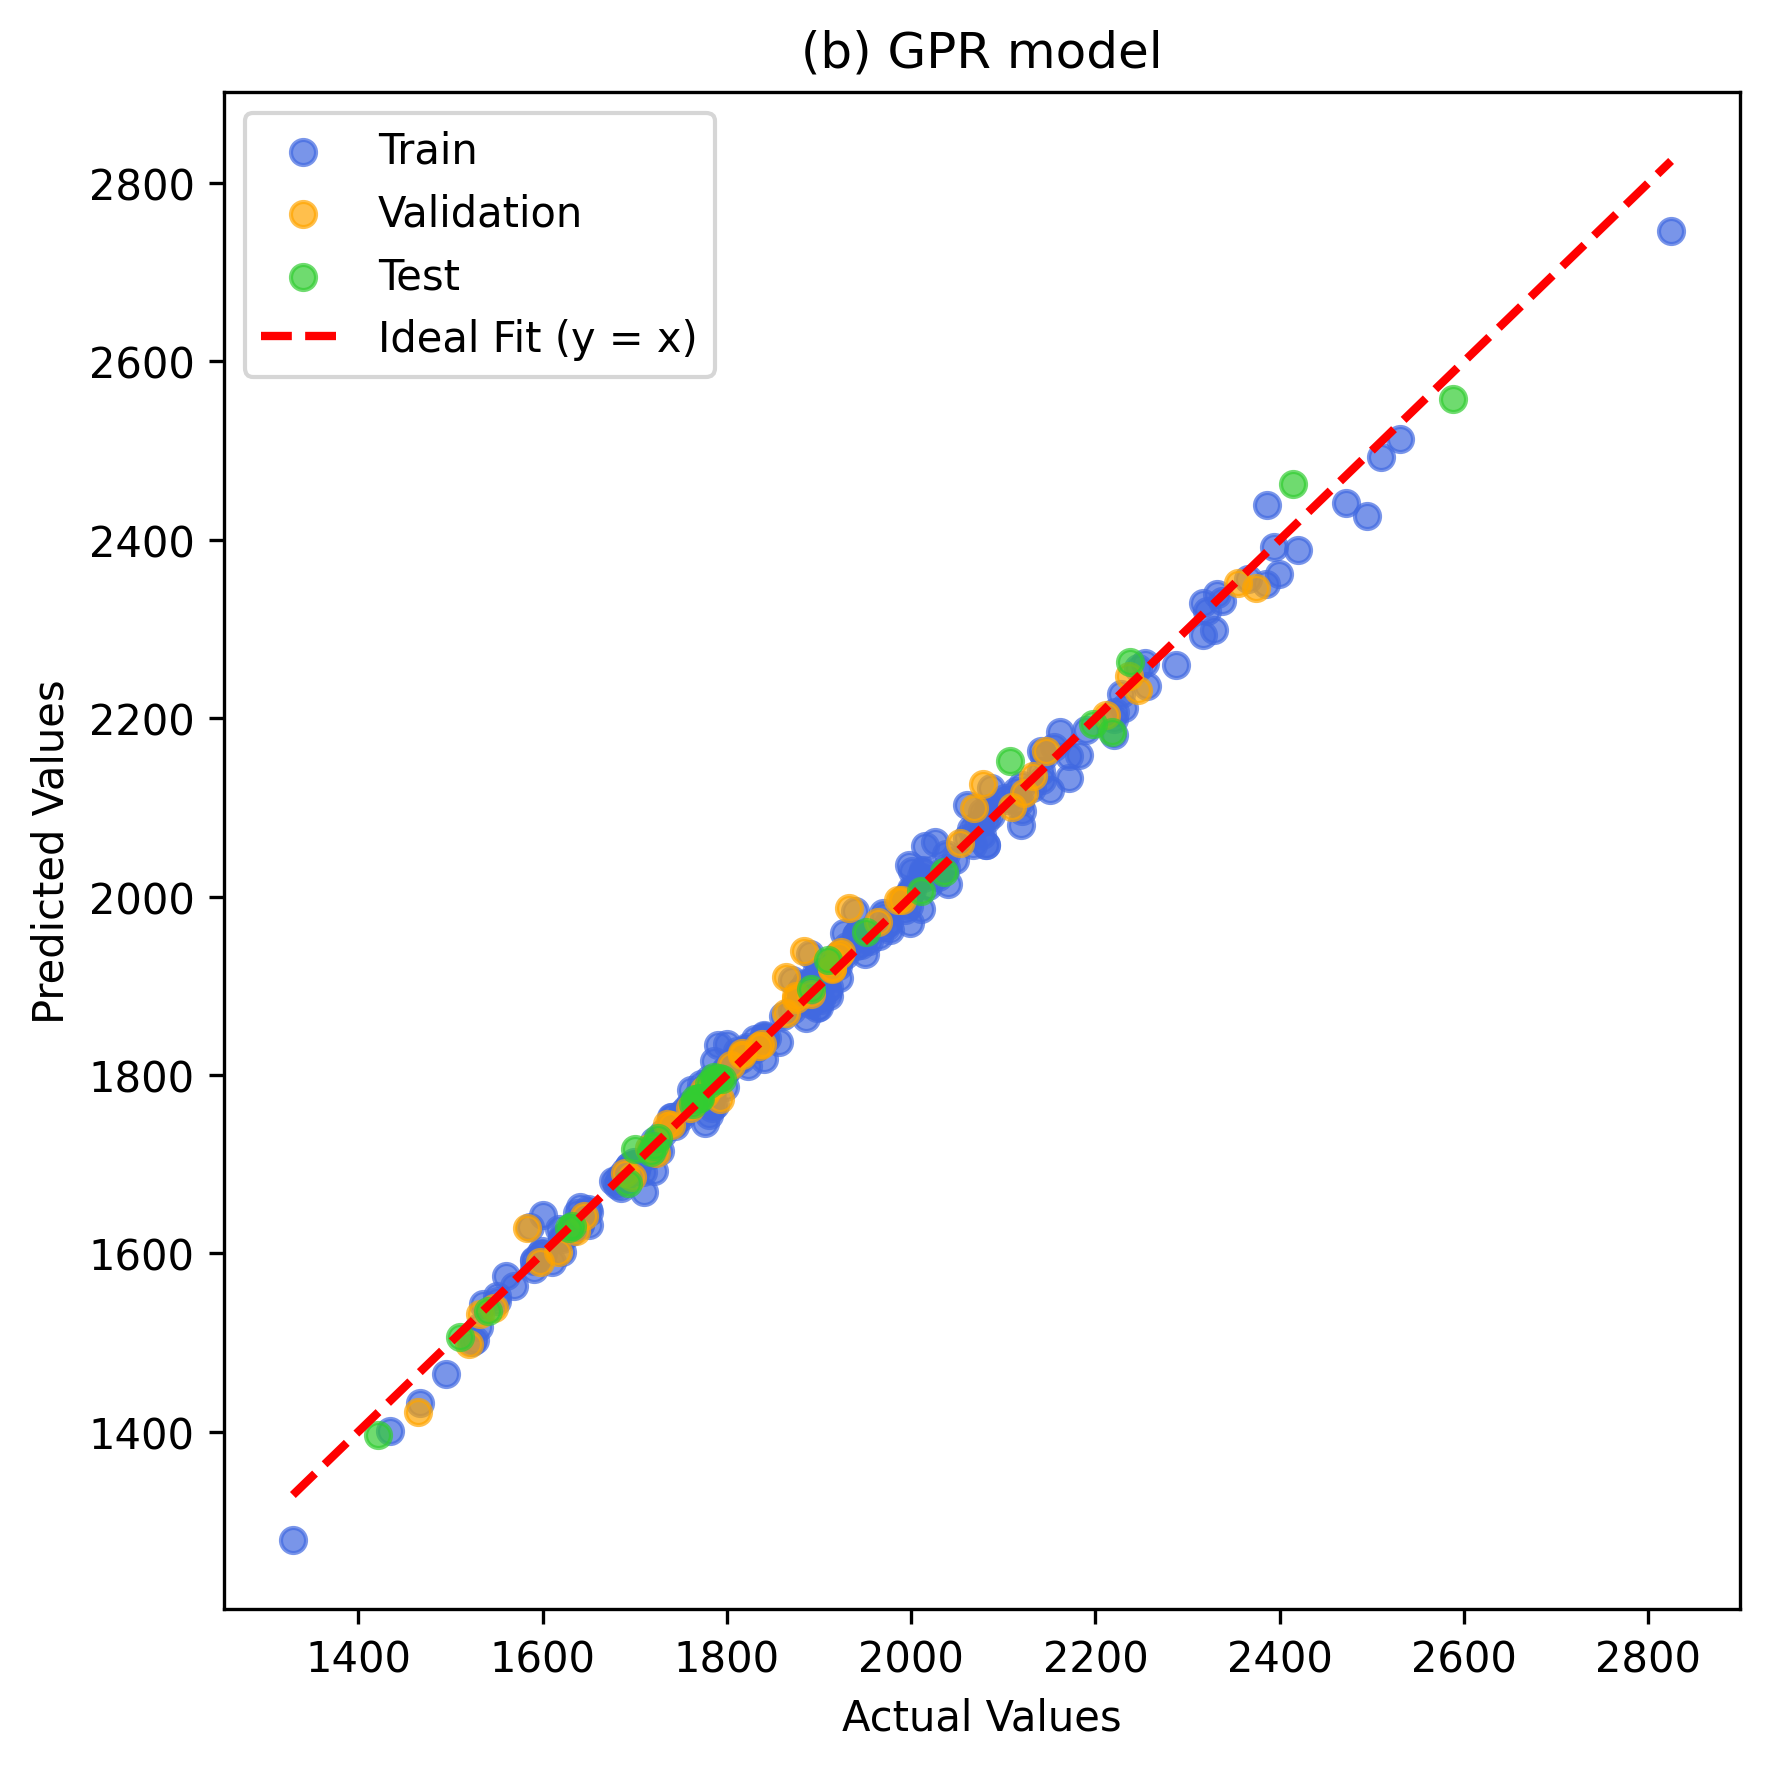

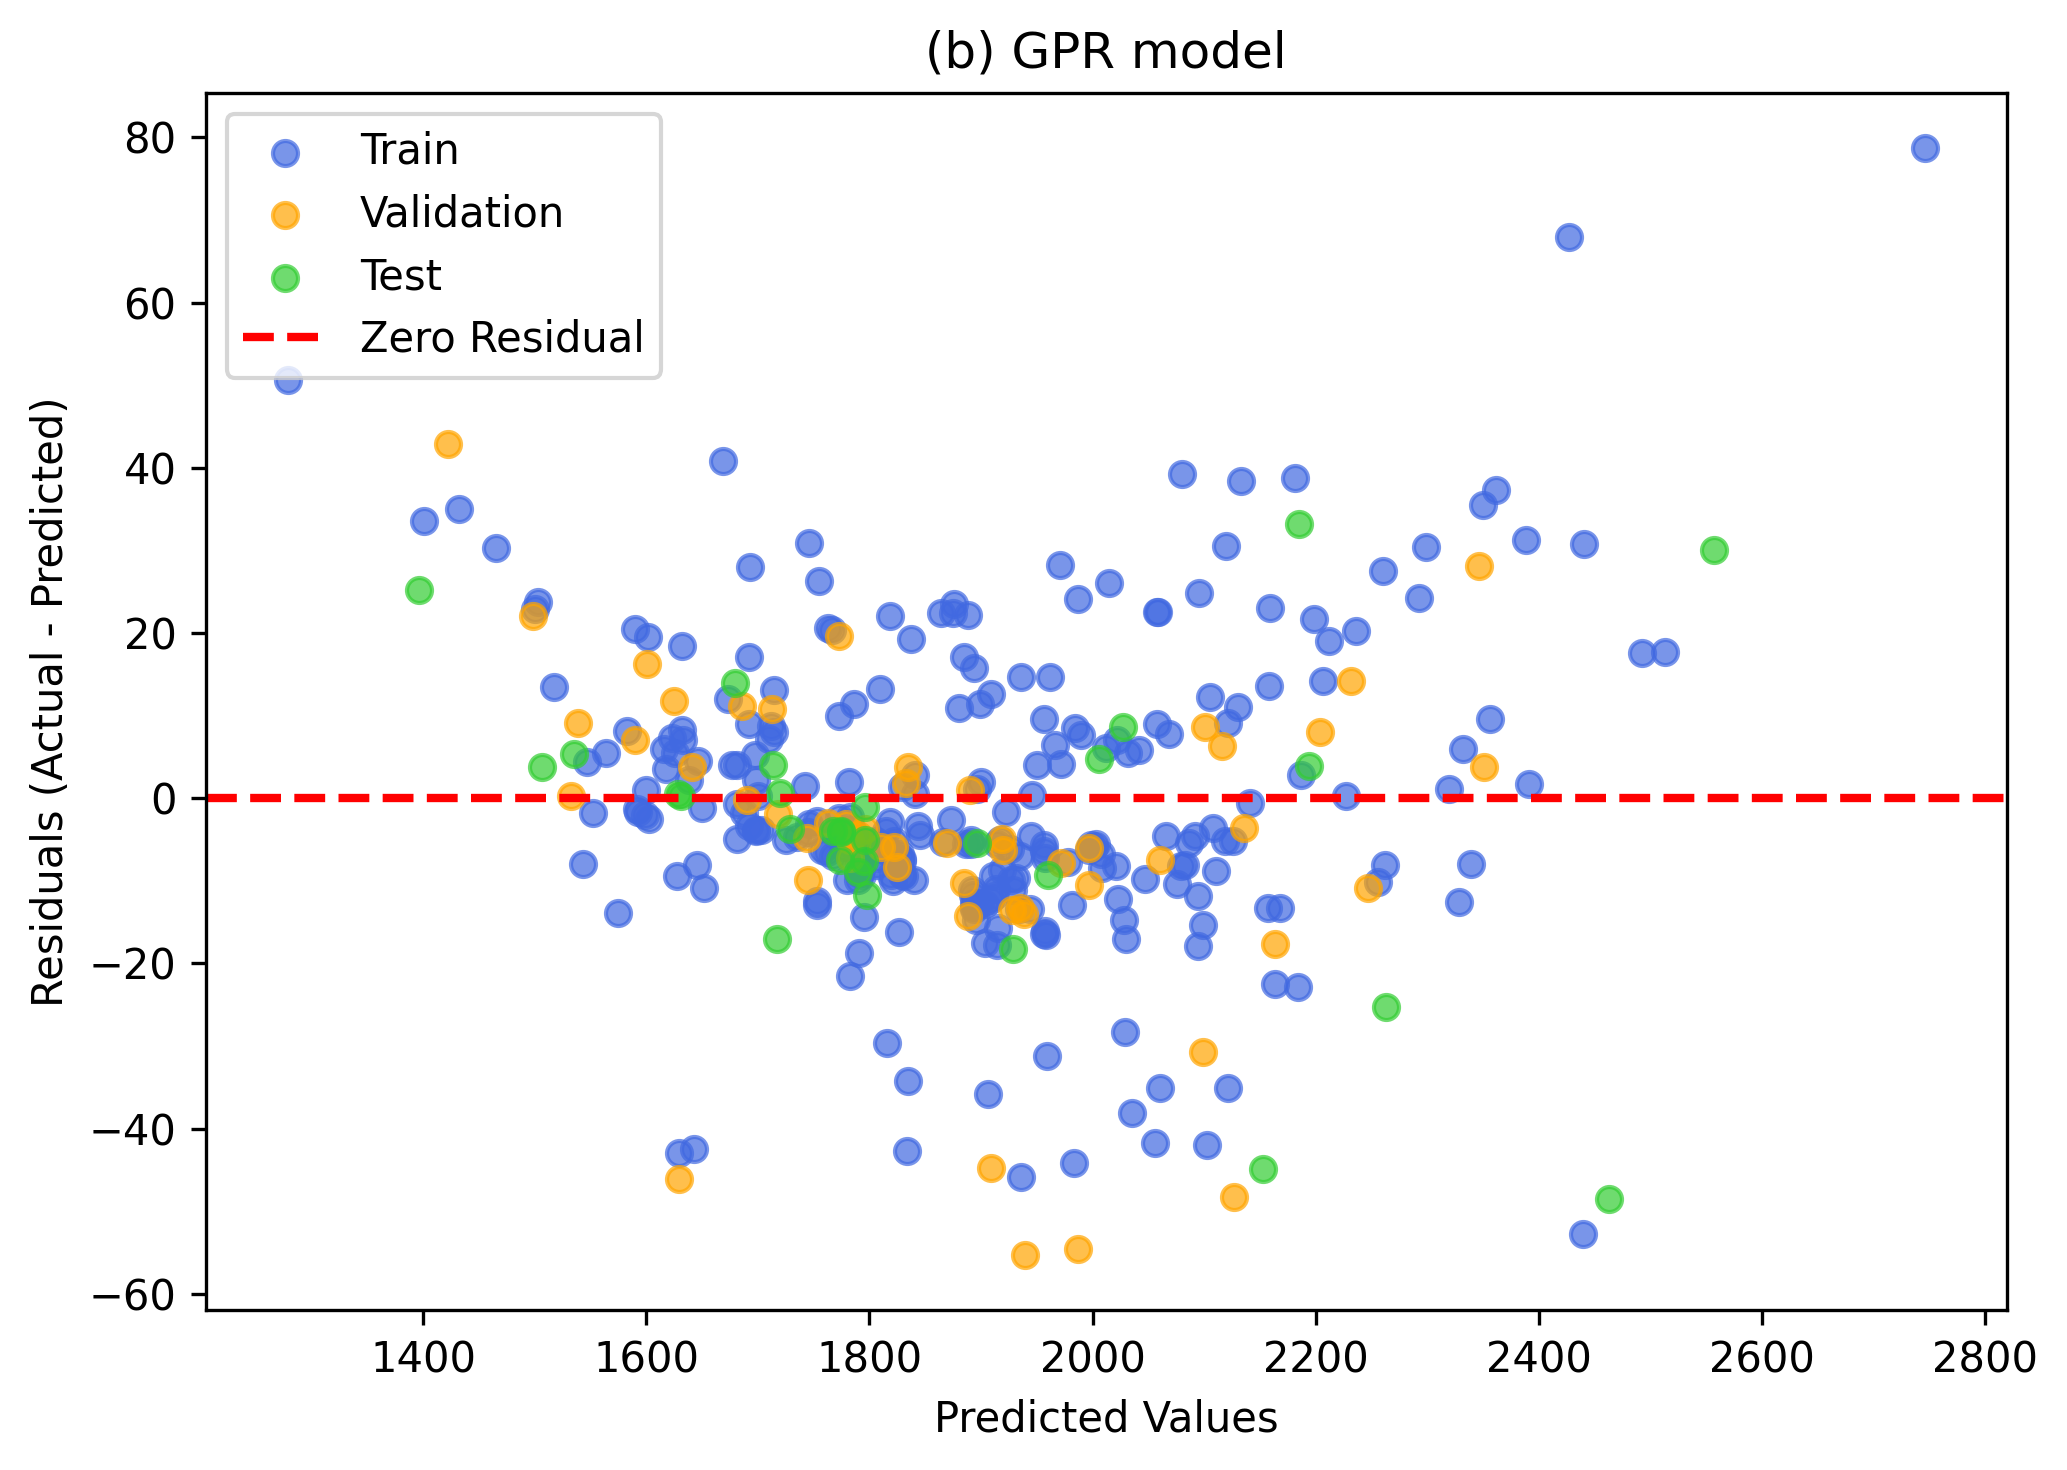

In [ ]:
# Actual vs Predicted (Train / Val / Test)

def plot_combined_predictions(y_true_train, y_pred_train,
                              y_true_val, y_pred_val,
                              y_true_test, y_pred_test):

    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    plt.figure(figsize=(6,6), dpi=300)
    plt.scatter(y_true_train, y_pred_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_true_val,   y_pred_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_true_test,  y_pred_test,  color='limegreen', alpha=0.7, label='Test')


    all_true = np.concatenate([y_true_train, y_true_val, y_true_test])
    plt.plot([all_true.min(), all_true.max()],
             [all_true.min(), all_true.max()], 'r--', lw=2, label='Ideal Fit (y = x)')

    plt.title("(b) GPR model")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



# Residuals (Train / Val / Test)

def plot_combined_residuals(y_true_train, y_pred_train,
                            y_true_val, y_pred_val,
                            y_true_test, y_pred_test):
    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    residuals_train = y_true_train - y_pred_train
    residuals_val   = y_true_val   - y_pred_val
    residuals_test  = y_true_test  - y_pred_test

    plt.figure(figsize=(7,5), dpi=300)
    plt.scatter(y_pred_train, residuals_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_pred_val,   residuals_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_pred_test,  residuals_test,  color='limegreen', alpha=0.7, label='Test')

    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')
    plt.title("(b) GPR model")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_combined_predictions(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

plot_combined_residuals(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

RFR model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 # 1. Network search (GridSearchCV)

# Base model
rf = RandomForestRegressor()

param_grid = { 'n_estimators': [80,100,120],
              'max_depth': [2,4,6],
               'min_samples_split': [6,8],
               'min_samples_leaf': [3,5,8],
               'max_features': [0.5,0.7],
               'bootstrap': [True],
               'ccp_alpha': [0.0003,0.001]
               }


# Scale X_temp and y_temp for GridSearchCV
# These scalers will be used for GridSearchCV only.
# For KFold cross-validation, new scalers will be fitted inside each fold.
X_scaler_grid = StandardScaler()
y_scaler_grid = StandardScaler()

X_temp_scaled_for_grid = X_scaler_grid.fit_transform(X_temp)
y_temp_scaled_for_grid = y_scaler_grid.fit_transform(y_temp)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # 5-fold cross-validation during grid search
    n_jobs=-1,
    verbose=1
)

print("Running Grid Search ...")
grid_search.fit(X_temp_scaled_for_grid, y_temp_scaled_for_grid.ravel()) # Use scaled temp data for grid search

best_params = grid_search.best_params_
print("\n Best Parameters Found:")
for k, v in best_params.items():
    print(f"   {k}: {v}")
print(f"Best CV MSE = {-grid_search.best_score_:.4f}")

# Final model with the best parameters (from grid search, not yet trained on all X_temp)
best_rf = grid_search.best_estimator_


# 2. Cross-Validation (5-Fold) using best_rf


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {"train": [], "val": []}

print("\n Running 5-Fold Cross Validation with best SVR parameters...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    X_tr, X_val = X_temp[train_idx], X_temp[val_idx]
    y_tr, y_val = y_temp[train_idx], y_temp[val_idx]

    # Separate normalization on each fold to prevent data leakage
    X_scaler_fold = StandardScaler()
    y_scaler_fold = StandardScaler()

    X_tr_scaled = X_scaler_fold.fit_transform(X_tr)
    y_tr_scaled = y_scaler_fold.fit_transform(y_tr)
    X_val_scaled = X_scaler_fold.transform(X_val)
    y_val_scaled = y_scaler_fold.transform(y_val)

    # Make a copy of best_svr to train on each fold,
    # otherwise, it gets continually refitted
    model_fold = RandomForestRegressor(**best_params) # Re-initialize with best params for each fold

    # Model training
    model_fold.fit(X_tr_scaled, y_tr_scaled.ravel())

    # Train and Val prediction
    y_tr_pred_scaled = model_fold.predict(X_tr_scaled)
    y_val_pred_scaled = model_fold.predict(X_val_scaled)

    y_tr_pred = y_scaler_fold.inverse_transform(y_tr_pred_scaled.reshape(-1, 1))
    y_val_pred = y_scaler_fold.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
    y_tr_true = y_scaler_fold.inverse_transform(y_tr_scaled)
    y_val_true = y_scaler_fold.inverse_transform(y_val_scaled)



   # Metrics
    train_r2 = r2_score(y_tr_true, y_tr_pred)
    val_r2 = r2_score(y_val_true, y_val_pred)

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

    cv_results["train"].append(train_r2)
    cv_results["val"].append(val_r2)

    print(f"\n Mean Train R²: {np.mean(cv_results['train']):.4f}")
    print(f" Mean Val   R²: {np.mean(cv_results['val']):.4f}")

    print(f" Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

# 3. Final training on the entire Train+Val (X_temp, y_temp) and evaluation on Test (X_test, y_test)


# Fit scalers on the entire training+validation set (X_temp, y_temp)
final_X_scaler = StandardScaler()
final_y_scaler = StandardScaler()

X_final_train_scaled = final_X_scaler.fit_transform(X_temp)
y_final_train_scaled = final_y_scaler.fit_transform(y_temp)

# Transform the test set using the scalers fitted on X_temp and y_temp
X_test_scaled = final_X_scaler.transform(X_test)
y_test_scaled = final_y_scaler.transform(y_test)

# Train the final model using best parameters on the full training+validation data
final_rf_model = RandomForestRegressor(**best_params)
final_rf_model.fit(X_final_train_scaled, y_final_train_scaled.ravel())

metrics = {}

# Evaluate on the final training set (X_temp)
y_pred_final_train_scaled = final_rf_model.predict(X_final_train_scaled)
y_pred_final_train = final_y_scaler.inverse_transform(y_pred_final_train_scaled.reshape(-1, 1))
y_true_final_train = final_y_scaler.inverse_transform(y_final_train_scaled)

mse_final_train = mean_squared_error(y_true_final_train, y_pred_final_train)
mae_final_train = mean_absolute_error(y_true_final_train, y_pred_final_train)
rmse_final_train = np.sqrt(mse_final_train)
r2_final_train = r2_score(y_true_final_train, y_pred_final_train)
metrics["Final Train"] = (mse_final_train, mae_final_train, rmse_final_train, r2_final_train)

print(f"\n Final Train Performance (on all X_temp):")
print(f"   MSE  = {mse_final_train:.4f}")
print(f"   MAE  = {mae_final_train:.4f}")
print(f"   RMSE = {rmse_final_train:.4f}")
print(f"   R²   = {r2_final_train:.4f}")

# Evaluate on the final validation set(X_temp)
y_pred_final_validation_scaled = final_rf_model.predict(X_val_scaled)
y_pred_final_validation = final_y_scaler.inverse_transform(y_pred_final_validation_scaled.reshape(-1, 1))
y_true_final_validation = final_y_scaler.inverse_transform(y_val_scaled)

mse_final_validation = mean_squared_error(y_true_final_validation, y_pred_final_validation)
mae_final_validation = mean_absolute_error(y_true_final_validation, y_pred_final_validation)
rmse_final_validation = np.sqrt(mse_final_validation)
r2_final_validation = r2_score(y_true_final_validation, y_pred_final_validation)
metrics["Final Validation"] = (mse_final_validation, mae_final_validation, rmse_final_validation, r2_final_validation)

print(f"\n Final Validation Performance (on all X_temp):")
print(f"   MSE  = {mse_final_validation:.4f}")
print(f"   MAE  = {mae_final_validation:.4f}")
print(f"   RMSE = {rmse_final_validation:.4f}")
print(f"   R2   = {r2_final_validation:.4f}")

# Evaluate on the test set (X_test)
y_pred_test_scaled = final_rf_model.predict(X_test_scaled)
y_pred_test = final_y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
y_true_test = final_y_scaler.inverse_transform(y_test_scaled)

mse_test = mean_squared_error(y_true_test, y_pred_test)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true_test, y_pred_test)
metrics["Test"] = (mse_test, mae_test, rmse_test, r2_test)

print(f"\n Test Performance:")
print(f"   MSE  = {mse_test:.4f}")
print(f"   MAE  = {mae_test:.4f}")
print(f"   RMSE = {rmse_test:.4f}")
print(f"   R²   = {r2_test:.4f}")


Running Grid Search ...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

 Best Parameters Found:
   bootstrap: True
   ccp_alpha: 0.0003
   max_depth: 6
   max_features: 0.7
   min_samples_leaf: 3
   min_samples_split: 6
   n_estimators: 100
Best CV MSE = 0.2005

 Running 5-Fold Cross Validation with best SVR parameters...
 Fold 1: Train R²=0.9120, Val R²=0.6784

 Mean Train R²: 0.9120
 Mean Val   R²: 0.6784
 Fold 1: Train R²=0.9120, Val R²=0.6784
 Fold 2: Train R²=0.9077, Val R²=0.7521

 Mean Train R²: 0.9098
 Mean Val   R²: 0.7153
 Fold 2: Train R²=0.9077, Val R²=0.7521
 Fold 3: Train R²=0.8970, Val R²=0.7739

 Mean Train R²: 0.9056
 Mean Val   R²: 0.7348
 Fold 3: Train R²=0.8970, Val R²=0.7739
 Fold 4: Train R²=0.8937, Val R²=0.8369

 Mean Train R²: 0.9026
 Mean Val   R²: 0.7603
 Fold 4: Train R²=0.8937, Val R²=0.8369
 Fold 5: Train R²=0.9012, Val R²=0.8378

 Mean Train R²: 0.9023
 Mean Val   R²: 0.7758
 Fold 5: Train R²=0.9012, Val R²=0.8378

 Final Train Performanc

 Actual vs Predicted and Residuals plot of RF

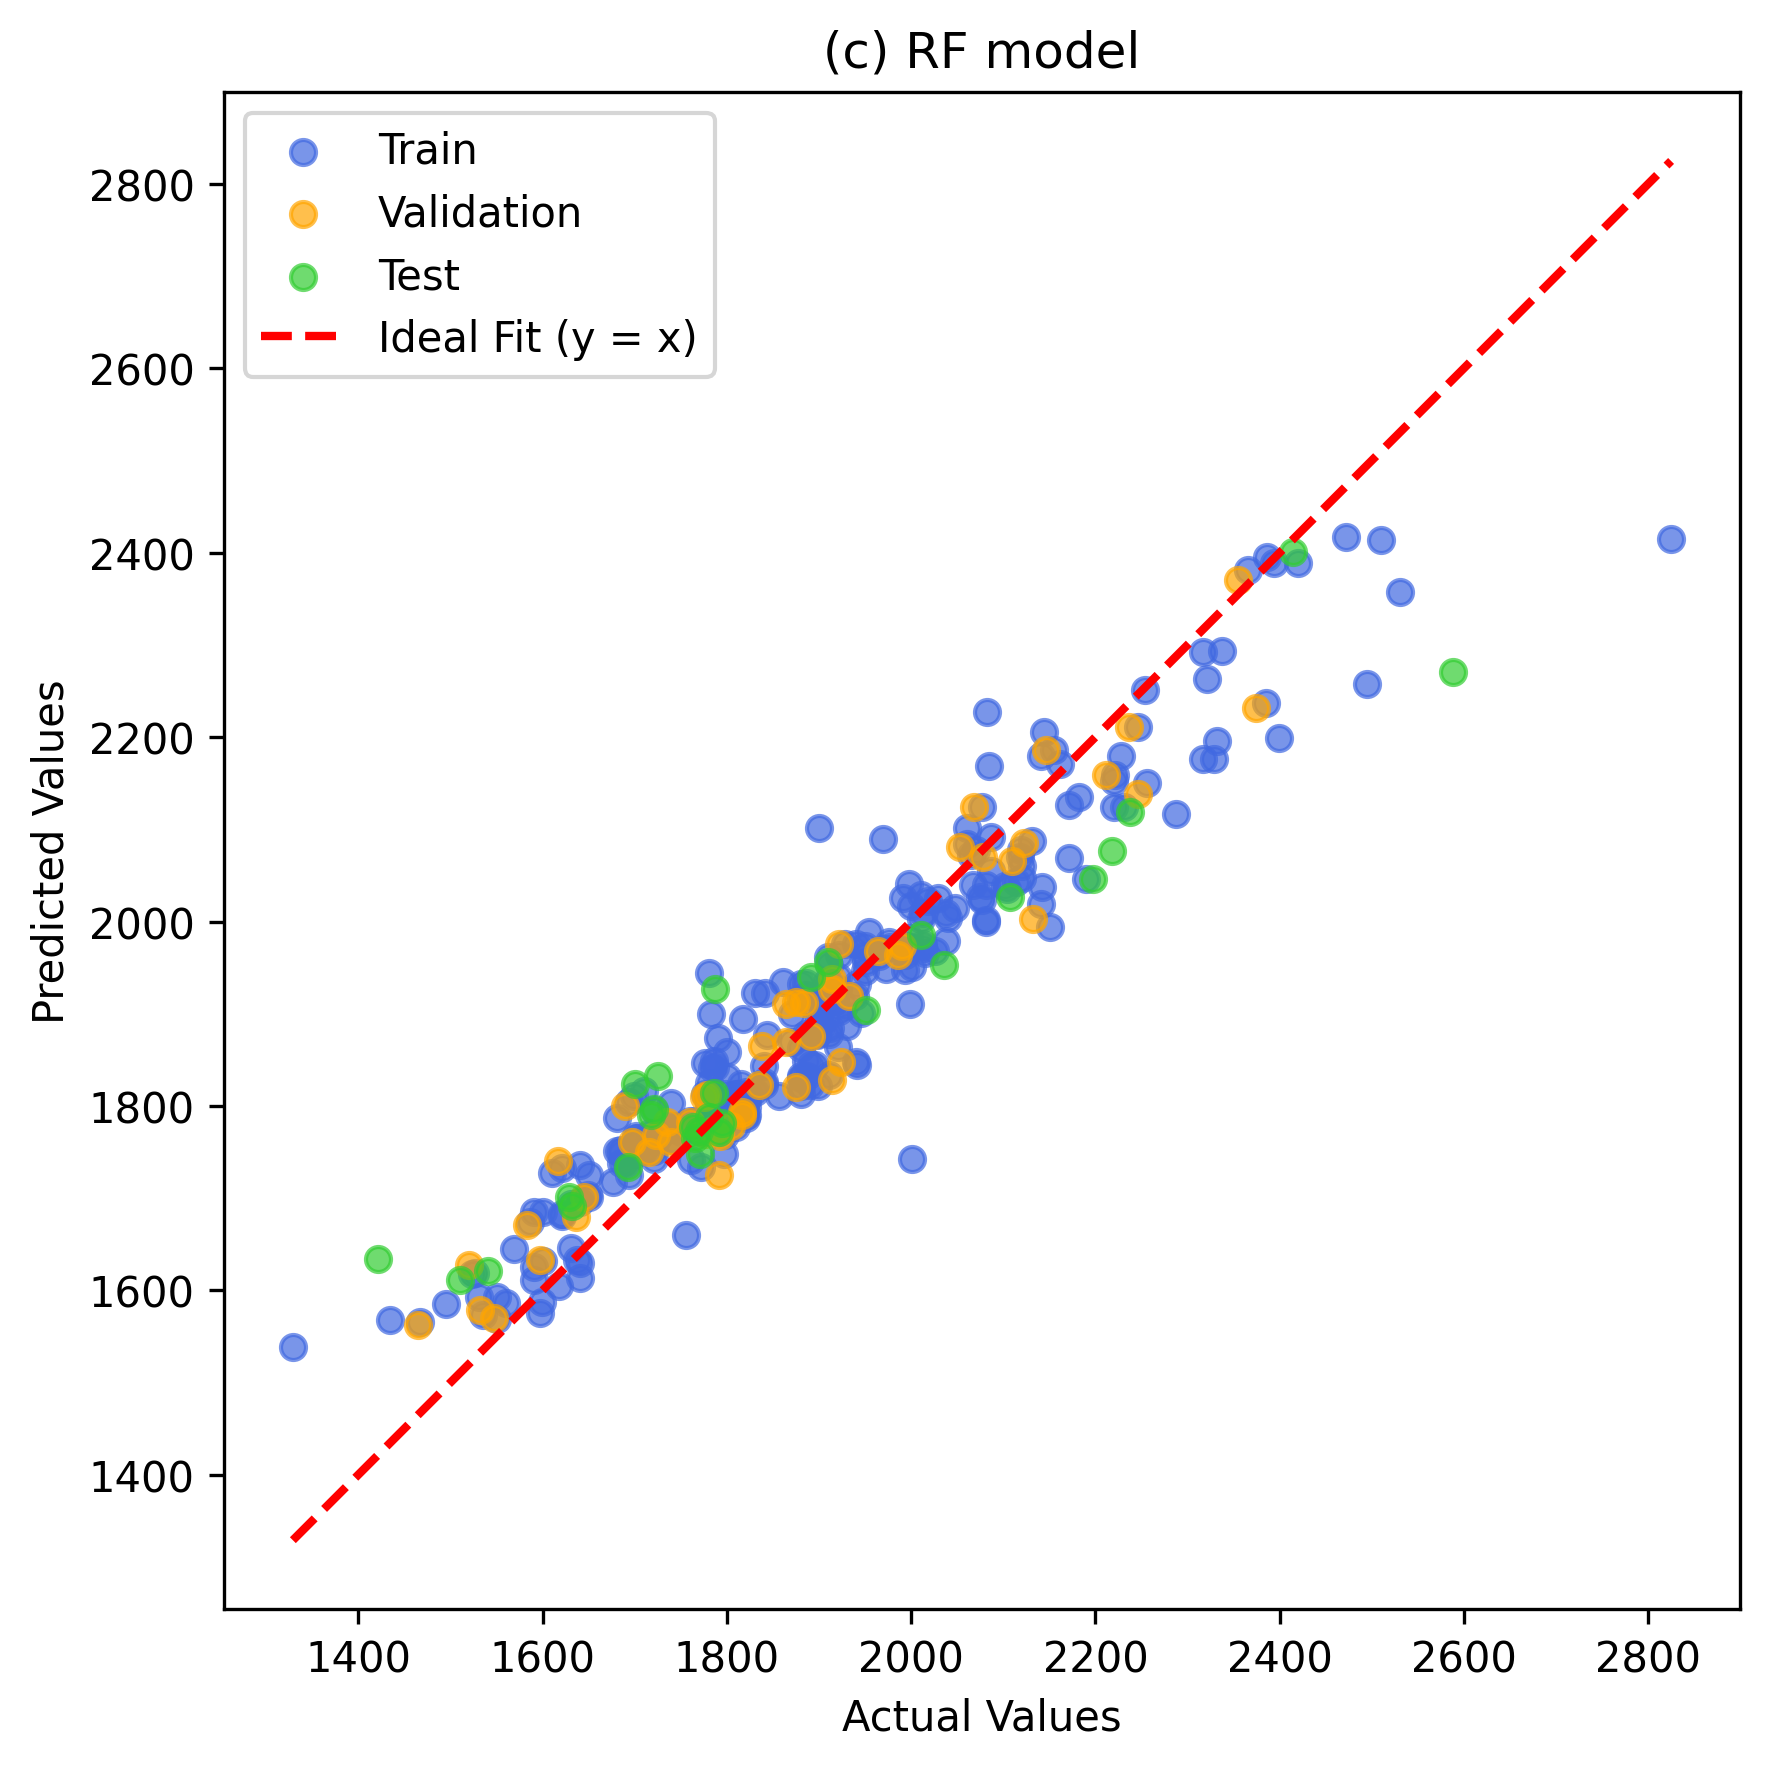

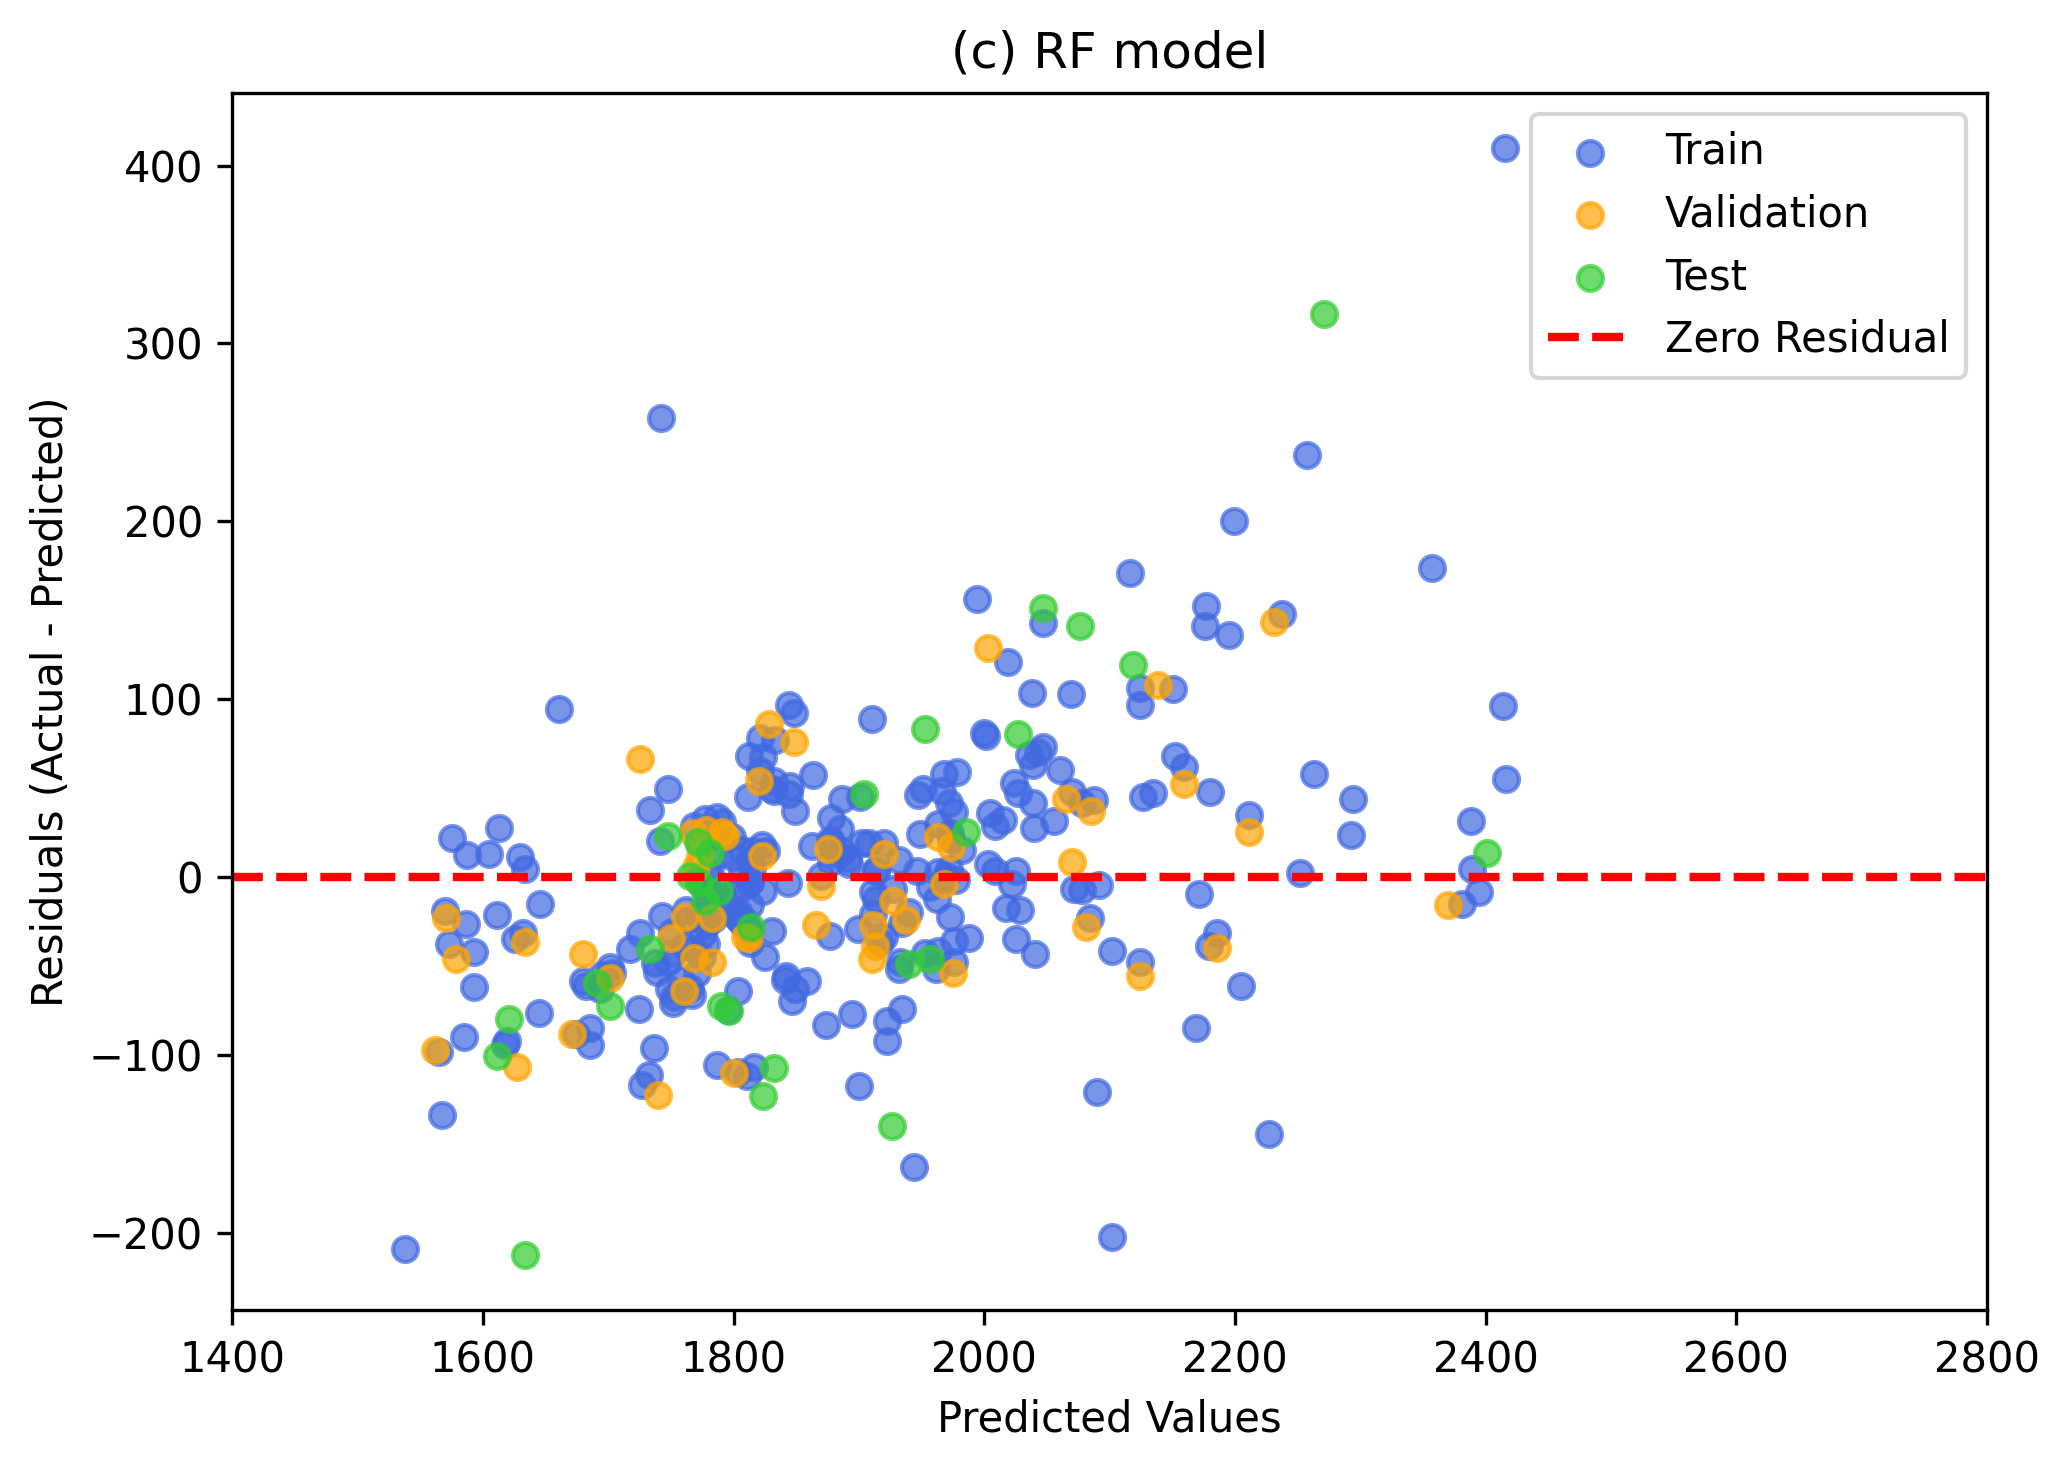

In [ ]:
# Actual vs Predicted (Train / Val / Test)

def plot_combined_predictions(y_true_train, y_pred_train,
                              y_true_val, y_pred_val,
                              y_true_test, y_pred_test):

    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    plt.figure(figsize=(6,6),dpi=300)
    plt.scatter(y_true_train, y_pred_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_true_val,   y_pred_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_true_test,  y_pred_test,  color='limegreen', alpha=0.7, label='Test')


    all_true = np.concatenate([y_true_train, y_true_val, y_true_test])
    plt.plot([all_true.min(), all_true.max()],
             [all_true.min(), all_true.max()], 'r--', lw=2, label='Ideal Fit (y = x)')

    plt.title("(c) RF model")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



# Residuals (Train / Val / Test)

def plot_combined_residuals(y_true_train, y_pred_train,
                            y_true_val, y_pred_val,
                            y_true_test, y_pred_test):
    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    residuals_train = y_true_train - y_pred_train
    residuals_val   = y_true_val   - y_pred_val
    residuals_test  = y_true_test  - y_pred_test

    plt.figure(figsize=(7,5),dpi=300)
    plt.scatter(y_pred_train, residuals_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_pred_val,   residuals_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_pred_test,  residuals_test,  color='limegreen', alpha=0.7, label='Test')
    plt.xlim(1400, 2800)
    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')
    plt.title("(c) RF model")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_combined_predictions(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

plot_combined_residuals(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

SHAP PLOT

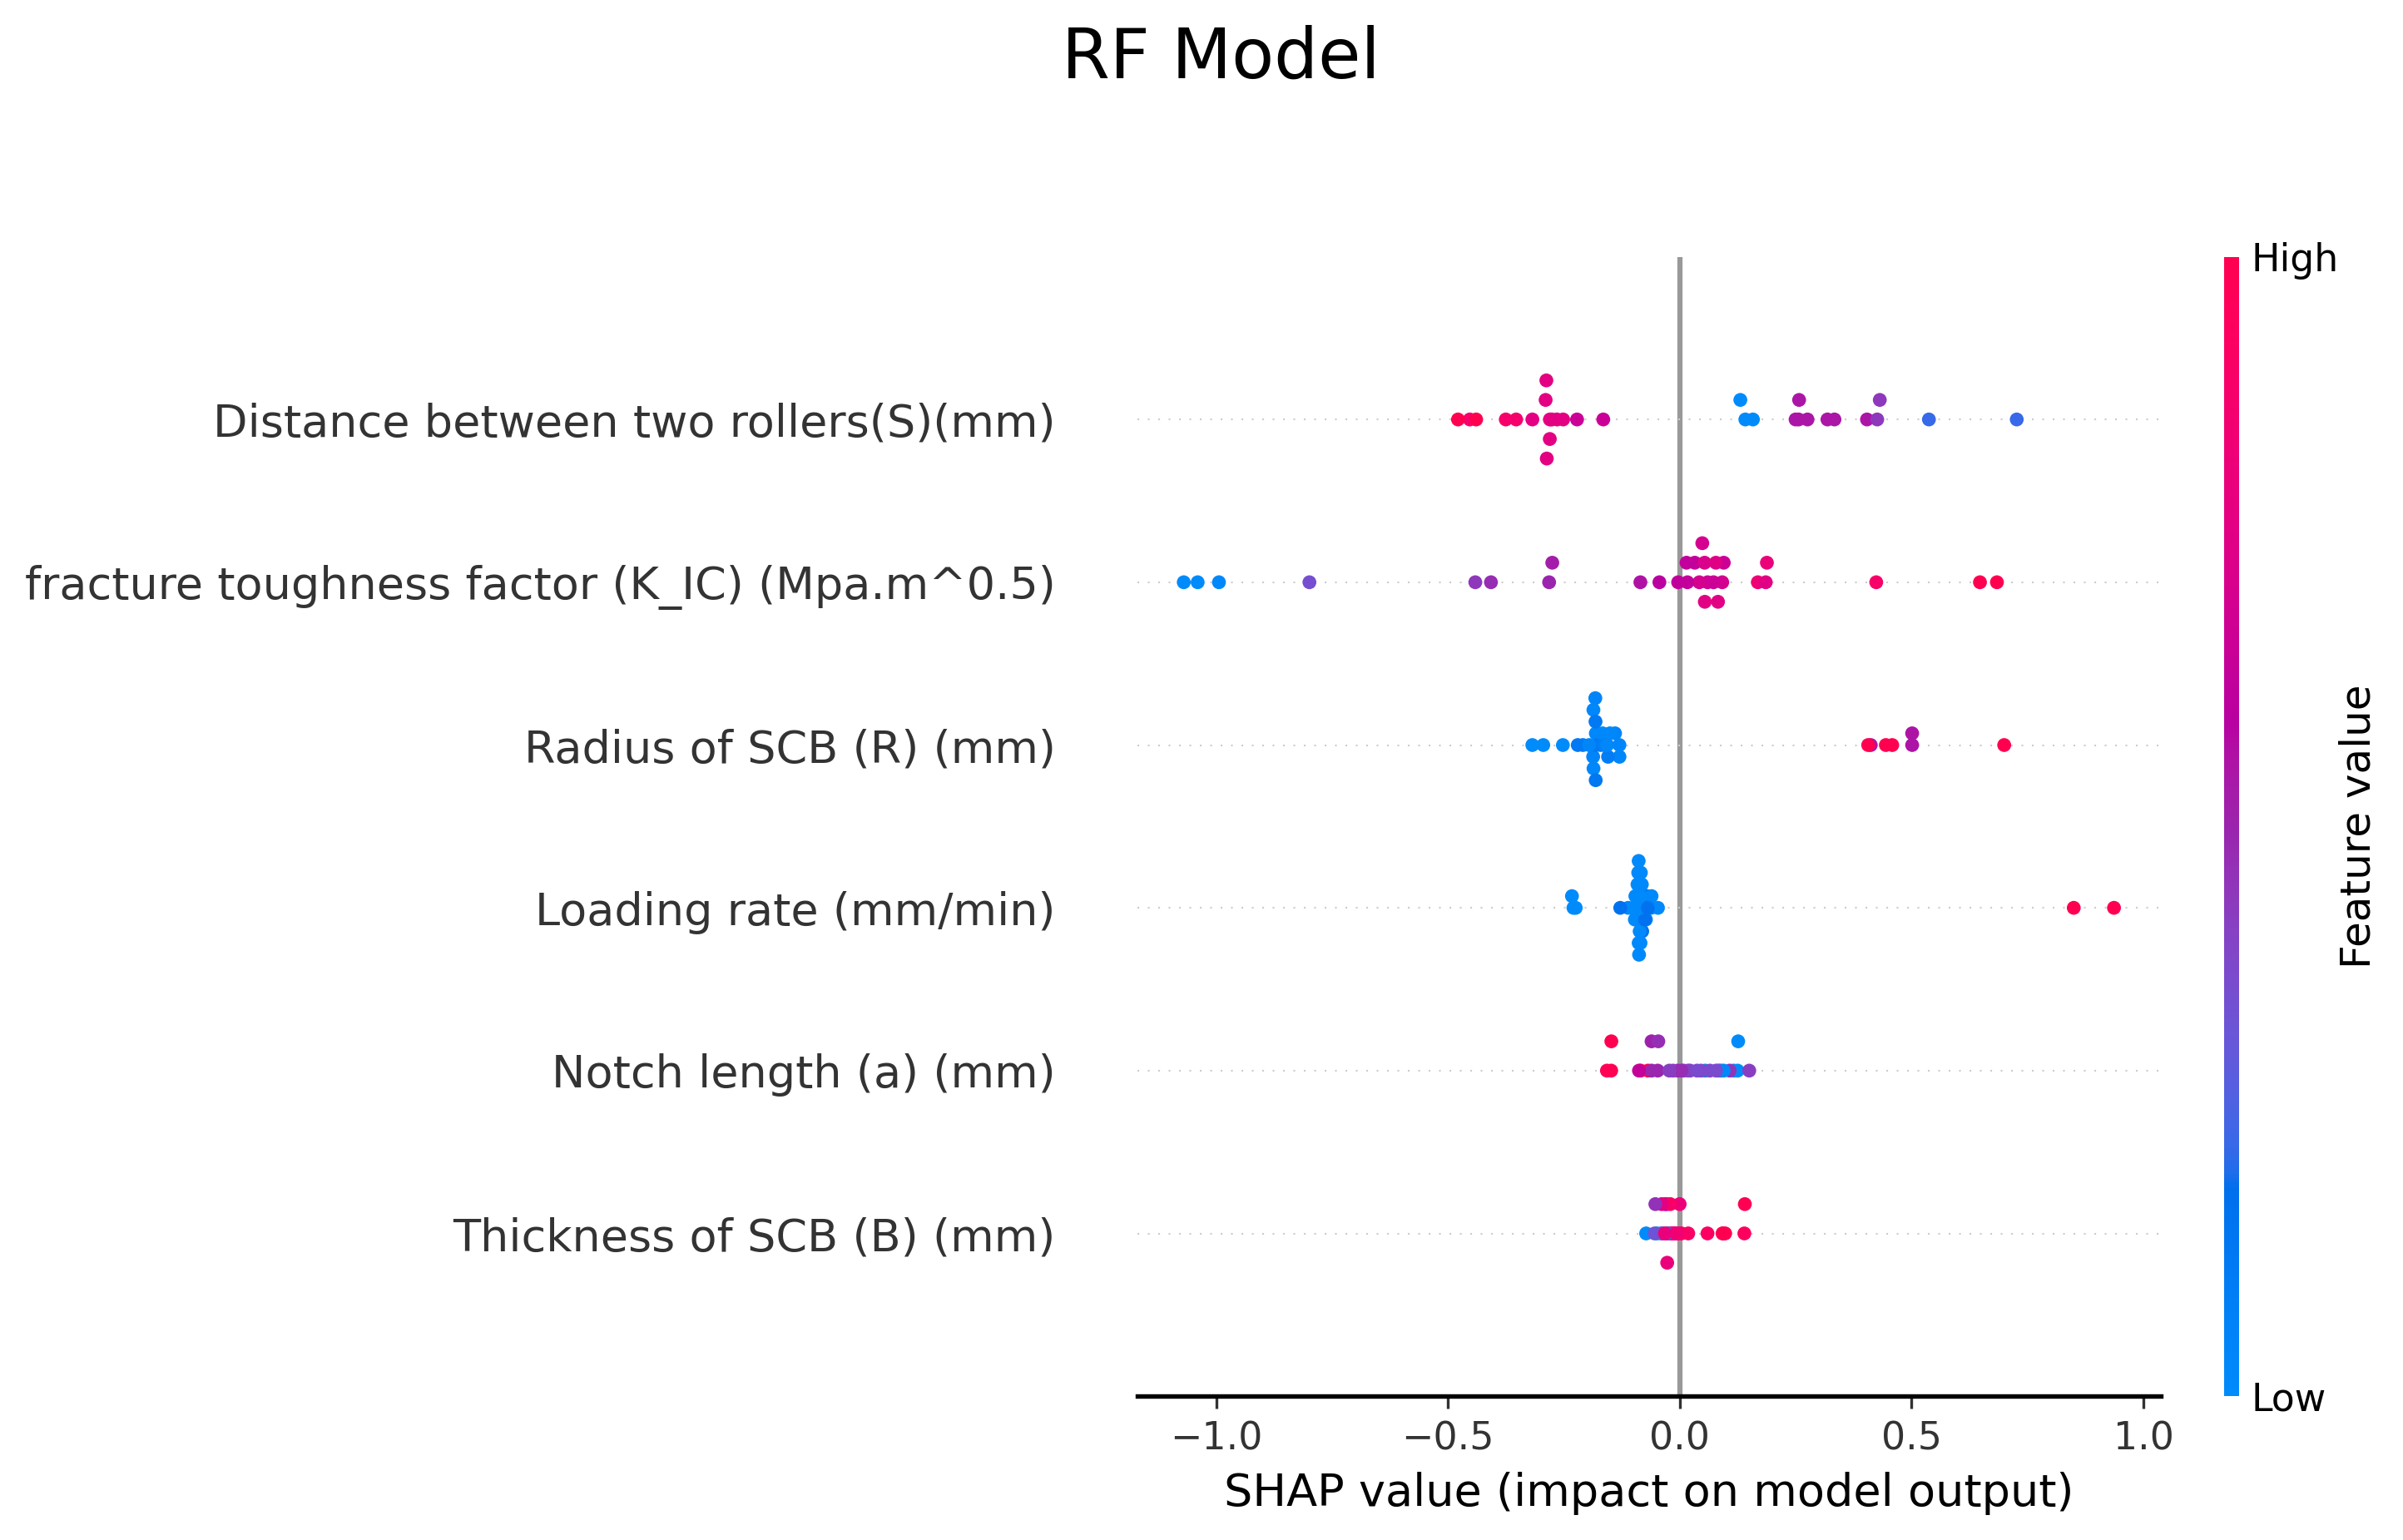

In [ ]:
import matplotlib.pyplot as plt
import shap

# ---------------- Paper Settings ----------------
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "axes.linewidth": 1.3
})

# Feature names
feature_names = df_c.drop(columns=["maximum loading pressure of SCB (Pmax) (N)"]).columns.tolist()

shap.initjs()

# SHAP explainer
explainer = shap.TreeExplainer(final_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# ---------------- SHAP PLOT ----------------
plt.figure(figsize=(12, 8))
plt.suptitle("RF Model", fontsize=20, y=1.03)

shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=feature_names,
    show=False,
    plot_size=(10, 6)
)

plt.savefig("RF_SHAP_SUMMARY.png", bbox_inches="tight")
plt.show()


XGB model

In [12]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 # 1. Network search (GridSearchCV)

# Base model
xgb = XGBRegressor()

param_grid = { 'n_estimators': [50,100,150],
               'learning_rate': [0.05, 0.1, 0.15],
               'max_depth': [3,4,5],
               'subsample':[0.8],
               'colsample_bytree':[0.4],
               'reg_alpha': [0],
               'reg_lambda': [2],
               'min_child_weight': [3],

               }


# Scale X_temp and y_temp for GridSearchCV
# For KFold cross-validation, new scalers will be fitted inside each fold.
X_scaler_grid = StandardScaler()
y_scaler_grid = StandardScaler()

X_temp_scaled_for_grid = X_scaler_grid.fit_transform(X_temp)
y_temp_scaled_for_grid = y_scaler_grid.fit_transform(y_temp)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # 5-fold cross-validation during grid search
    n_jobs=-1,
    verbose=1
)

print("Running Grid Search ...")
grid_search.fit(X_temp_scaled_for_grid, y_temp_scaled_for_grid.ravel()) # Use scaled temp data for grid search

best_params = grid_search.best_params_
print("\n Best Parameters Found:")
for k, v in best_params.items():
    print(f"   {k}: {v}")
print(f"Best CV MSE = {-grid_search.best_score_:.4f}")

# Final model with the best parameters (from grid search, not yet trained on all X_temp)
best_xgb = grid_search.best_estimator_

# 2. Cross-Validation (5-Fold) using best_rf


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {"train": [], "val": []}

print("\n Running 5-Fold Cross Validation with best RF parameters")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_temp)):
    X_tr, X_val = X_temp[train_idx], X_temp[val_idx]
    y_tr, y_val = y_temp[train_idx], y_temp[val_idx]

    # Separate normalization on each fold to prevent data leakage
    X_scaler_fold = StandardScaler()
    y_scaler_fold = StandardScaler()

    X_tr_scaled = X_scaler_fold.fit_transform(X_tr)
    y_tr_scaled = y_scaler_fold.fit_transform(y_tr)
    X_val_scaled = X_scaler_fold.transform(X_val)
    y_val_scaled = y_scaler_fold.transform(y_val)

    # Make a copy of best_svr to train on each fold,
    # otherwise, it gets continually refitted
    model_fold = XGBRegressor(**best_params) # Re-initialize with best params for each fold

    # Model training
    model_fold.fit(X_tr_scaled, y_tr_scaled.ravel())

    # Train and Val prediction
    y_tr_pred_scaled = model_fold.predict(X_tr_scaled)
    y_val_pred_scaled = model_fold.predict(X_val_scaled)

    y_tr_pred = y_scaler_fold.inverse_transform(y_tr_pred_scaled.reshape(-1, 1))
    y_val_pred = y_scaler_fold.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
    y_tr_true = y_scaler_fold.inverse_transform(y_tr_scaled)
    y_val_true = y_scaler_fold.inverse_transform(y_val_scaled)



   # Metrics
    train_r2 = r2_score(y_tr_true, y_tr_pred)
    val_r2 = r2_score(y_val_true, y_val_pred)

    print(f"   ؛ Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

    cv_results["train"].append(train_r2)
    cv_results["val"].append(val_r2)

    print(f"\n Mean Train R²: {np.mean(cv_results['train']):.4f}")
    print(f" Mean Val   R²: {np.mean(cv_results['val']):.4f}")

    print(f"   ؛ Fold {fold+1}: Train R²={train_r2:.4f}, Val R²={val_r2:.4f}")

# 3. Final training on the entire Train+Val (X_temp, y_temp) and evaluation on Test (X_test, y_test)


# Fit scalers on the entire training+validation set (X_temp, y_temp)
final_X_scaler = StandardScaler()
final_y_scaler = StandardScaler()

X_final_train_scaled = final_X_scaler.fit_transform(X_temp)
y_final_train_scaled = final_y_scaler.fit_transform(y_temp)

# Transform the test set using the scalers fitted on X_temp and y_temp
X_test_scaled = final_X_scaler.transform(X_test)
y_test_scaled = final_y_scaler.transform(y_test)

# Train the final model using best parameters on the full training+validation data
final_xgb_model = XGBRegressor(**best_params)
final_xgb_model.fit(X_final_train_scaled, y_final_train_scaled.ravel())

metrics = {}

# Evaluate on the final training set (X_temp)
y_pred_final_train_scaled = final_xgb_model.predict(X_final_train_scaled)
y_pred_final_train = final_y_scaler.inverse_transform(y_pred_final_train_scaled.reshape(-1, 1))
y_true_final_train = final_y_scaler.inverse_transform(y_final_train_scaled)

mse_final_train = mean_squared_error(y_true_final_train, y_pred_final_train)
mae_final_train = mean_absolute_error(y_true_final_train, y_pred_final_train)
rmse_final_train = np.sqrt(mse_final_train)
r2_final_train = r2_score(y_true_final_train, y_pred_final_train)
metrics["Final Train"] = (mse_final_train, mae_final_train, rmse_final_train, r2_final_train)

print(f"\n Final Train Performance (on all X_temp):")
print(f"   MSE  = {mse_final_train:.4f}")
print(f"   MAE  = {mae_final_train:.4f}")
print(f"   RMSE = {rmse_final_train:.4f}")
print(f"   R²   = {r2_final_train:.4f}")

# Evaluate on the final validation set(X_temp)
y_pred_final_validation_scaled = final_xgb_model.predict(X_val_scaled)
y_pred_final_validation = final_y_scaler.inverse_transform(y_pred_final_validation_scaled.reshape(-1, 1))
y_true_final_validation = final_y_scaler.inverse_transform(y_val_scaled)

mse_final_validation = mean_squared_error(y_true_final_validation, y_pred_final_validation)
mae_final_validation = mean_absolute_error(y_true_final_validation, y_pred_final_validation)
rmse_final_validation = np.sqrt(mse_final_validation)
r2_final_validation = r2_score(y_true_final_validation, y_pred_final_validation)
metrics["Final Validation"] = (mse_final_validation, mae_final_validation, rmse_final_validation, r2_final_validation)

print(f"\n Final Validation Performance (on all X_temp):")
print(f"   MSE  = {mse_final_validation:.4f}")
print(f"   MAE  = {mae_final_validation:.4f}")
print(f"   RMSE = {rmse_final_validation:.4f}")
print(f"   R2   = {r2_final_validation:.4f}")

# Evaluate on the test set (X_test)
y_pred_test_scaled = final_xgb_model.predict(X_test_scaled)
y_pred_test = final_y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
y_true_test = final_y_scaler.inverse_transform(y_test_scaled)

mse_test = mean_squared_error(y_true_test, y_pred_test)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true_test, y_pred_test)
metrics["Test"] = (mse_test, mae_test, rmse_test, r2_test)

print(f"\n Test Performance:")
print(f"   MSE  = {mse_test:.4f}")
print(f"   MAE  = {mae_test:.4f}")
print(f"   RMSE = {rmse_test:.4f}")
print(f"   R²   = {r2_test:.4f}")

Running Grid Search ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Best Parameters Found:
   colsample_bytree: 0.4
   learning_rate: 0.15
   max_depth: 3
   min_child_weight: 3
   n_estimators: 150
   reg_alpha: 0
   reg_lambda: 2
   subsample: 0.8
Best CV MSE = 0.0645

 Running 5-Fold Cross Validation with best RF parameters
   ؛ Fold 1: Train R²=0.9926, Val R²=0.9107

 Mean Train R²: 0.9926
 Mean Val   R²: 0.9107
   ؛ Fold 1: Train R²=0.9926, Val R²=0.9107
   ؛ Fold 2: Train R²=0.9933, Val R²=0.9109

 Mean Train R²: 0.9930
 Mean Val   R²: 0.9108
   ؛ Fold 2: Train R²=0.9933, Val R²=0.9109
   ؛ Fold 3: Train R²=0.9941, Val R²=0.9119

 Mean Train R²: 0.9933
 Mean Val   R²: 0.9112
   ؛ Fold 3: Train R²=0.9941, Val R²=0.9119
   ؛ Fold 4: Train R²=0.9930, Val R²=0.9590

 Mean Train R²: 0.9933
 Mean Val   R²: 0.9231
   ؛ Fold 4: Train R²=0.9930, Val R²=0.9590
   ؛ Fold 5: Train R²=0.9923, Val R²=0.9413

 Mean Train R²: 0.9931
 Mean Val   R²: 0.9268
   ؛ Fold 5: Train R

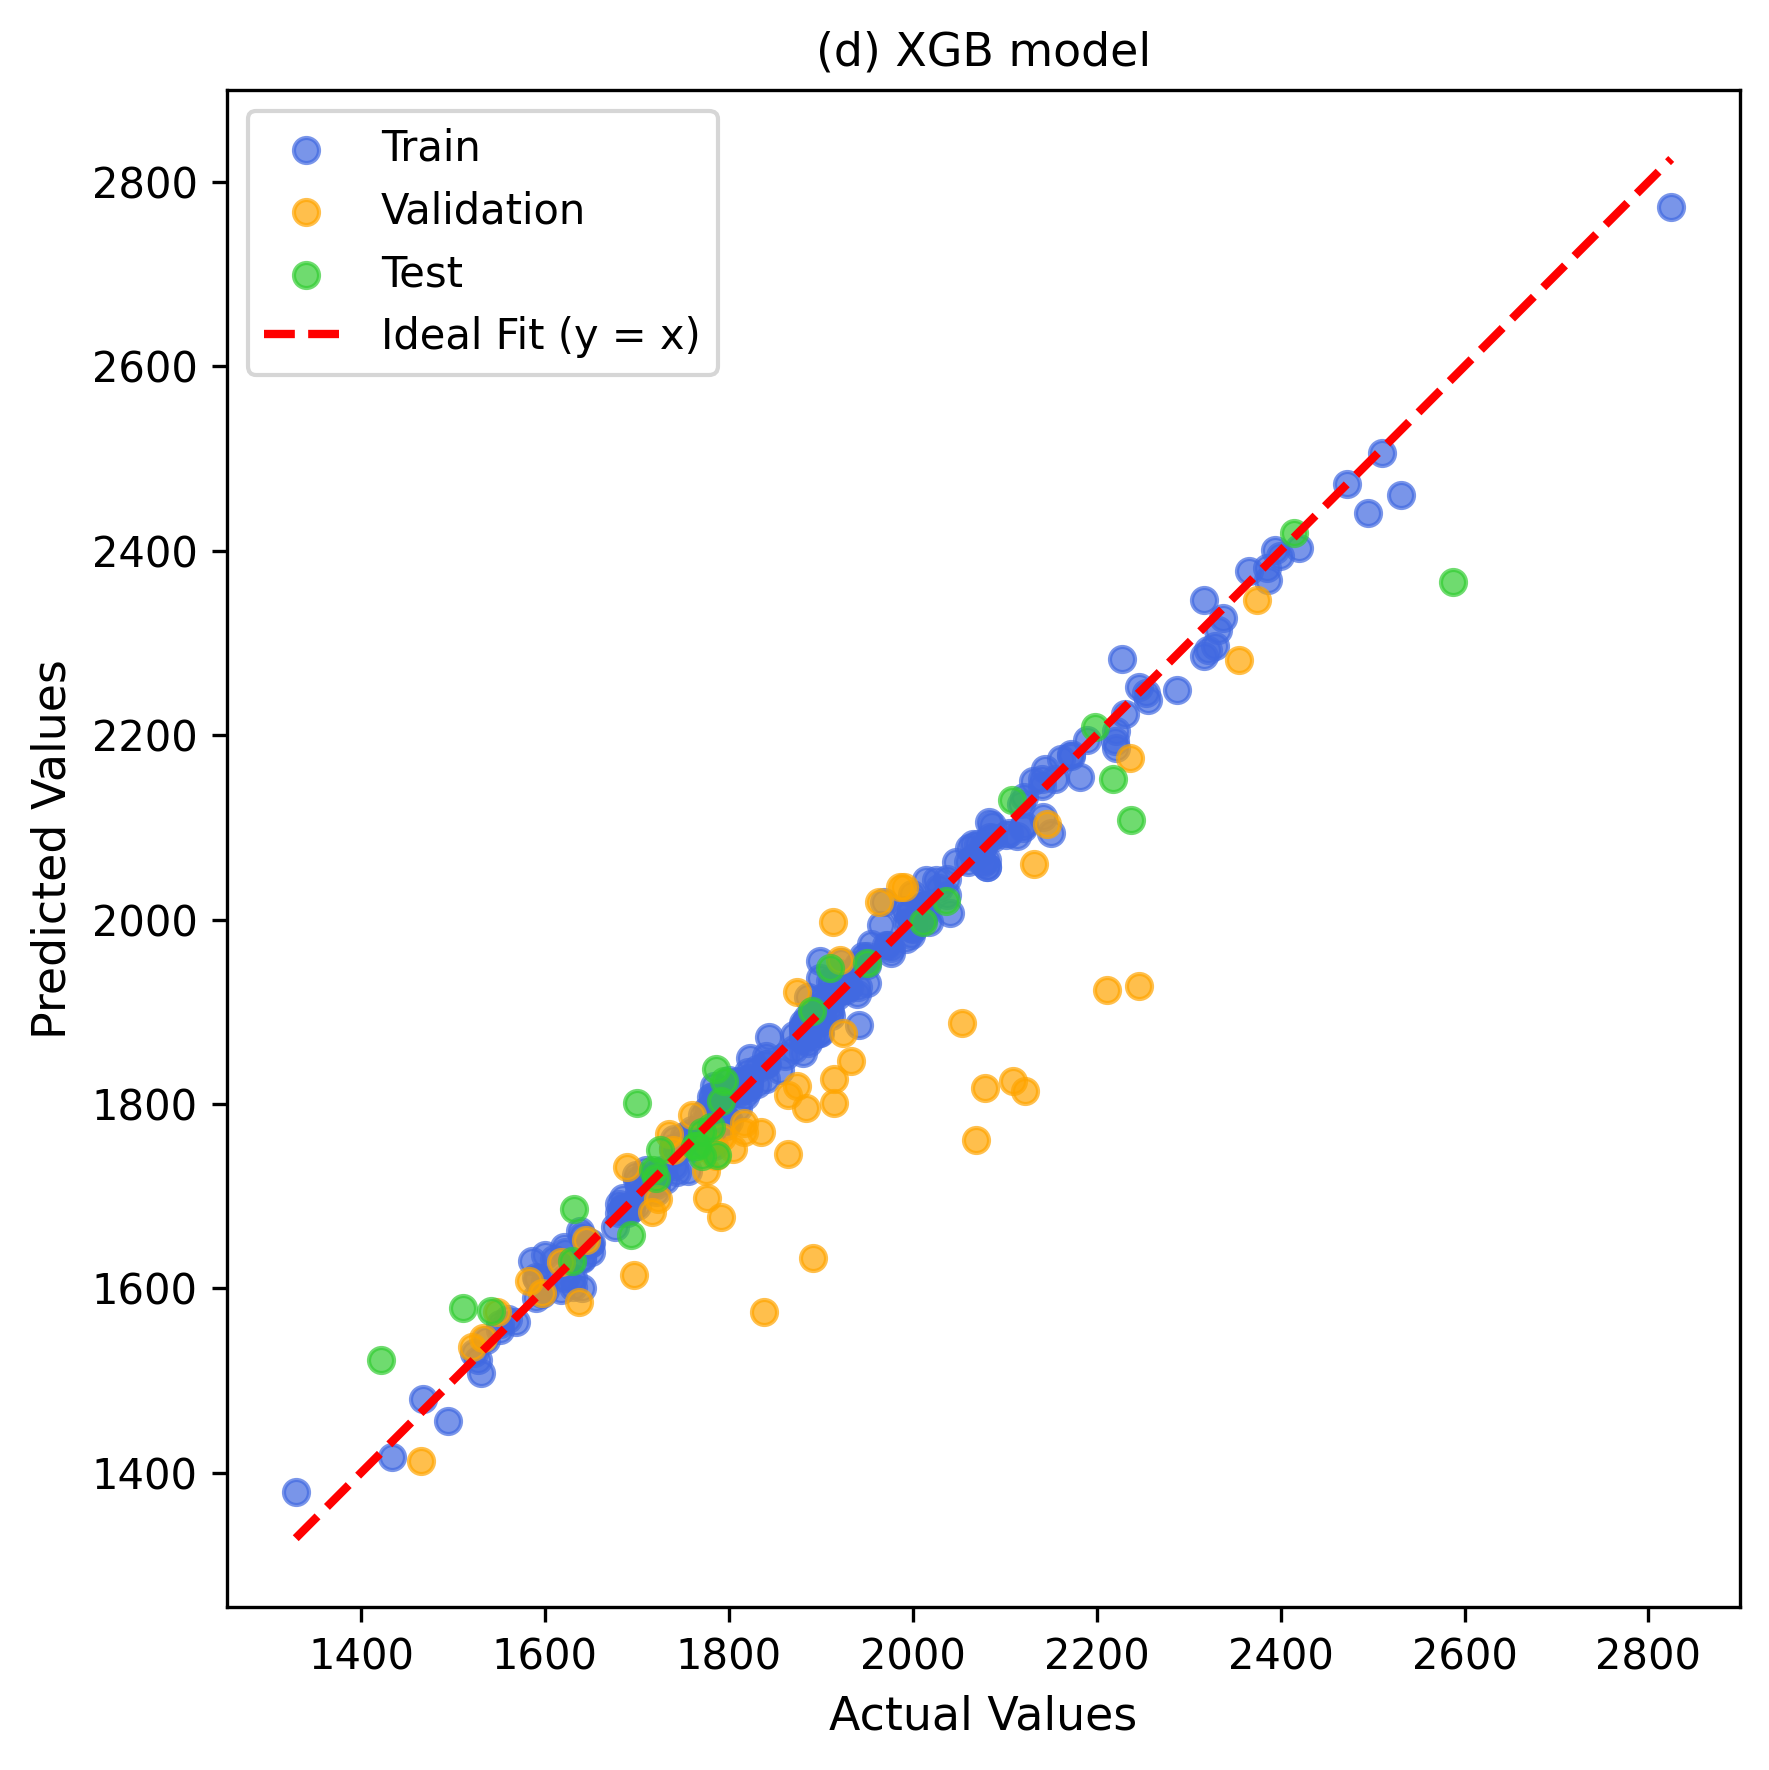

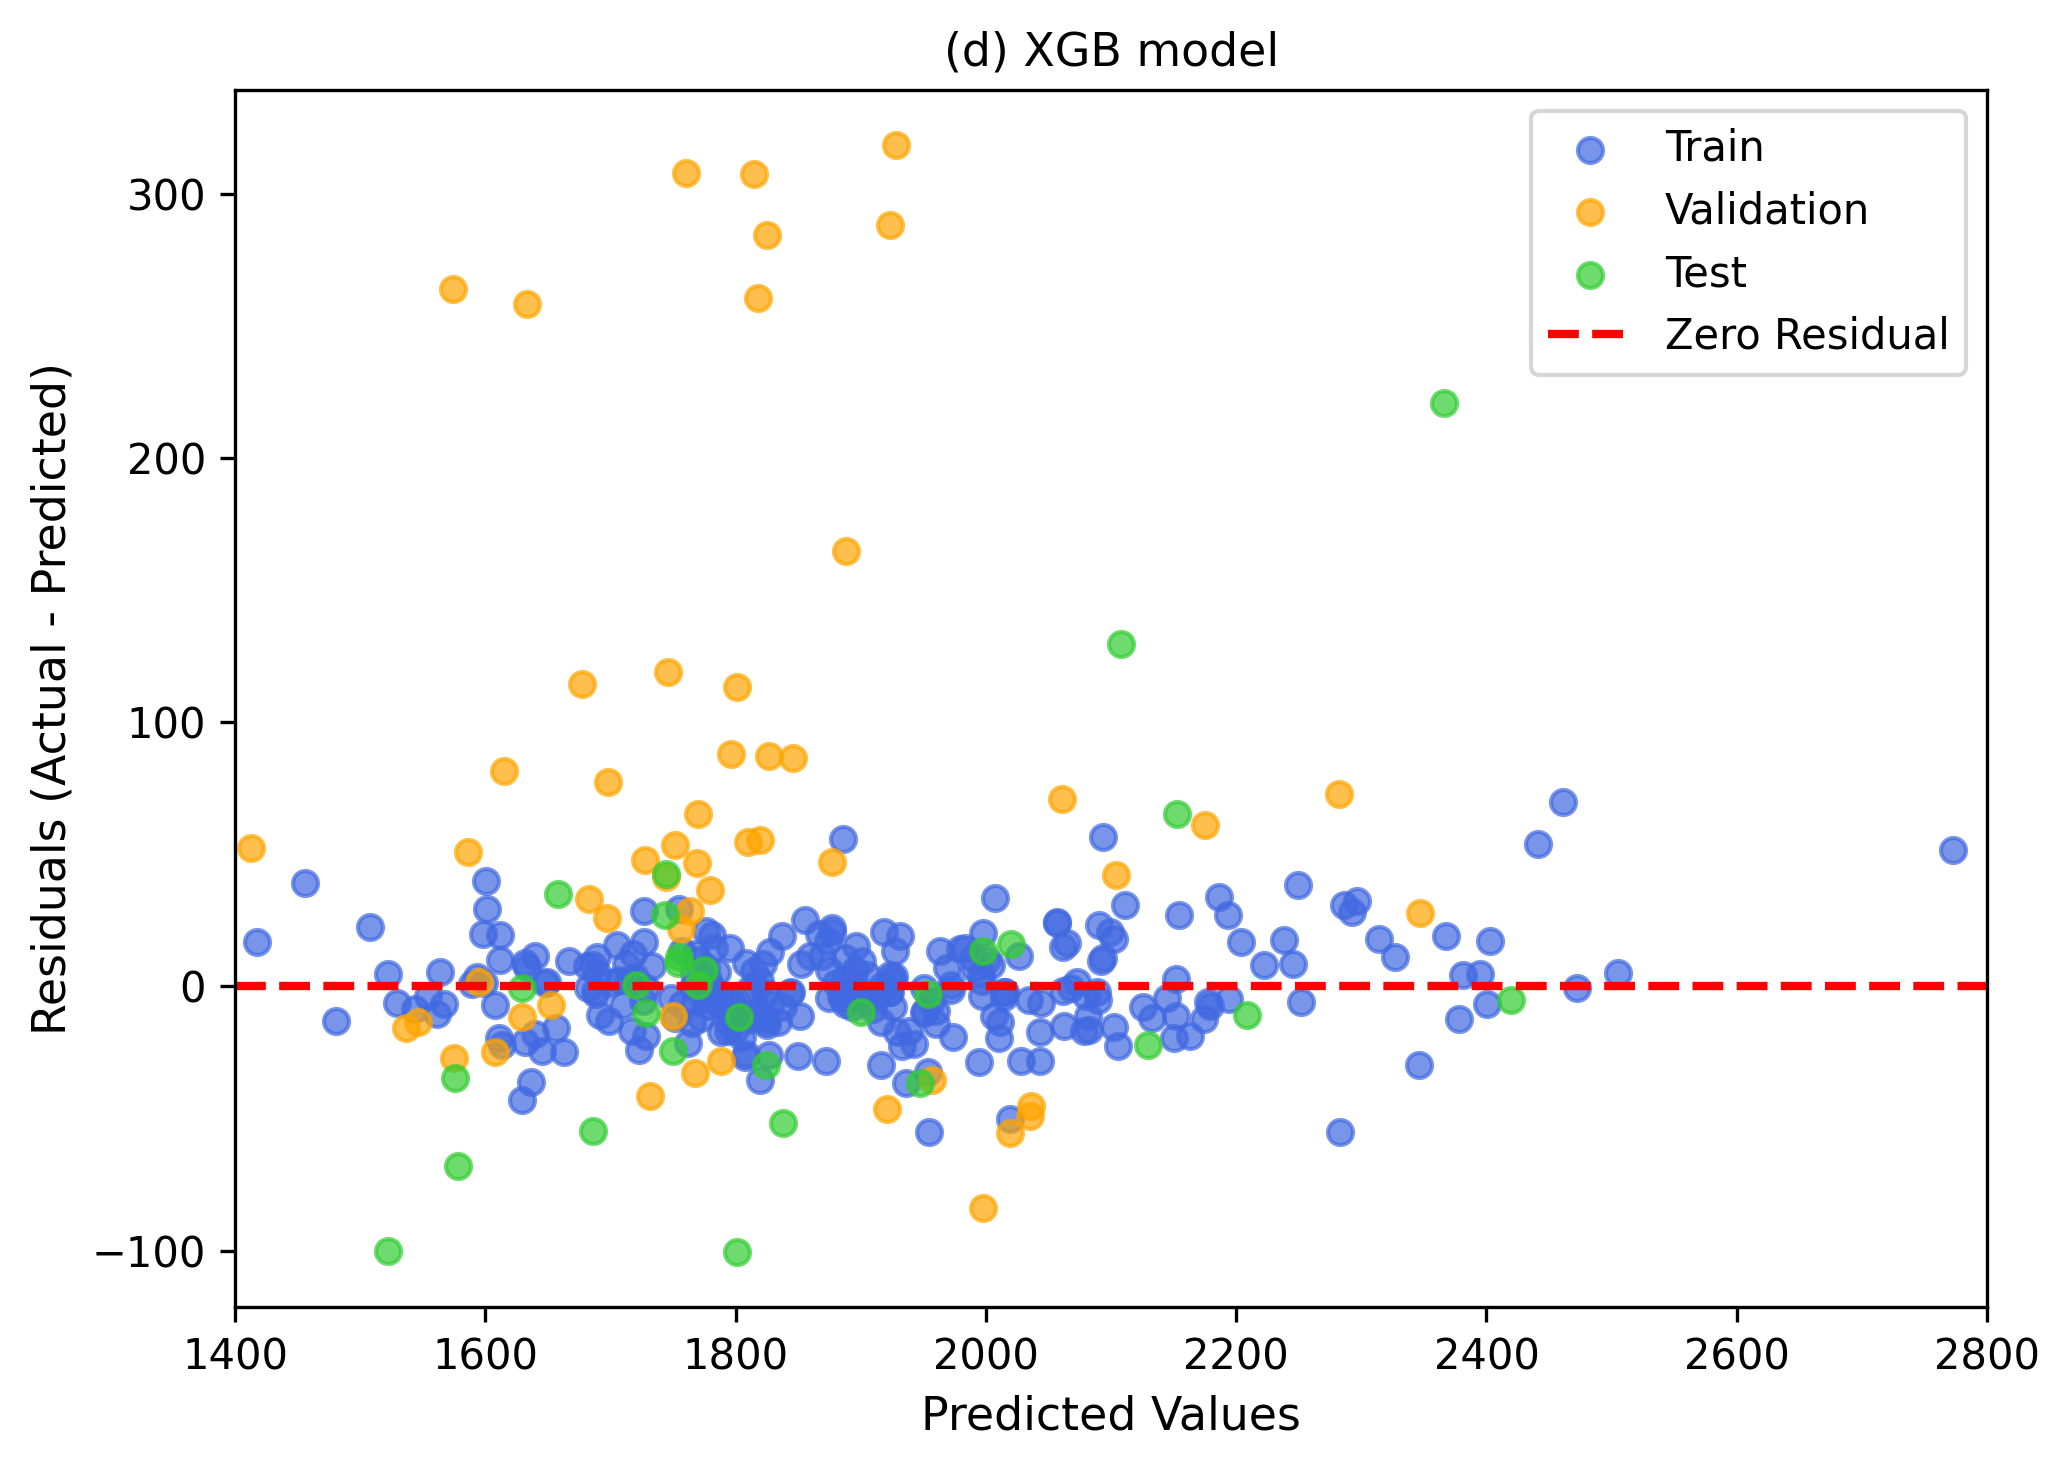

In [15]:
# Actual vs Predicted (Train / Val / Test)

def plot_combined_predictions(y_true_train, y_pred_train,
                              y_true_val, y_pred_val,
                              y_true_test, y_pred_test):

    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    plt.figure(figsize=(6,6),dpi=300)
    plt.scatter(y_true_train, y_pred_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_true_val,   y_pred_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_true_test,  y_pred_test,  color='limegreen', alpha=0.7, label='Test')


    all_true = np.concatenate([y_true_train, y_true_val, y_true_test])
    plt.plot([all_true.min(), all_true.max()],
             [all_true.min(), all_true.max()], 'r--', lw=2, label='Ideal Fit (y = x)')

    plt.title("(d) XGB model")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



# Residuals (Train / Val / Test)

def plot_combined_residuals(y_true_train, y_pred_train,
                            y_true_val, y_pred_val,
                            y_true_test, y_pred_test):
    y_true_train, y_pred_train = np.ravel(y_true_train), np.ravel(y_pred_train)
    y_true_val,   y_pred_val   = np.ravel(y_true_val),   np.ravel(y_pred_val)
    y_true_test,  y_pred_test  = np.ravel(y_true_test),  np.ravel(y_pred_test)

    residuals_train = y_true_train - y_pred_train
    residuals_val   = y_true_val   - y_pred_val
    residuals_test  = y_true_test  - y_pred_test

    plt.figure(figsize=(7,5),dpi=300)
    plt.scatter(y_pred_train, residuals_train, color='royalblue', alpha=0.7, label='Train')
    plt.scatter(y_pred_val,   residuals_val,   color='orange', alpha=0.7, label='Validation')
    plt.scatter(y_pred_test,  residuals_test,  color='limegreen', alpha=0.7, label='Test')
    plt.xlim(1400, 2800)
    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')
    plt.title("(d) XGB model")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_combined_predictions(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

plot_combined_residuals(
    y_true_final_train, y_pred_final_train,
    y_true_final_validation, y_pred_final_validation,
    y_true_test, y_pred_test
)

SHAP PLOT

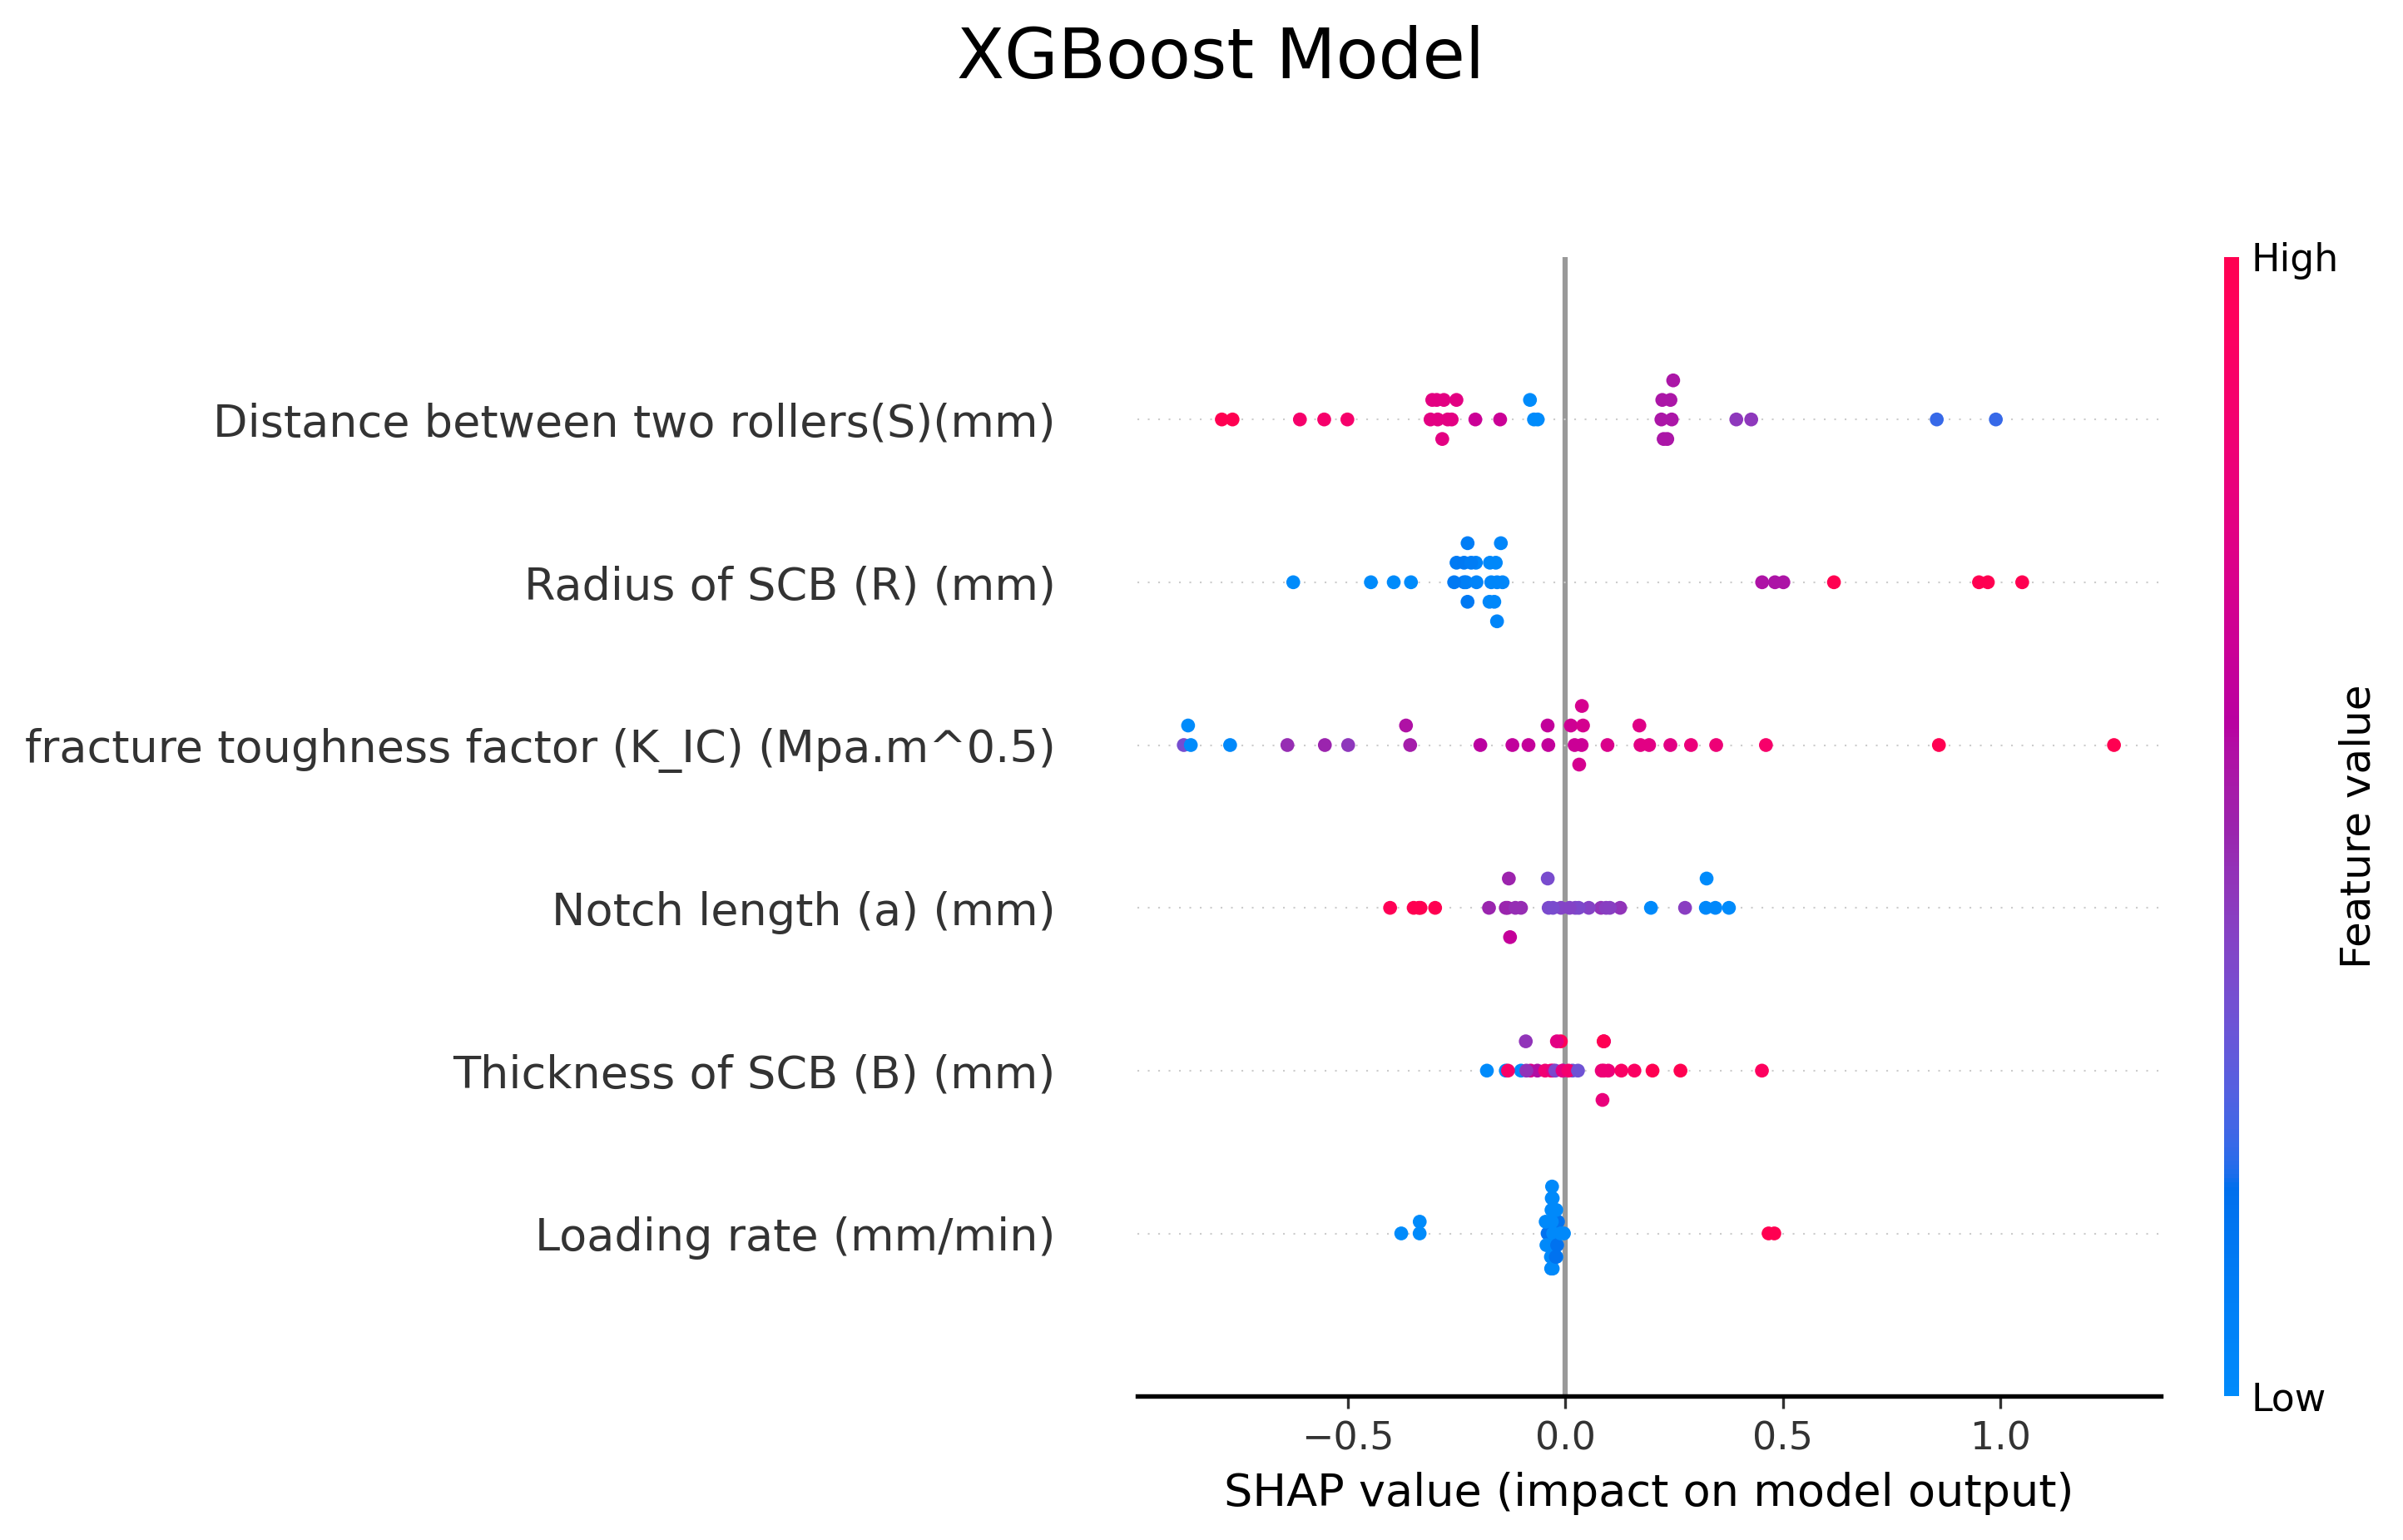

In [17]:
import matplotlib.pyplot as plt
import shap

# ---------------- Paper Settings ----------------
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "axes.linewidth": 1.3
})


# Feature names - Moved here to ensure it's defined
feature_names = df_c.drop(columns=["maximum loading pressure of SCB (Pmax) (N)"]).columns.tolist()

shap.initjs()

# SHAP explainer for XGBoost model
explainer_xgb = shap.TreeExplainer(final_xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

# ---------------- SHAP PLOT ----------------
plt.figure(figsize=(12, 8))
plt.suptitle("XGBoost Model", fontsize=20, y=1.03) # Common title

shap.summary_plot(
    shap_values_xgb,
    X_test_scaled,
    feature_names=feature_names,
    show=False,
    plot_size=(10, 6)
)

plt.savefig("XGB_SHAP_SUMMARY.png", bbox_inches="tight")
plt.show()

MLP model

 Running Grid Search with 5-Fold CV
   layers=[5], lr=0.001, alpha=1e-05 → RMSE=119.703
   layers=[5], lr=0.001, alpha=0.0001 → RMSE=151.253
   layers=[5], lr=0.01, alpha=1e-05 → RMSE=33.172
   layers=[5], lr=0.01, alpha=0.0001 → RMSE=32.220
   layers=[10], lr=0.001, alpha=1e-05 → RMSE=87.267
   layers=[10], lr=0.001, alpha=0.0001 → RMSE=68.062
   layers=[10], lr=0.01, alpha=1e-05 → RMSE=19.815
   layers=[10], lr=0.01, alpha=0.0001 → RMSE=19.826
   layers=[10, 5], lr=0.001, alpha=1e-05 → RMSE=72.564
   layers=[10, 5], lr=0.001, alpha=0.0001 → RMSE=68.464
   layers=[10, 5], lr=0.01, alpha=1e-05 → RMSE=21.636
   layers=[10, 5], lr=0.01, alpha=0.0001 → RMSE=18.722
   layers=[5, 5], lr=0.001, alpha=1e-05 → RMSE=80.526
   layers=[5, 5], lr=0.001, alpha=0.0001 → RMSE=102.336
   layers=[5, 5], lr=0.01, alpha=1e-05 → RMSE=26.145
   layers=[5, 5], lr=0.01, alpha=0.0001 → RMSE=23.656
   layers=[5, 10], lr=0.001, alpha=1e-05 → RMSE=70.623
   layers=[5, 10], lr=0.001, alpha=0.0001 → RMSE=87.413
  

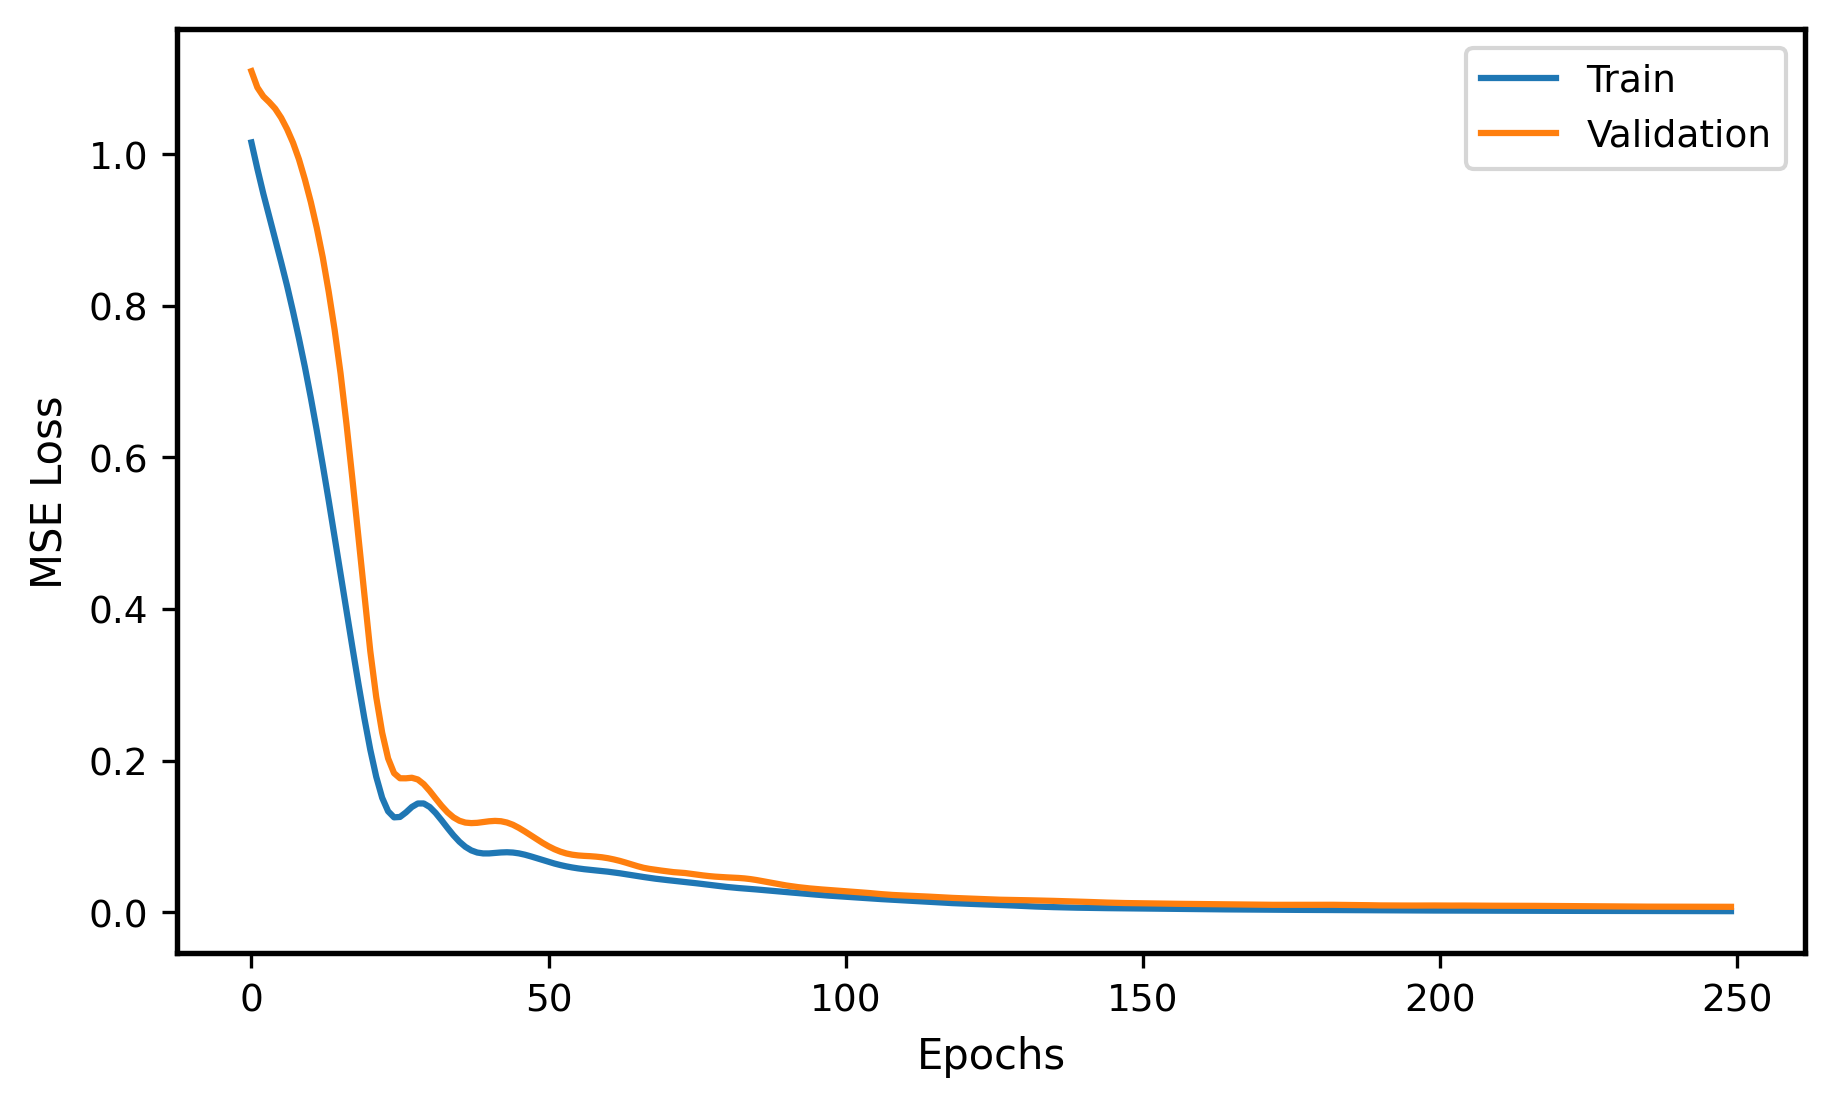

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# 1 Fix Random Seeds

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# 2 MLP Model

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_layers, activation):
        super().__init__()
        layers = []
        prev_dim = input_dim
        act_fn = nn.ReLU() if activation == 'relu' else nn.Tanh()
        for h in hidden_layers:
            layers.append(nn.Linear(prev_dim, h))
            layers.append(act_fn)
            prev_dim = h
        layers.append(nn.Linear(prev_dim, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# 3 GRID SEARCH HYPERPARAMETERS

hidden_layer_options = [
    [5],
    [10],
    [10, 5],
    [5,5],
    [5,10],
    [10,10]
]

lr_options = [0.001, 0.01]
alpha_options = [1e-5, 1e-4]

epochs = 250
activation = "relu"

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_val_rmse = float("inf")
best_config = None


# 4 GRID SEARCH WITH K-FOLD

print(" Running Grid Search with 5-Fold CV")

for hidden_layers in hidden_layer_options:
    for lr in lr_options:
        for alpha in alpha_options:

            fold_rmses = []

            for train_idx, val_idx in kf.split(X):


                X_train = X[train_idx]
                y_train = y[train_idx]
                X_val = X[val_idx]
                y_val = y[val_idx]

                X_scaler = StandardScaler().fit(X_train)
                y_scaler = StandardScaler().fit(y_train)

                X_train_s = X_scaler.transform(X_train)
                X_val_s = X_scaler.transform(X_val)
                y_train_s = y_scaler.transform(y_train)
                y_val_s = y_scaler.transform(y_val)


                # Convert to tensors
                X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
                y_train_t = torch.tensor(y_train_s, dtype=torch.float32)
                X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
                y_val_t = torch.tensor(y_val_s, dtype=torch.float32)

                # Build model
                model = MLP(X.shape[1], hidden_layers, activation)
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=alpha)
                criterion = nn.MSELoss()

                # Train
                for epoch in range(epochs):
                    model.train()
                    optimizer.zero_grad()
                    pred = model(X_train_t)
                    loss = criterion(pred, y_train_t)
                    loss.backward()
                    optimizer.step()

                # Validation prediction
                model.eval()
                with torch.no_grad():
                    pred_val = model(X_val_t).numpy()
                pred_val_real = y_scaler.inverse_transform(pred_val)
                y_val_real = y_scaler.inverse_transform(y_val_s)

                rmse = mean_squared_error(y_val_real, pred_val_real) ** 0.5
                fold_rmses.append(rmse)

            mean_rmse = np.mean(fold_rmses)

            print(f"   layers={hidden_layers}, lr={lr}, alpha={alpha} → RMSE={mean_rmse:.3f}")

            if mean_rmse < best_val_rmse:
                best_val_rmse = mean_rmse
                best_config = (hidden_layers, lr, alpha)

print("\n Best Config Found:")
print(f"   Hidden Layers = {best_config[0]}")
print(f"   LR            = {best_config[1]}")
print(f"   Alpha         = {best_config[2]}")
print(f"   RMSE          = {best_val_rmse:.3f}")



# 5 FINAL TRAIN / VAL / TEST SPLIT

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42)

# Fit scaler ONLY on train
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_s = X_scaler.transform(X_train)
X_val_s = X_scaler.transform(X_val)
X_test_s = X_scaler.transform(X_test)

y_train_s = y_scaler.transform(y_train)
y_val_s = y_scaler.transform(y_val)
y_test_s = y_scaler.transform(y_test)

# Convert
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train_s, dtype=torch.float32)
X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
y_val_t = torch.tensor(y_val_s, dtype=torch.float32)
X_test_t = torch.tensor(X_test_s, dtype=torch.float32)
y_test_t = torch.tensor(y_test_s, dtype=torch.float32)


# 6 Final Model Training

hidden_layers, best_lr, best_alpha = best_config

model = MLP(X_train_t.shape[1], hidden_layers, activation)
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_alpha)
criterion = nn.MSELoss()

train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        pred_val = model(X_val_t)
        val_losses.append(criterion(pred_val, y_val_t).item())



# 7 Evaluation

def evaluate(real, pred, name):
    mse = mean_squared_error(real, pred)
    mae = mean_absolute_error(real, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(real, pred)
    print(f"\n {name}:")
    print(f"MSE={mse:.4f}, MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

model.eval()
with torch.no_grad():
    y_pred_train = y_scaler.inverse_transform(model(X_train_t).numpy())
    y_pred_val = y_scaler.inverse_transform(model(X_val_t).numpy())
    y_pred_test = y_scaler.inverse_transform(model(X_test_t).numpy())

y_train_real = y_scaler.inverse_transform(y_train_s)
y_val_real = y_scaler.inverse_transform(y_val_s)
y_test_real = y_scaler.inverse_transform(y_test_s)

evaluate(y_train_real, y_pred_train, "Train")
evaluate(y_val_real, y_pred_val, "Val")
evaluate(y_test_real, y_pred_test, "Test")


# 8 Learning Curves
plt.figure(figsize=(7,4))
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("MSE Loss", fontsize=10)
plt.legend(fontsize=9)
plt.tick_params(axis='both', labelsize=9)
plt.grid(False)
plt.show()

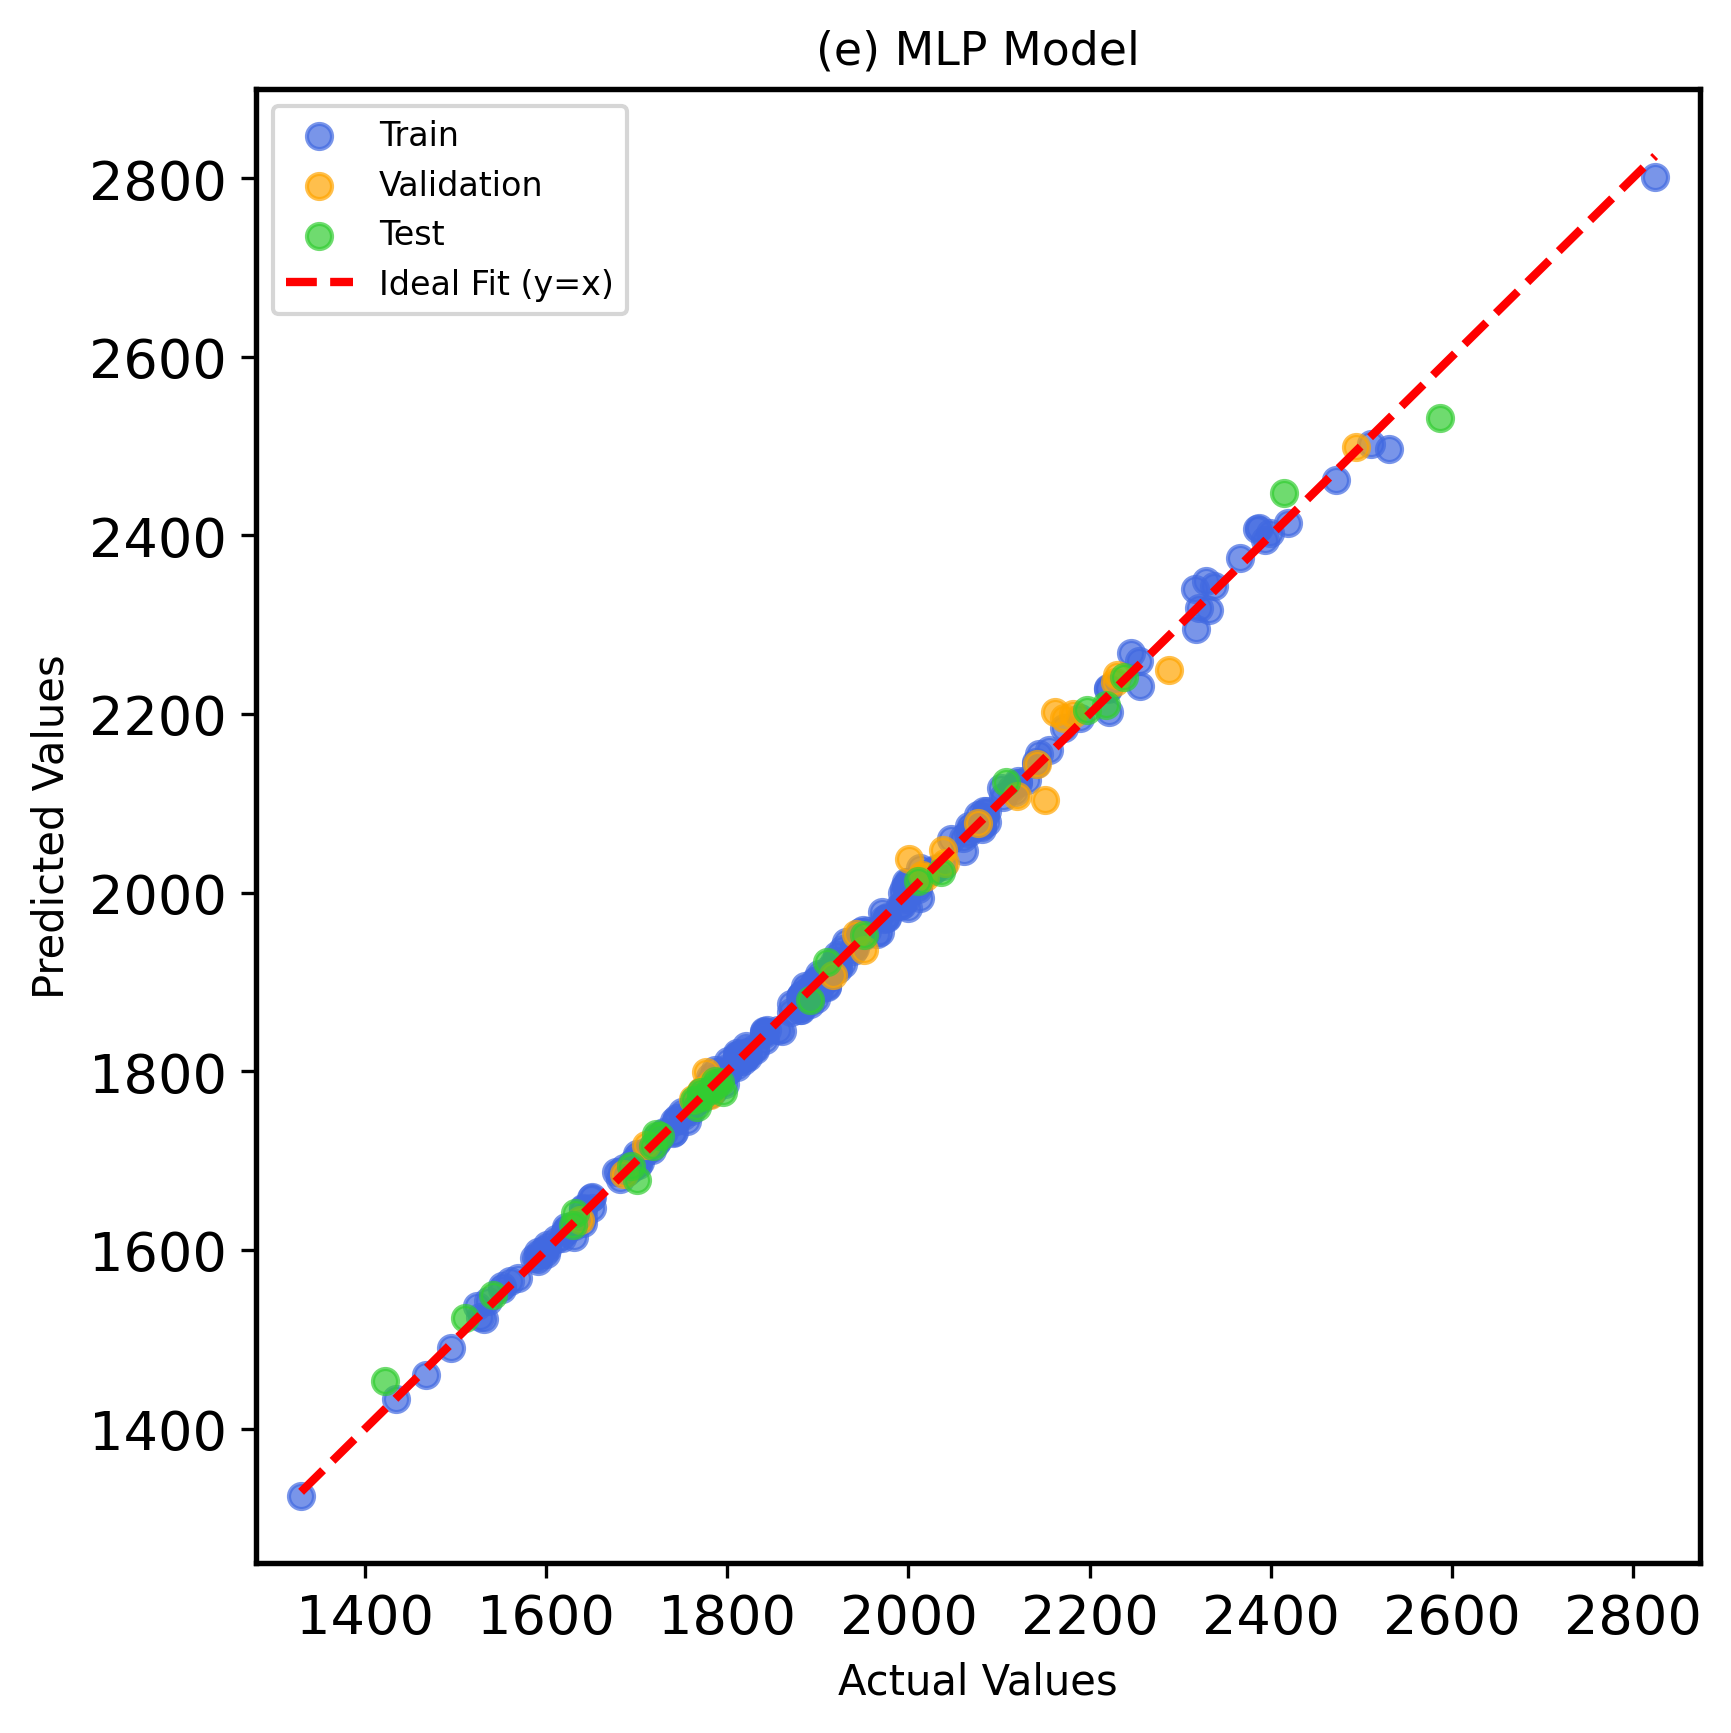

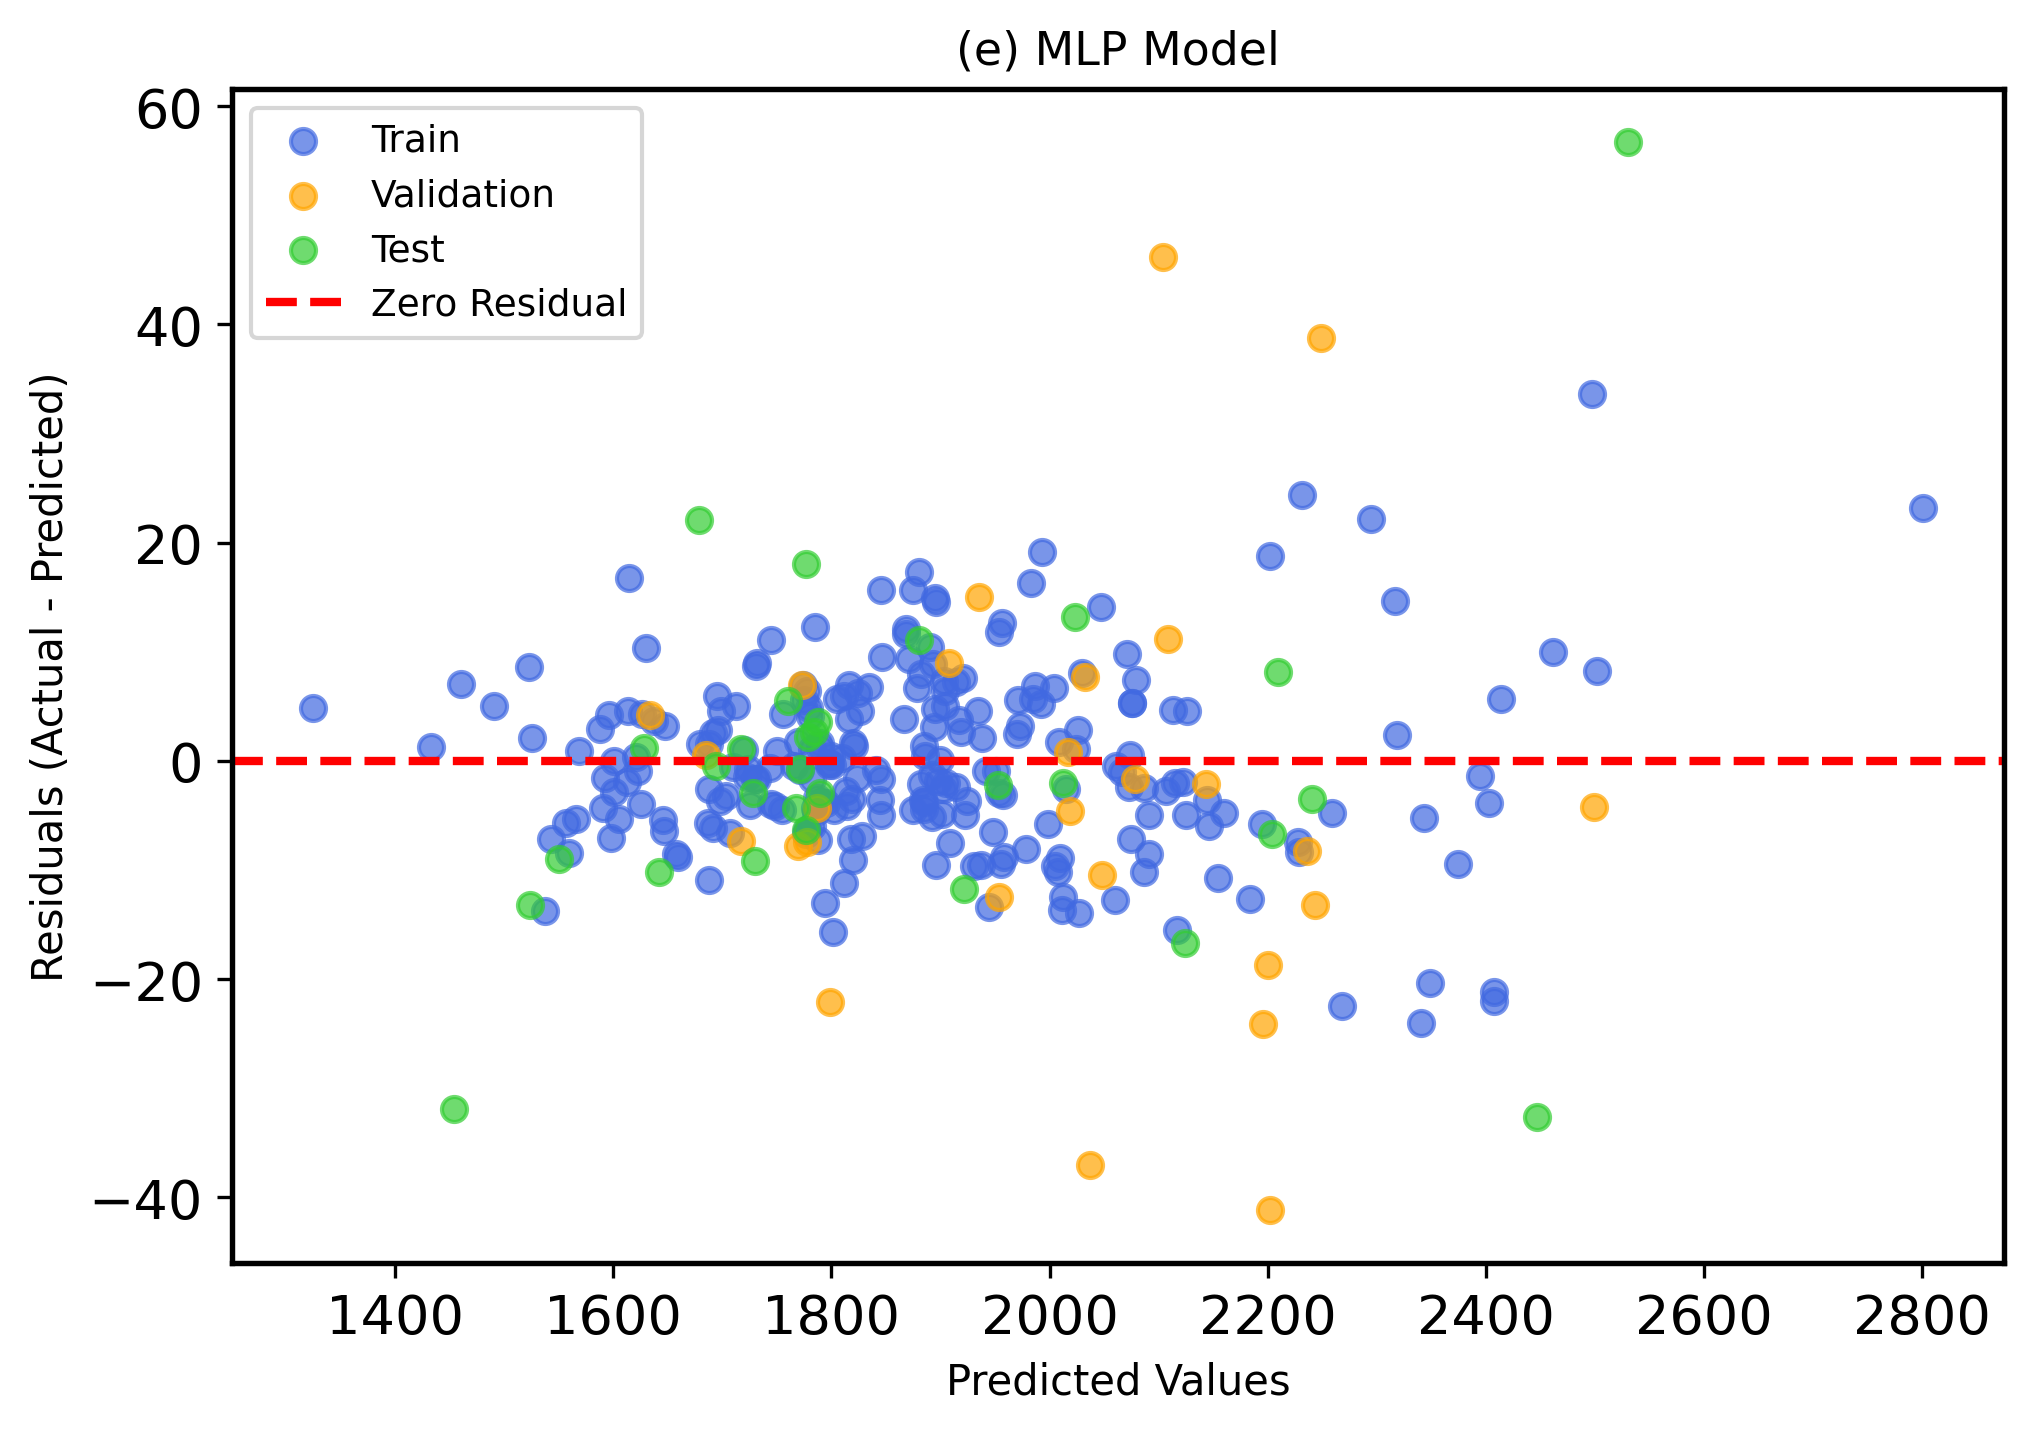

In [ ]:
def plot_mlp_predictions(y_train_real, y_pred_train,
                         y_val_real, y_pred_val,
                         y_test_real, y_pred_test):

    y_train_real = np.ravel(y_train_real)
    y_pred_train = np.ravel(y_pred_train)
    y_val_real   = np.ravel(y_val_real)
    y_pred_val   = np.ravel(y_pred_val)
    y_test_real  = np.ravel(y_test_real)
    y_pred_test  = np.ravel(y_pred_test)

    plt.figure(figsize=(6,6), dpi=300)

    plt.scatter(y_train_real, y_pred_train, color='royalblue', alpha=0.7, label="Train")
    plt.scatter(y_val_real,   y_pred_val,   color='orange', alpha=0.7, label="Validation")
    plt.scatter(y_test_real,  y_pred_test,  color='limegreen', alpha=0.7, label="Test")
    all_true = np.concatenate([y_train_real, y_val_real, y_test_real])
    plt.plot([all_true.min(), all_true.max()],
             [all_true.min(), all_true.max()],
             "r--", lw=2, label="Ideal Fit (y=x)")
    padding = 50
    plt.xlim(all_true.min() - padding, all_true.max() + padding)

    plt.xlabel("Actual Values", fontsize=10)
    plt.ylabel("Predicted Values", fontsize=10)
    plt.title("(e) MLP Model", fontsize=11)
    plt.legend(fontsize=8, loc='upper left')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


def plot_mlp_residuals(y_train_real, y_pred_train,
                       y_val_real, y_pred_val,
                       y_test_real, y_pred_test):

    y_train_real = np.ravel(y_train_real)
    y_pred_train = np.ravel(y_pred_train)
    y_val_real   = np.ravel(y_val_real)
    y_pred_val   = np.ravel(y_pred_val)
    y_test_real  = np.ravel(y_test_real)
    y_pred_test  = np.ravel(y_pred_test)

    res_train = y_train_real - y_pred_train
    res_val   = y_val_real   - y_pred_val
    res_test  = y_test_real  - y_pred_test

    plt.figure(figsize=(7,5), dpi=300)

    plt.scatter(y_pred_train, res_train, color="royalblue", alpha=0.7, label="Train")
    plt.scatter(y_pred_val,   res_val,   color="orange", alpha=0.7, label="Validation")
    plt.scatter(y_pred_test,  res_test,  color="limegreen", alpha=0.7, label="Test")

    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')

    plt.xlabel("Predicted Values",fontsize=10)
    plt.ylabel("Residuals (Actual - Predicted)",fontsize=10)
    plt.title("(e) MLP Model",fontsize=11)
    plt.legend(fontsize=9)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_mlp_predictions(
    y_train_real, y_pred_train,
    y_val_real,   y_pred_val,
    y_test_real,  y_pred_test
)

plot_mlp_residuals(
    y_train_real, y_pred_train,
    y_val_real,   y_pred_val,
    y_test_real,  y_pred_test
)


/tmp/ipython-input-1625053802.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.05, 1, 1])


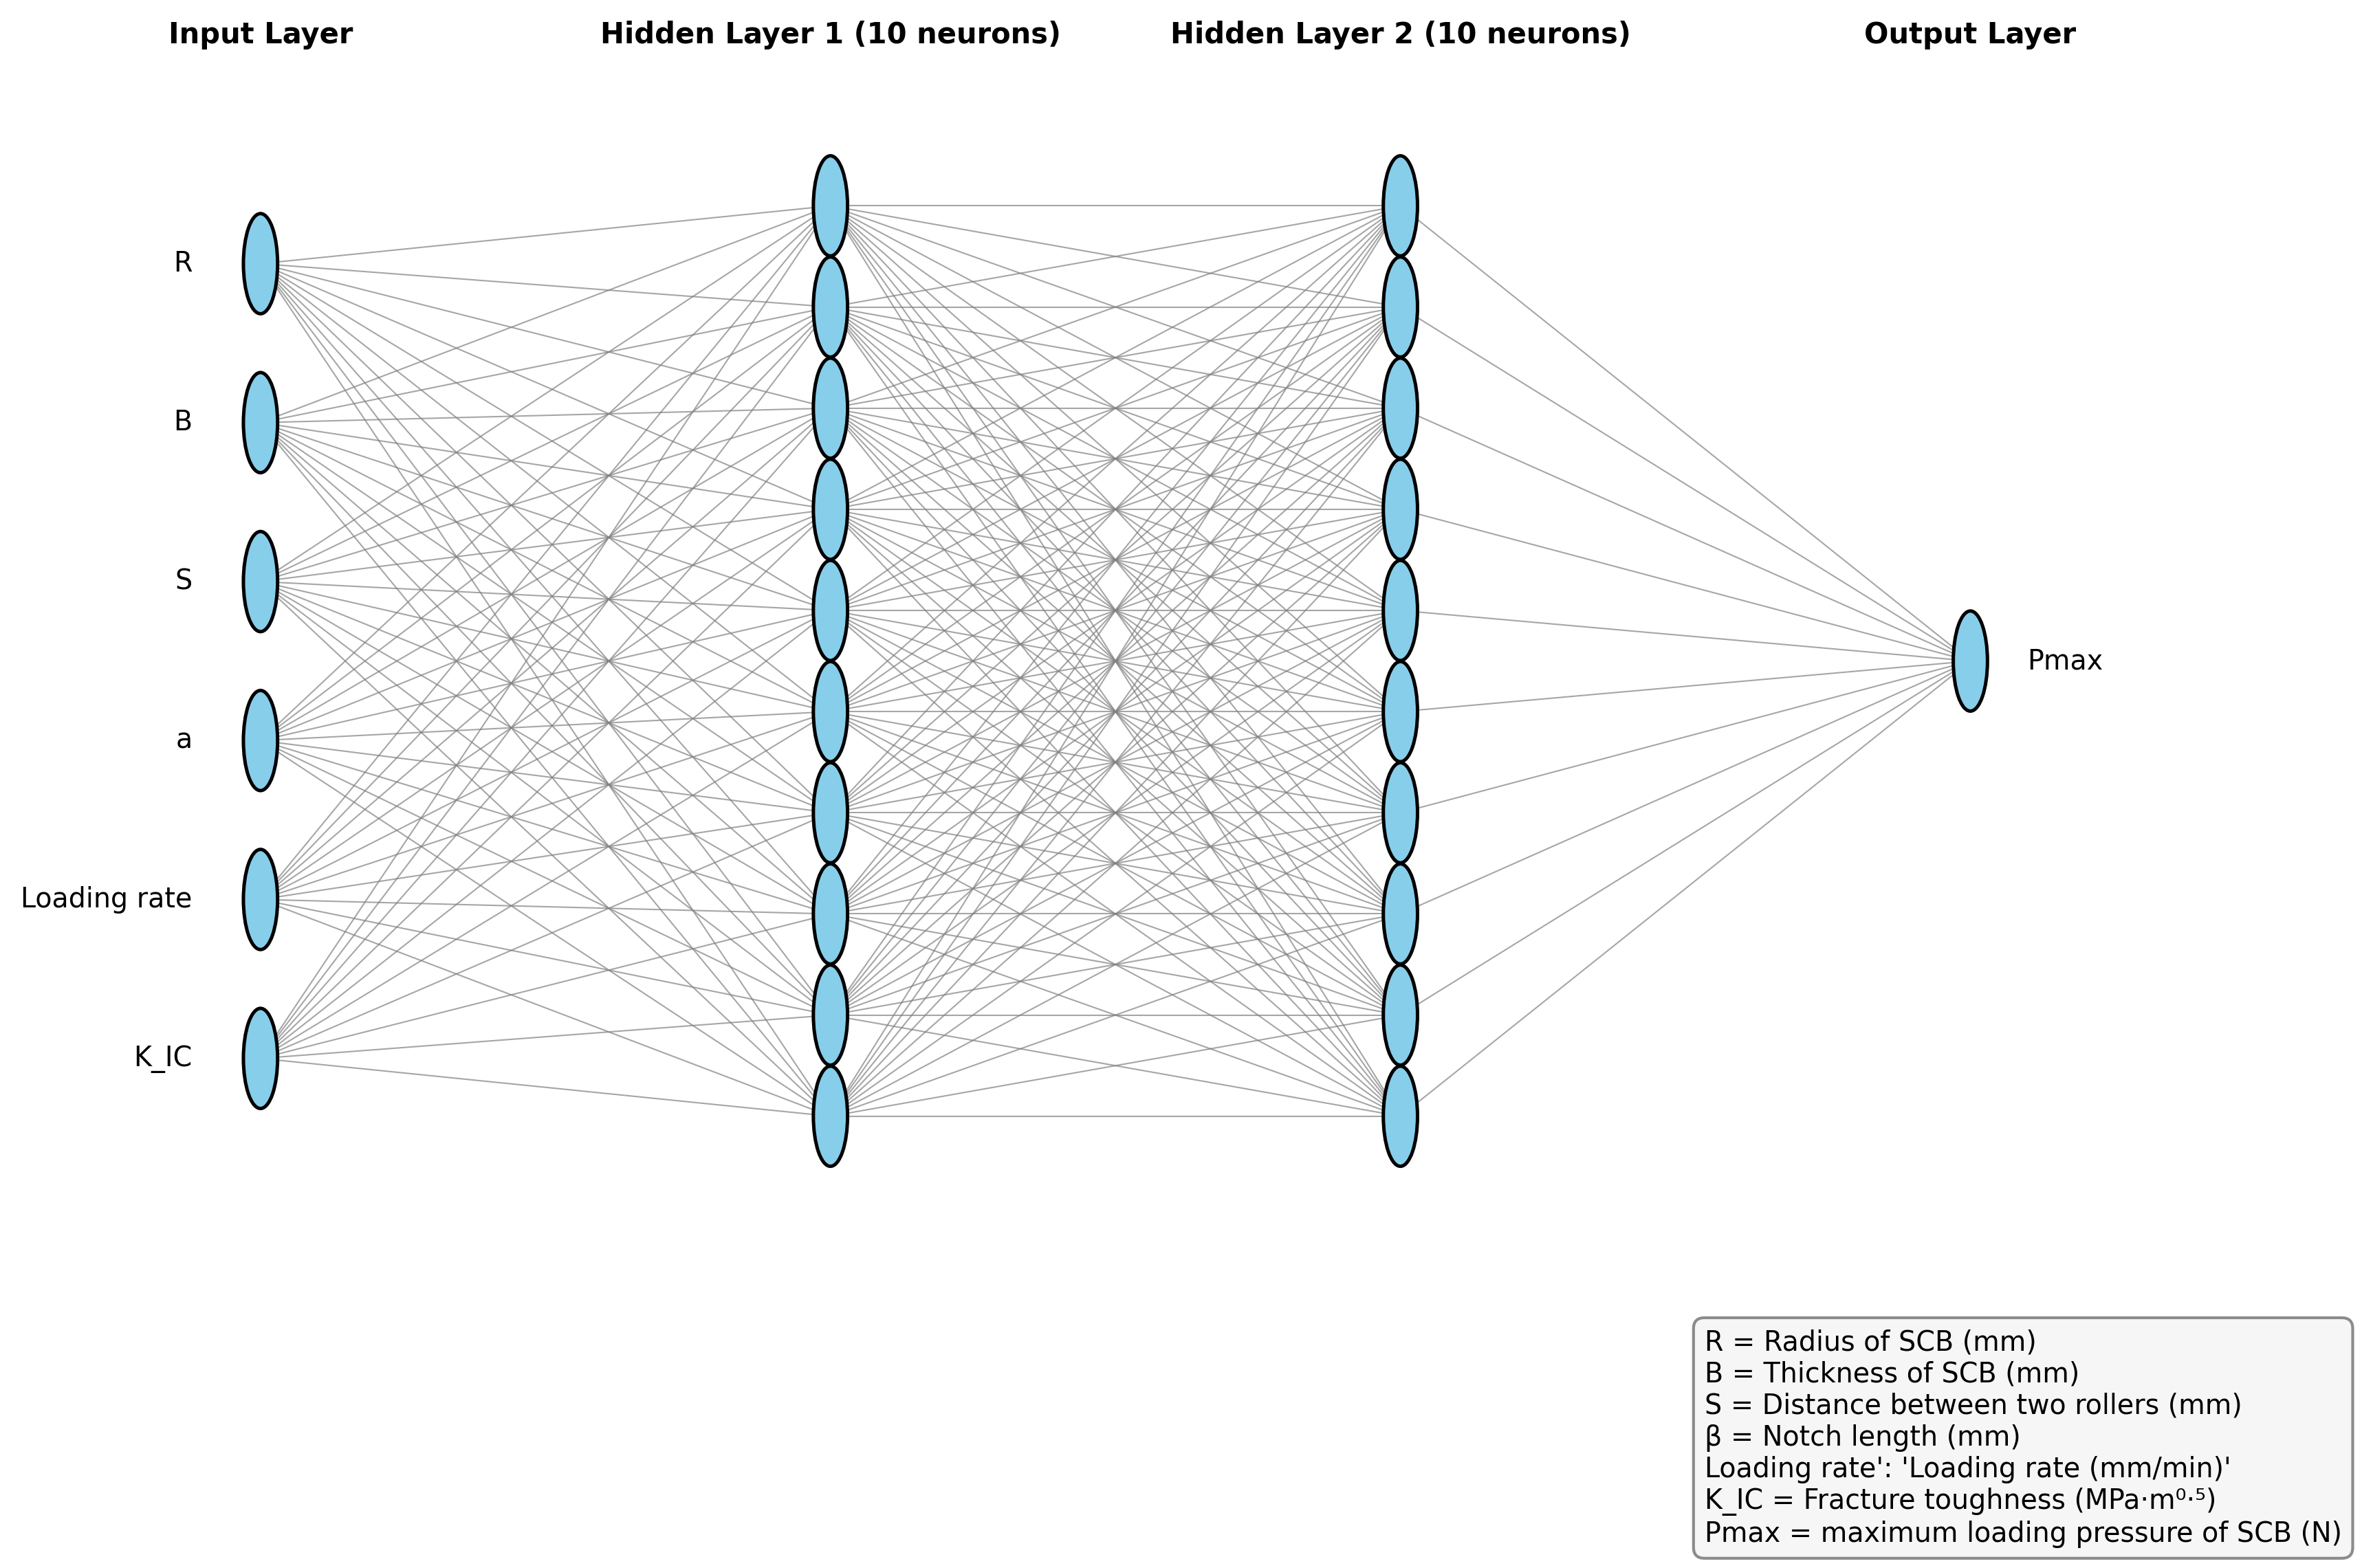

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def draw_mlp_topology_with_legend(input_labels, hidden_layers, output_label):
    layers = [len(input_labels)] + hidden_layers + [1]
    layer_labels = [input_labels] + [[''] * h for h in hidden_layers] + [[output_label]]
    max_neurons = max(layers)

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.axis('off')

    # Drawing nodes (neurons)
    for i, (num_neurons, labels) in enumerate(zip(layers, layer_labels)):
        x = i * 1.5
        y_positions = np.linspace(1, 0, num_neurons + 2)[1:-1]
        for j, y in enumerate(y_positions):
            circle = plt.Circle((x, y), 0.045, color='skyblue', ec='black', lw=1.2, zorder=3)
            ax.add_patch(circle)
            if labels[j]:
                if i == 0:  # Inputs
                    ax.text(x - 0.18, y, labels[j], ha='right', va='center', fontsize=9.5)
                elif i == len(layers) - 1:  # Output
                    ax.text(x + 0.15, y, labels[j], ha='left', va='center', fontsize=9.5)

    #  Drawing connections between layers
    for i in range(len(layers) - 1):
        x1 = i * 1.5
        x2 = (i + 1) * 1.5
        y1s = np.linspace(1, 0, layers[i] + 2)[1:-1]
        y2s = np.linspace(1, 0, layers[i + 1] + 2)[1:-1]
        for y1 in y1s:
            for y2 in y2s:
                ax.plot([x1, x2], [y1, y2], color='gray', lw=0.5, alpha=0.7, zorder=1)

    # Labeling Layers
    layer_names = ['Input Layer', 'Hidden Layer 1 (10 neurons)', 'Hidden Layer 2 (10 neurons)', 'Output Layer']
    for i, name in enumerate(layer_names):
        x = i * 1.5
        ax.text(x, 1.05, name, ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Legend
    legend_text = (
        "R = Radius of SCB (mm)\n"
        "B = Thickness of SCB (mm)\n"
        "S = Distance between two rollers (mm)\n"
        "β = Notch length (mm)\n"
        "Loading rate': 'Loading rate (mm/min)'\n"
        "K_IC = Fracture toughness (MPa·m⁰·⁵)\n"
        "Pmax = maximum loading pressure of SCB (N)"
    )

    ax.text(3.8, -0.1, legend_text, fontsize=9.5, va='top', ha='left',
            bbox=dict(boxstyle="round,pad=0.4", fc="whitesmoke", ec="gray", alpha=0.9))

    plt.tight_layout(rect=[0, 0.05, 1, 1])


    plt.show()


# Input features and model structure
input_features = ["R", "B", "S", "a", "Loading rate", "K_IC"]
hidden_layers = [10, 10]
output_label = "Pmax"
draw_mlp_topology_with_legend(input_features, hidden_layers, output_label)

ELM model


 Best ELM Configuration:
   Hidden Neurons = 60
   Activation     = relu

 Train Performance:
   MSE  = 235.2950
   MAE  = 11.7142
   RMSE = 15.3393
   R²   = 0.9952

 Validation Performance:
   MSE  = 251.7676
   MAE  = 12.3793
   RMSE = 15.8672
   R²   = 0.9942

 Test Performance:
   MSE  = 307.8553
   MAE  = 13.9861
   RMSE = 17.5458
   R²   = 0.9955


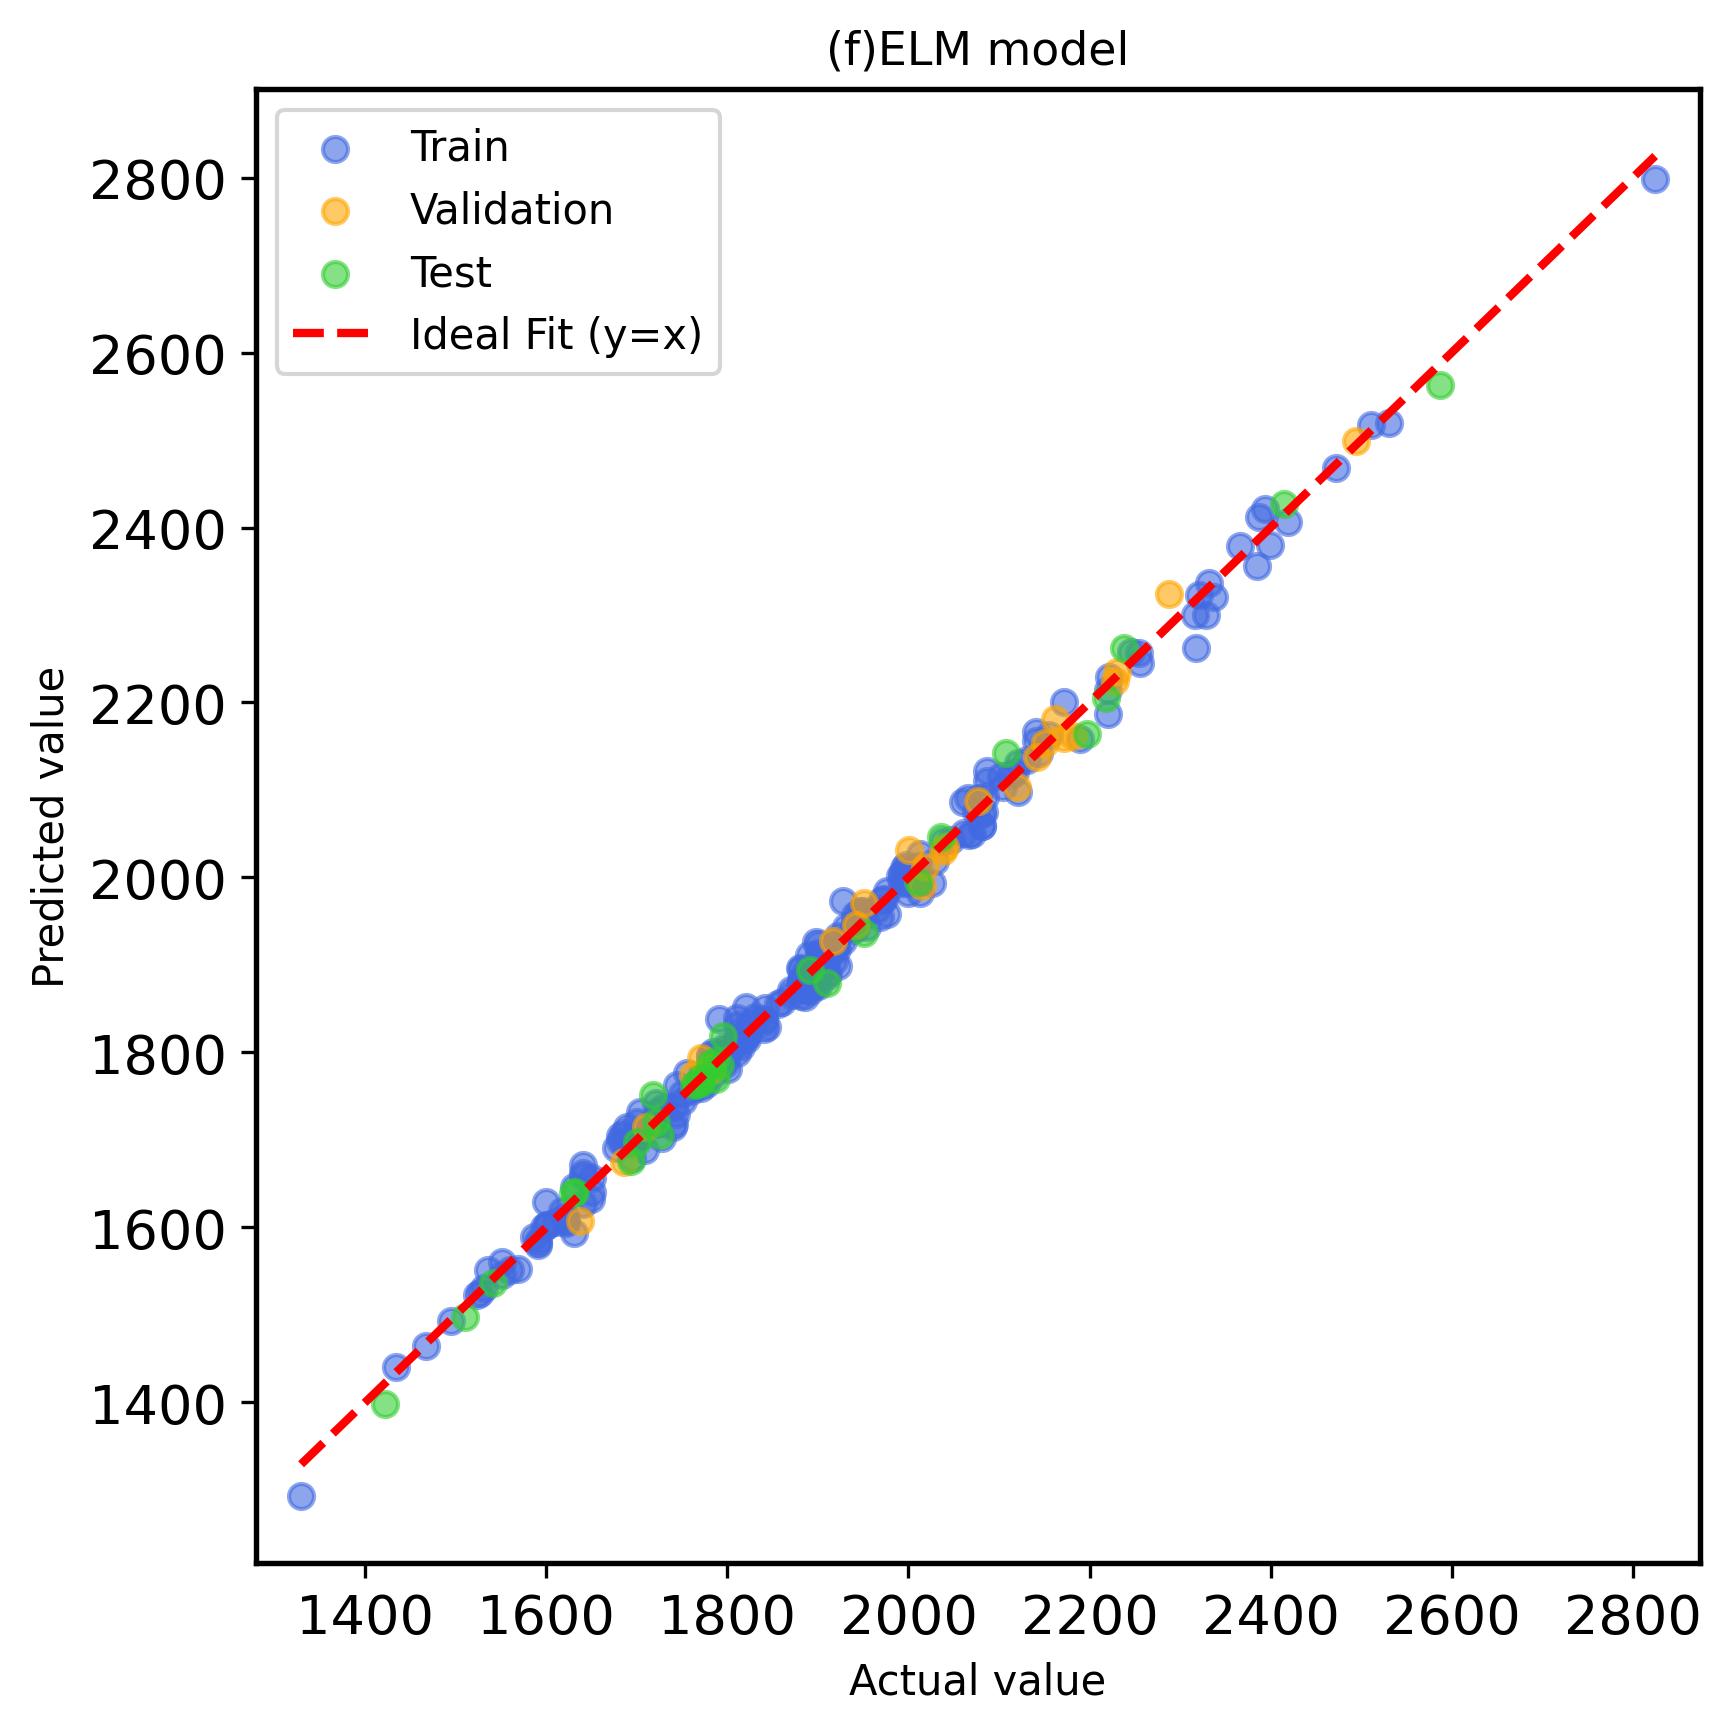

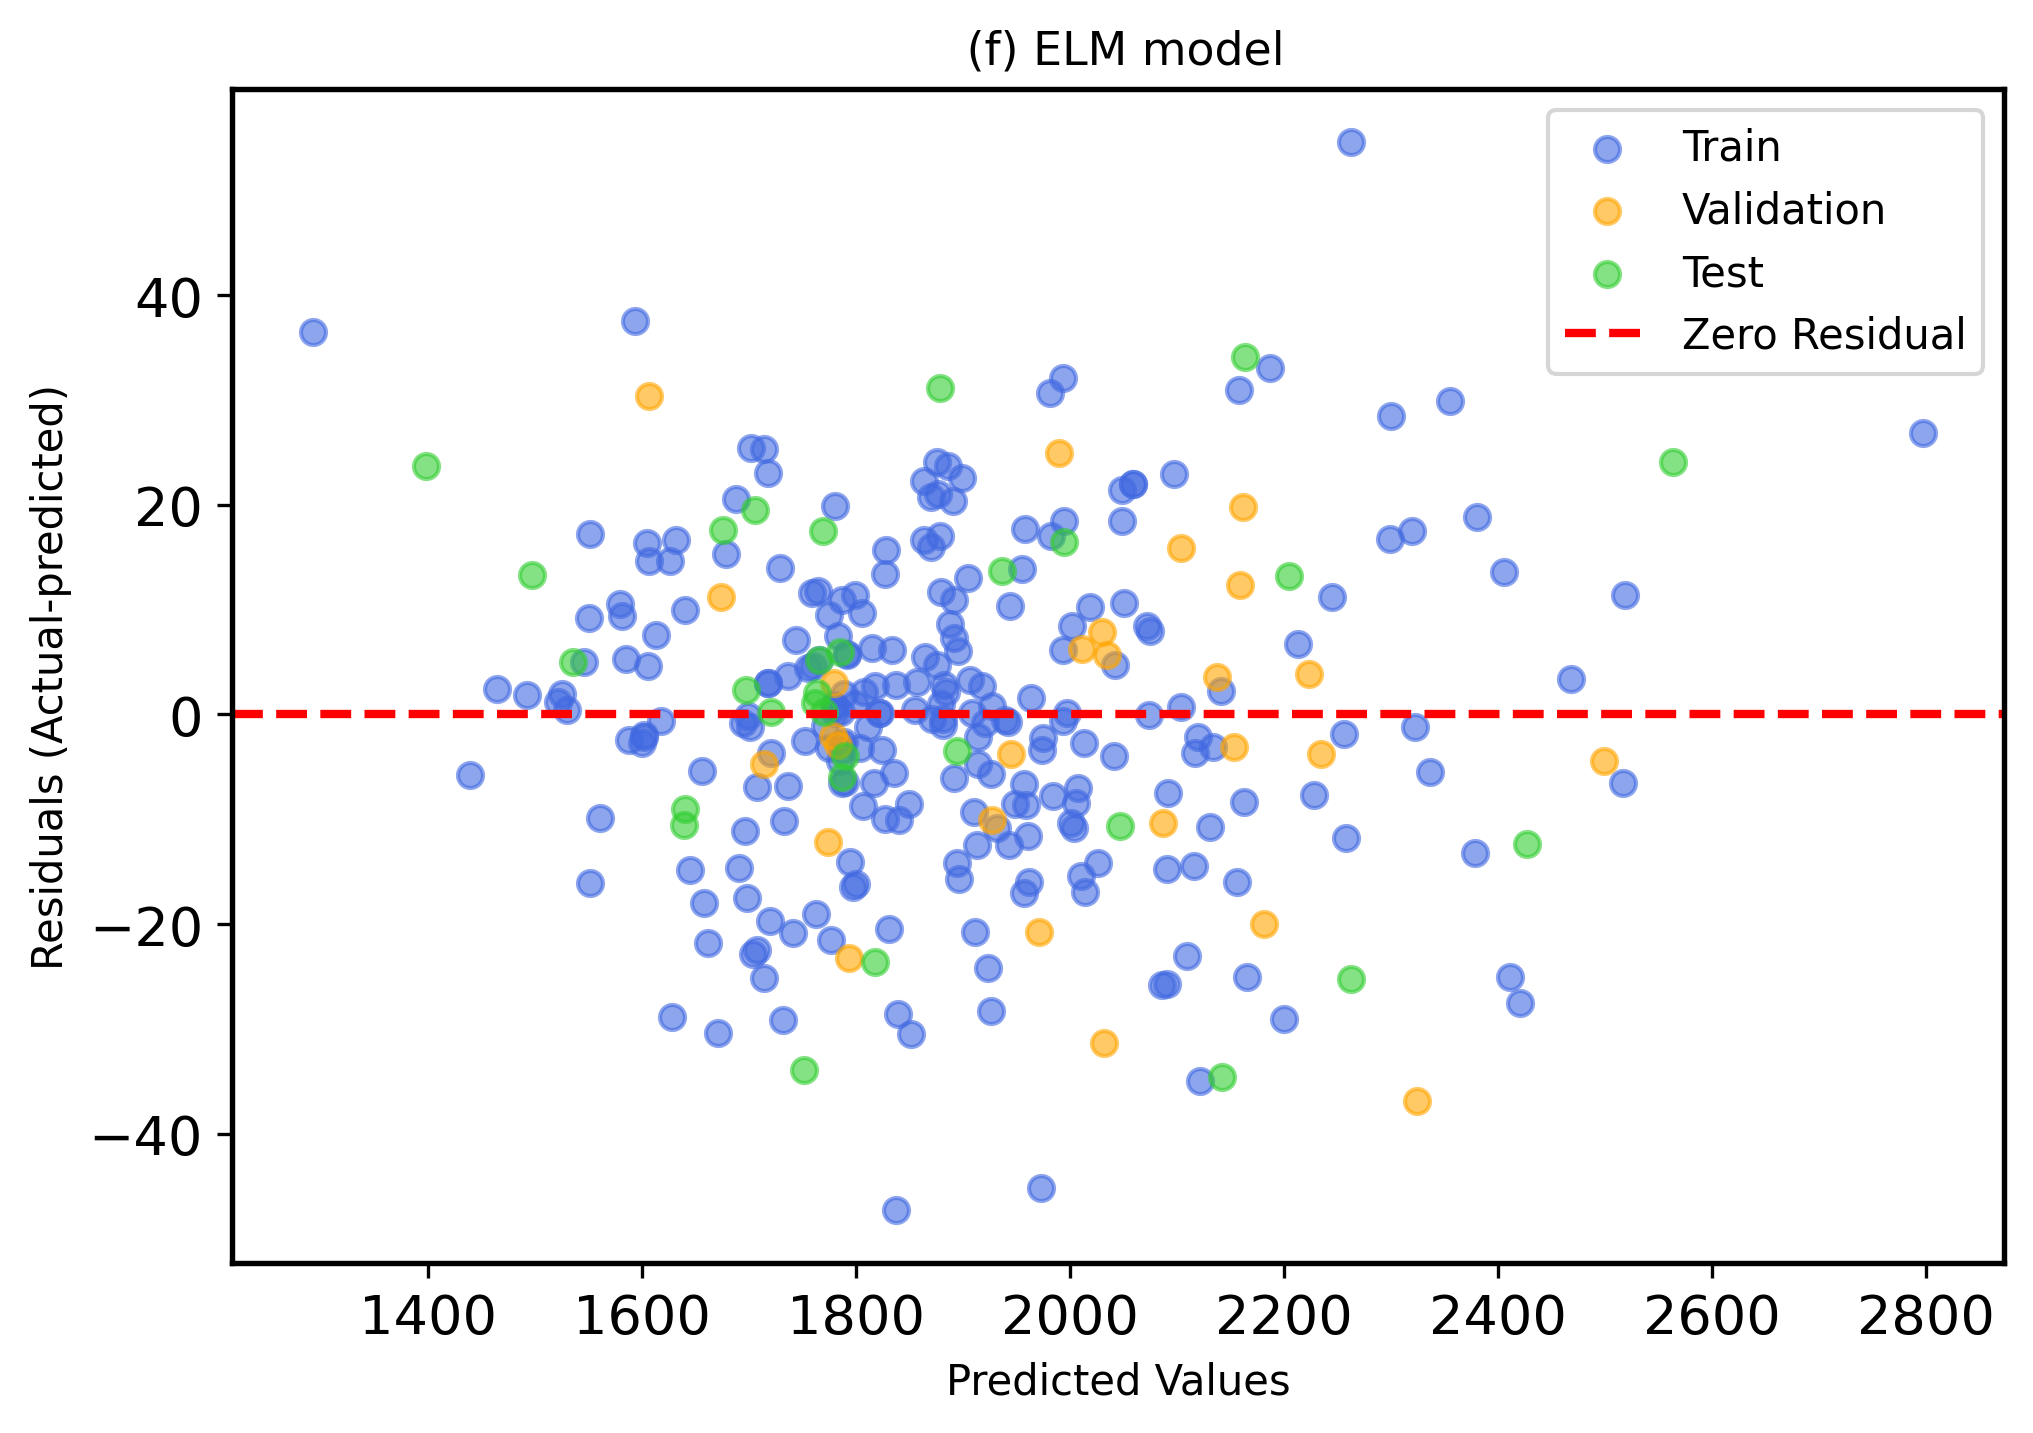

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# 1. Fixed random setting

def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)

set_seed(42)

# 2. Train/Val/Test split BEFORE scaling

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42)

# 3. Fit scaler ONLY on training set

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Apply transform
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

y_train = y_scaler.transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)

# 4. Definition of the ELM model

class ELM:
    def __init__(self, input_dim, hidden_neurons, activation='sigmoid'):
        self.hidden_neurons = hidden_neurons
        self.activation = activation
        self.input_weights = np.random.randn(input_dim, hidden_neurons)
        self.biases = np.random.randn(hidden_neurons)

    def _activation(self, X):
        H = X @ self.input_weights + self.biases
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-H))
        elif self.activation == 'tanh':
            return np.tanh(H)
        elif self.activation == 'relu':
            return np.maximum(0, H)
        else:
            raise ValueError("Unsupported activation")

    def fit(self, X, y):
        H = self._activation(X)
        self.output_weights = np.linalg.pinv(H) @ y  # Moore-Penrose pseudoinverse

    def predict(self, X):
        H = self._activation(X)
        return H @ self.output_weights

# 5. Grid Search

hidden_neuron_options = [10, 20, 40, 60, 80]
activation_options = ["sigmoid", "tanh", "relu"]
param_grid = [(hn, act) for hn in hidden_neuron_options for act in activation_options]

best_rmse_val = float("inf")
best_config = None
results = []

for hidden_neurons, activation in param_grid:
    elm = ELM(input_dim=X_train.shape[1], hidden_neurons=hidden_neurons, activation=activation)
    elm.fit(X_train, y_train)

    y_pred_val_scaled = elm.predict(X_val)
    y_pred_val = y_scaler.inverse_transform(y_pred_val_scaled)
    y_val_true = y_scaler.inverse_transform(y_val)

    mse = mean_squared_error(y_val_true, y_pred_val)
    rmse = np.sqrt(mse)

    results.append({
        "hidden_neurons": hidden_neurons,
        "activation": activation,
        "RMSE": rmse
    })

    if rmse < best_rmse_val:
        best_rmse_val = rmse
        best_config = (hidden_neurons, activation)

results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
best_hidden, best_act = best_config

print(f"\n Best ELM Configuration:")
print(f"   Hidden Neurons = {best_hidden}")
print(f"   Activation     = {best_act}")

# 6. Final training on Train+Val (still using proper scaling)

X_final_train = np.vstack((X_train, X_val))
y_final_train = np.vstack((y_train, y_val))

elm_best = ELM(input_dim=X_train.shape[1], hidden_neurons=best_hidden, activation=best_act)
elm_best.fit(X_final_train, y_final_train)

# Predictions
y_pred_train = y_scaler.inverse_transform(elm_best.predict(X_train))
y_pred_val   = y_scaler.inverse_transform(elm_best.predict(X_val))
y_pred_test  = y_scaler.inverse_transform(elm_best.predict(X_test))

y_train_true = y_scaler.inverse_transform(y_train)
y_val_true   = y_scaler.inverse_transform(y_val)
y_test_true  = y_scaler.inverse_transform(y_test)


# 7 Metrics

def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {name} Performance:")
    print(f"   MSE  = {mse:.4f}")
    print(f"   MAE  = {mae:.4f}")
    print(f"   RMSE = {rmse:.4f}")
    print(f"   R²   = {r2:.4f}")

evaluate(y_train_true, y_pred_train, "Train")
evaluate(y_val_true,   y_pred_val,   "Validation")
evaluate(y_test_true,  y_pred_test,  "Test")

# 8 Actual vs Predicted

plt.figure(figsize=(6,6),dpi=300)
plt.scatter(y_train_true, y_pred_train, color='royalblue', alpha=0.6, label='Train')
plt.scatter(y_val_true, y_pred_val, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_test_true, y_pred_test, color='limegreen', alpha=0.6, label='Test')

min_val = min(y_train_true.min(), y_val_true.min(), y_test_true.min())
max_val = max(y_train_true.max(), y_val_true.max(), y_test_true.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Fit (y=x)')

padding = 50
plt.xlim(min_val - padding, max_val + padding)
plt.title("(f)ELM model", fontsize=11)
plt.xlabel("Actual value",fontsize=10)
plt.ylabel("Predicted value",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

# 9 Residual plots
res_train = y_train_true - y_pred_train
res_val   = y_val_true   - y_pred_val
res_test  = y_test_true  - y_pred_test

plt.figure(figsize=(7,5),dpi=300)
plt.scatter(y_pred_train, res_train, color='royalblue', alpha=0.6, label='Train')
plt.scatter(y_pred_val, res_val, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_pred_test, res_test, color='limegreen', alpha=0.6, label='Test')

plt.axhline(0, color='r', linestyle='--',lw=2, label='Zero Residual')
plt.title(" (f) ELM model",fontsize=11)
plt.xlabel("Predicted Values", fontsize=10)
plt.ylabel("Residuals (Actual-predicted)",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()




📈 Plotting ELM Learning Curve based on number of hidden neurons...


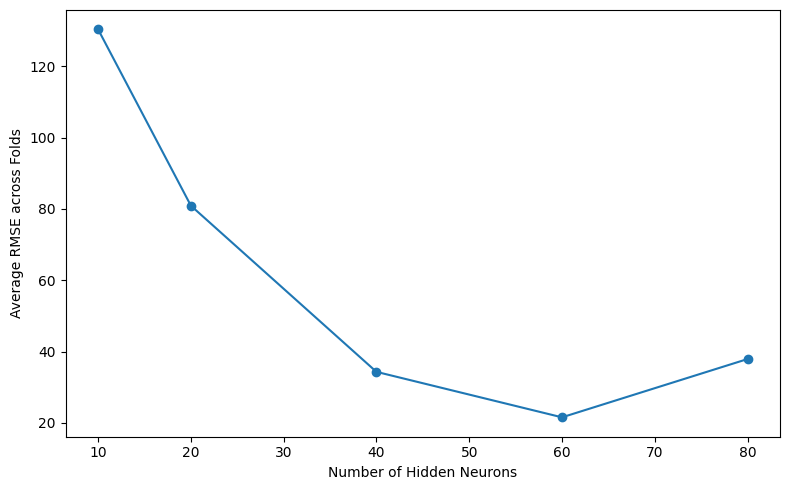

In [ ]:
# Plot Learning Curve based on hidden neurons for the best ELM activation
print("\n📈 Plotting ELM Learning Curve based on number of hidden neurons...")

# Find the best activation from the overall best ELM config
best_elm_activation = best_config[1]

# Filter results for the best activation to analyze neuron effect
results_best_activation = results_df[results_df['activation'] == best_elm_activation].sort_values("hidden_neurons")

plt.figure(figsize=(8, 5))
plt.plot(results_best_activation['hidden_neurons'], results_best_activation['RMSE'], marker='o')
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Average RMSE across Folds")
plt.grid(False)
plt.tight_layout()
plt.show()